In [1]:
import json
from preprocessor.preprocessor import Preprocessor
from model.model_keras import Model
from postprocessor.postprocessor import Postprocesser
from evaluator.evaluator import Evaluator
import numpy as np
import pandas as pd
import tensorflow as tf
import random

def set_seed(seed_value):
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    random.seed(seed_value)
set_seed(42)

with open('parameters.json', 'r') as file:
    params = json.load(file)

In [2]:
preprocessor = Preprocessor()
data = preprocessor.fetch_stock_data(params['stock_symbol'], params['start_date'], params['stop_date'])
for single_feature_params in params['features_params']:
    feature_type = single_feature_params["type"]
    data = preprocessor.add_feature(data, feature_type, **single_feature_params)
data, issues_detected = preprocessor.add_data_cleaner(data, 
    clean_type=params['data_cleaning']['clean_type'], strategy=params['data_cleaning']['strategy'])
X_train, y_train, X_test, y_test, train_dates, test_dates = \
    preprocessor.process_data(data, split_ratio=params['split_ratio'], target_col=params['target_col'], 
                            feature_cols=None, look_back=params['look_back'],
                            predict_steps=params['predict_steps'], 
                            train_slide_steps=params['train_slide_steps'], 
                            test_slide_steps=params['train_slide_steps'])
X_newest, x_newest_date = preprocessor.create_x_newest_data(data, params['look_back'])


[*********************100%***********************]  1 of 1 completed


c:\Users\e4903\Desktop\code\2023_hw\reverse_prediction\1124\project\preprocessor\preprocessor.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 0
c:\Users\e4903\Desktop\code\2023_hw\reverse_prediction\1124\project\preprocessor\preprocessor.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'].iloc[i:i + trend_days] = 1


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
model_wrapper = Model()
model, history, y_preds, online_training_losses, online_training_acc = \
    model_wrapper.run(params['model_type'], params['look_back'], params['model_params'],
                        X_train, y_train, X_test, y_test)


{'conv_1_filter': 32, 'conv_1_kernel': 4, 'conv_1_l2': 0.00016475815766673417, 'dropout_1': 0.2, 'conv_2_filter': 96, 'conv_2_kernel': 2, 'dropout_2': 0.2, 'lstm_1_units': 128, 'lstm_1_l2': 0.0002788818914602332, 'dropout_3': 0.2, 'lstm_2_units': 64, 'dropout_4': 0.1, 'learning_rate': 0.001, 'look_back': 64, 'predict_steps': 16}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 64, 32)            2464      
                                                                 
 batch_normalization (BatchN  (None, 64, 32)           128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 32)            0         
                                                                 
 dropout (Dropout)           (None, 64, 32)            

  0%|          | 0/1425 [00:00<?, ?it/s]

Inferencing on instance 0
1/1 [==============================] - 0s 446ms/step
Online training on instance 0
1/1 - 0s - loss: 0.5187 - binary_accuracy: 0.7500 - 21ms/epoch - 21ms/step


  0%|          | 1/1425 [00:00<15:41,  1.51it/s]

Inferencing on instance 1
1/1 [==============================] - 0s 43ms/step
Online training on instance 1
1/1 - 0s - loss: 0.3577 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


  0%|          | 2/1425 [00:00<09:38,  2.46it/s]

Inferencing on instance 2
1/1 [==============================] - 0s 29ms/step
Online training on instance 2
1/1 - 0s - loss: 0.3100 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  0%|          | 3/1425 [00:01<07:13,  3.28it/s]

Inferencing on instance 3
1/1 [==============================] - 0s 30ms/step
Online training on instance 3
1/1 - 0s - loss: 0.3823 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


  0%|          | 4/1425 [00:01<06:02,  3.92it/s]

Inferencing on instance 4
1/1 [==============================] - 0s 49ms/step
Online training on instance 4
1/1 - 0s - loss: 0.4257 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


  0%|          | 5/1425 [00:01<05:53,  4.02it/s]

Inferencing on instance 5
1/1 [==============================] - 0s 31ms/step
Online training on instance 5
1/1 - 0s - loss: 0.3669 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  0%|          | 6/1425 [00:01<05:19,  4.44it/s]

Inferencing on instance 6
1/1 [==============================] - 0s 36ms/step
Online training on instance 6
1/1 - 0s - loss: 0.3327 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  0%|          | 7/1425 [00:01<04:59,  4.74it/s]

Inferencing on instance 7
1/1 [==============================] - 0s 29ms/step
Online training on instance 7
1/1 - 0s - loss: 0.2801 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


  1%|          | 8/1425 [00:02<04:43,  5.00it/s]

Inferencing on instance 8
1/1 [==============================] - 0s 32ms/step
Online training on instance 8
1/1 - 0s - loss: 0.2876 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


  1%|          | 9/1425 [00:02<04:31,  5.22it/s]

Inferencing on instance 9
1/1 [==============================] - 0s 32ms/step
Online training on instance 9
1/1 - 0s - loss: 0.2955 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  1%|          | 10/1425 [00:02<04:28,  5.27it/s]

Inferencing on instance 10
1/1 [==============================] - 0s 28ms/step
Online training on instance 10
1/1 - 0s - loss: 0.3490 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


  1%|          | 11/1425 [00:02<04:19,  5.45it/s]

Inferencing on instance 11
1/1 [==============================] - 0s 51ms/step
Online training on instance 11
1/1 - 0s - loss: 0.2778 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


  1%|          | 12/1425 [00:02<04:31,  5.20it/s]

Inferencing on instance 12
1/1 [==============================] - 0s 28ms/step
Online training on instance 12
1/1 - 0s - loss: 0.2299 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


  1%|          | 13/1425 [00:02<04:24,  5.34it/s]

Inferencing on instance 13
1/1 [==============================] - 0s 31ms/step
Online training on instance 13
1/1 - 0s - loss: 0.2112 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


  1%|          | 14/1425 [00:03<04:18,  5.47it/s]

Inferencing on instance 14
1/1 [==============================] - 0s 34ms/step
Online training on instance 14
1/1 - 0s - loss: 0.1901 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


  1%|          | 15/1425 [00:03<04:15,  5.52it/s]

Inferencing on instance 15
1/1 [==============================] - 0s 31ms/step
Online training on instance 15
1/1 - 0s - loss: 0.1784 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


  1%|          | 16/1425 [00:03<04:14,  5.54it/s]

Inferencing on instance 16
1/1 [==============================] - 0s 26ms/step
Online training on instance 16
1/1 - 0s - loss: 0.2227 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  1%|          | 17/1425 [00:03<04:13,  5.55it/s]

Inferencing on instance 17
1/1 [==============================] - 0s 40ms/step
Online training on instance 17
1/1 - 0s - loss: 0.1946 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  1%|▏         | 18/1425 [00:03<04:27,  5.26it/s]

Inferencing on instance 18
1/1 [==============================] - 0s 28ms/step
Online training on instance 18
1/1 - 0s - loss: 0.1599 - binary_accuracy: 1.0000 - 12ms/epoch - 12ms/step


  1%|▏         | 19/1425 [00:04<04:19,  5.41it/s]

Inferencing on instance 19
1/1 [==============================] - 0s 31ms/step
Online training on instance 19
1/1 - 0s - loss: 0.1711 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


  1%|▏         | 20/1425 [00:04<04:15,  5.50it/s]

Inferencing on instance 20
1/1 [==============================] - 0s 30ms/step
Online training on instance 20
1/1 - 0s - loss: 0.1768 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  1%|▏         | 21/1425 [00:04<04:12,  5.55it/s]

Inferencing on instance 21
1/1 [==============================] - 0s 35ms/step
Online training on instance 21
1/1 - 0s - loss: 0.1323 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  2%|▏         | 22/1425 [00:04<04:12,  5.55it/s]

Inferencing on instance 22
1/1 [==============================] - 0s 29ms/step
Online training on instance 22
1/1 - 0s - loss: 0.1454 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


  2%|▏         | 23/1425 [00:04<04:09,  5.62it/s]

Inferencing on instance 23
1/1 [==============================] - 0s 52ms/step
Online training on instance 23
1/1 - 0s - loss: 0.1395 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


  2%|▏         | 24/1425 [00:04<04:24,  5.31it/s]

Inferencing on instance 24
1/1 [==============================] - 0s 26ms/step
Online training on instance 24
1/1 - 0s - loss: 0.2532 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


  2%|▏         | 25/1425 [00:05<04:20,  5.37it/s]

Inferencing on instance 25
1/1 [==============================] - 0s 30ms/step
Online training on instance 25
1/1 - 0s - loss: 0.4091 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


  2%|▏         | 26/1425 [00:05<04:14,  5.50it/s]

Inferencing on instance 26
1/1 [==============================] - 0s 29ms/step
Online training on instance 26
1/1 - 0s - loss: 0.5147 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


  2%|▏         | 27/1425 [00:05<04:10,  5.57it/s]

Inferencing on instance 27
1/1 [==============================] - 0s 32ms/step
Online training on instance 27
1/1 - 0s - loss: 0.6613 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


  2%|▏         | 28/1425 [00:05<04:15,  5.46it/s]

Inferencing on instance 28
1/1 [==============================] - 0s 28ms/step
Online training on instance 28
1/1 - 0s - loss: 0.8148 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


  2%|▏         | 29/1425 [00:05<04:13,  5.51it/s]

Inferencing on instance 29
1/1 [==============================] - 0s 46ms/step
Online training on instance 29
1/1 - 0s - loss: 0.7448 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


  2%|▏         | 30/1425 [00:06<04:22,  5.31it/s]

Inferencing on instance 30
1/1 [==============================] - 0s 26ms/step
Online training on instance 30
1/1 - 0s - loss: 0.6995 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


  2%|▏         | 31/1425 [00:06<04:18,  5.38it/s]

Inferencing on instance 31
1/1 [==============================] - 0s 32ms/step
Online training on instance 31
1/1 - 0s - loss: 0.5497 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


  2%|▏         | 32/1425 [00:06<04:14,  5.47it/s]

Inferencing on instance 32
1/1 [==============================] - 0s 30ms/step
Online training on instance 32
1/1 - 0s - loss: 0.4984 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


  2%|▏         | 33/1425 [00:06<04:17,  5.41it/s]

Inferencing on instance 33
1/1 [==============================] - 0s 28ms/step
Online training on instance 33
1/1 - 0s - loss: 0.4619 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


  2%|▏         | 34/1425 [00:06<04:16,  5.43it/s]

Inferencing on instance 34
1/1 [==============================] - 0s 35ms/step
Online training on instance 34
1/1 - 0s - loss: 0.6113 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


  2%|▏         | 35/1425 [00:06<04:13,  5.49it/s]

Inferencing on instance 35
1/1 [==============================] - 0s 39ms/step
Online training on instance 35
1/1 - 0s - loss: 0.9779 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


  3%|▎         | 36/1425 [00:07<04:25,  5.23it/s]

Inferencing on instance 36
1/1 [==============================] - 0s 27ms/step
Online training on instance 36
1/1 - 0s - loss: 1.4097 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


  3%|▎         | 37/1425 [00:07<04:17,  5.40it/s]

Inferencing on instance 37
1/1 [==============================] - 0s 29ms/step
Online training on instance 37
1/1 - 0s - loss: 2.0968 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


  3%|▎         | 38/1425 [00:07<04:12,  5.50it/s]

Inferencing on instance 38
1/1 [==============================] - 0s 27ms/step
Online training on instance 38
1/1 - 0s - loss: 2.2713 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


  3%|▎         | 39/1425 [00:07<04:11,  5.51it/s]

Inferencing on instance 39
1/1 [==============================] - 0s 30ms/step
Online training on instance 39
1/1 - 0s - loss: 2.6723 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


  3%|▎         | 40/1425 [00:07<04:12,  5.48it/s]

Inferencing on instance 40
1/1 [==============================] - 0s 27ms/step
Online training on instance 40
1/1 - 0s - loss: 2.2733 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


  3%|▎         | 41/1425 [00:08<04:07,  5.59it/s]

Inferencing on instance 41
1/1 [==============================] - 0s 45ms/step
Online training on instance 41
1/1 - 0s - loss: 1.9706 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


  3%|▎         | 42/1425 [00:08<04:21,  5.29it/s]

Inferencing on instance 42
1/1 [==============================] - 0s 30ms/step
Online training on instance 42
1/1 - 0s - loss: 1.5856 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


  3%|▎         | 43/1425 [00:08<04:16,  5.38it/s]

Inferencing on instance 43
1/1 [==============================] - 0s 25ms/step
Online training on instance 43
1/1 - 0s - loss: 1.5492 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


  3%|▎         | 44/1425 [00:08<04:22,  5.26it/s]

Inferencing on instance 44
1/1 [==============================] - 0s 26ms/step
Online training on instance 44
1/1 - 0s - loss: 1.2555 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


  3%|▎         | 45/1425 [00:08<04:14,  5.43it/s]

Inferencing on instance 45
1/1 [==============================] - 0s 31ms/step
Online training on instance 45
1/1 - 0s - loss: 1.1004 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


  3%|▎         | 46/1425 [00:08<04:09,  5.53it/s]

Inferencing on instance 46
1/1 [==============================] - 0s 37ms/step
Online training on instance 46
1/1 - 0s - loss: 1.3042 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


  3%|▎         | 47/1425 [00:09<04:10,  5.51it/s]

Inferencing on instance 47
1/1 [==============================] - 0s 43ms/step
Online training on instance 47
1/1 - 0s - loss: 1.0730 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


  3%|▎         | 48/1425 [00:09<04:21,  5.27it/s]

Inferencing on instance 48
1/1 [==============================] - 0s 29ms/step
Online training on instance 48
1/1 - 0s - loss: 0.9822 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


  3%|▎         | 49/1425 [00:09<04:15,  5.38it/s]

Inferencing on instance 49
1/1 [==============================] - 0s 32ms/step
Online training on instance 49
1/1 - 0s - loss: 0.5827 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


  4%|▎         | 50/1425 [00:09<04:15,  5.37it/s]

Inferencing on instance 50
1/1 [==============================] - 0s 28ms/step
Online training on instance 50
1/1 - 0s - loss: 0.5557 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


  4%|▎         | 51/1425 [00:09<04:11,  5.46it/s]

Inferencing on instance 51
1/1 [==============================] - 0s 32ms/step
Online training on instance 51
1/1 - 0s - loss: 0.6458 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


  4%|▎         | 52/1425 [00:10<04:08,  5.53it/s]

Inferencing on instance 52
1/1 [==============================] - 0s 34ms/step
Online training on instance 52
1/1 - 0s - loss: 0.7834 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


  4%|▎         | 53/1425 [00:10<04:06,  5.56it/s]

Inferencing on instance 53
1/1 [==============================] - 0s 46ms/step
Online training on instance 53
1/1 - 0s - loss: 1.1619 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


  4%|▍         | 54/1425 [00:10<04:17,  5.32it/s]

Inferencing on instance 54
1/1 [==============================] - 0s 35ms/step
Online training on instance 54
1/1 - 0s - loss: 1.2669 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


  4%|▍         | 55/1425 [00:10<04:15,  5.36it/s]

Inferencing on instance 55
1/1 [==============================] - 0s 32ms/step
Online training on instance 55
1/1 - 0s - loss: 0.9576 - binary_accuracy: 0.5000 - 18ms/epoch - 18ms/step


  4%|▍         | 56/1425 [00:10<04:17,  5.31it/s]

Inferencing on instance 56
1/1 [==============================] - 0s 31ms/step
Online training on instance 56
1/1 - 0s - loss: 0.9918 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


  4%|▍         | 57/1425 [00:11<04:20,  5.25it/s]

Inferencing on instance 57
1/1 [==============================] - 0s 26ms/step
Online training on instance 57
1/1 - 0s - loss: 0.8913 - binary_accuracy: 0.5000 - 15ms/epoch - 15ms/step


  4%|▍         | 58/1425 [00:11<04:14,  5.38it/s]

Inferencing on instance 58
1/1 [==============================] - 0s 36ms/step
Online training on instance 58
1/1 - 0s - loss: 0.9915 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


  4%|▍         | 59/1425 [00:11<04:18,  5.29it/s]

Inferencing on instance 59
1/1 [==============================] - 0s 45ms/step
Online training on instance 59
1/1 - 0s - loss: 1.1462 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


  4%|▍         | 60/1425 [00:11<04:32,  5.01it/s]

Inferencing on instance 60
1/1 [==============================] - 0s 32ms/step
Online training on instance 60
1/1 - 0s - loss: 1.0832 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


  4%|▍         | 61/1425 [00:11<04:34,  4.97it/s]

Inferencing on instance 61
1/1 [==============================] - 0s 29ms/step
Online training on instance 61
1/1 - 0s - loss: 0.9713 - binary_accuracy: 0.5000 - 18ms/epoch - 18ms/step


  4%|▍         | 62/1425 [00:12<04:34,  4.97it/s]

Inferencing on instance 62
1/1 [==============================] - 0s 31ms/step
Online training on instance 62
1/1 - 0s - loss: 0.8790 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


  4%|▍         | 63/1425 [00:12<04:27,  5.09it/s]

Inferencing on instance 63
1/1 [==============================] - 0s 30ms/step
Online training on instance 63
1/1 - 0s - loss: 0.5958 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


  4%|▍         | 64/1425 [00:12<04:28,  5.07it/s]

Inferencing on instance 64
1/1 [==============================] - 0s 31ms/step
Online training on instance 64
1/1 - 0s - loss: 0.5425 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


  5%|▍         | 65/1425 [00:12<04:30,  5.03it/s]

Inferencing on instance 65
1/1 [==============================] - 0s 39ms/step
Online training on instance 65
1/1 - 0s - loss: 0.8329 - binary_accuracy: 0.5625 - 20ms/epoch - 20ms/step


  5%|▍         | 66/1425 [00:12<04:43,  4.80it/s]

Inferencing on instance 66
1/1 [==============================] - 0s 32ms/step
Online training on instance 66
1/1 - 0s - loss: 0.8798 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


  5%|▍         | 67/1425 [00:13<04:34,  4.95it/s]

Inferencing on instance 67
1/1 [==============================] - 0s 28ms/step
Online training on instance 67
1/1 - 0s - loss: 0.6923 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


  5%|▍         | 68/1425 [00:13<04:26,  5.10it/s]

Inferencing on instance 68
1/1 [==============================] - 0s 31ms/step
Online training on instance 68
1/1 - 0s - loss: 0.5687 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


  5%|▍         | 69/1425 [00:13<04:17,  5.27it/s]

Inferencing on instance 69
1/1 [==============================] - 0s 41ms/step
Online training on instance 69
1/1 - 0s - loss: 0.5329 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


  5%|▍         | 70/1425 [00:13<04:20,  5.21it/s]

Inferencing on instance 70
1/1 [==============================] - 0s 31ms/step
Online training on instance 70
1/1 - 0s - loss: 0.6805 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


  5%|▍         | 71/1425 [00:13<04:17,  5.26it/s]

Inferencing on instance 71
1/1 [==============================] - 0s 42ms/step
Online training on instance 71
1/1 - 0s - loss: 0.6375 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


  5%|▌         | 72/1425 [00:14<04:25,  5.10it/s]

Inferencing on instance 72
1/1 [==============================] - 0s 28ms/step
Online training on instance 72
1/1 - 0s - loss: 0.4582 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


  5%|▌         | 73/1425 [00:14<04:18,  5.22it/s]

Inferencing on instance 73
1/1 [==============================] - 0s 30ms/step
Online training on instance 73
1/1 - 0s - loss: 0.5758 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


  5%|▌         | 74/1425 [00:14<04:14,  5.31it/s]

Inferencing on instance 74
1/1 [==============================] - 0s 31ms/step
Online training on instance 74
1/1 - 0s - loss: 0.5213 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


  5%|▌         | 75/1425 [00:14<04:12,  5.35it/s]

Inferencing on instance 75
1/1 [==============================] - 0s 31ms/step
Online training on instance 75
1/1 - 0s - loss: 0.7254 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


  5%|▌         | 76/1425 [00:14<04:09,  5.40it/s]

Inferencing on instance 76
1/1 [==============================] - 0s 32ms/step
Online training on instance 76
1/1 - 0s - loss: 0.8625 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


  5%|▌         | 77/1425 [00:14<04:08,  5.43it/s]

Inferencing on instance 77
1/1 [==============================] - 0s 41ms/step
Online training on instance 77
1/1 - 0s - loss: 1.0932 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


  5%|▌         | 78/1425 [00:15<04:19,  5.18it/s]

Inferencing on instance 78
1/1 [==============================] - 0s 33ms/step
Online training on instance 78
1/1 - 0s - loss: 1.1358 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


  6%|▌         | 79/1425 [00:15<04:15,  5.27it/s]

Inferencing on instance 79
1/1 [==============================] - 0s 41ms/step
Online training on instance 79
1/1 - 0s - loss: 1.1818 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


  6%|▌         | 80/1425 [00:15<04:28,  5.00it/s]

Inferencing on instance 80
1/1 [==============================] - 0s 40ms/step
Online training on instance 80
1/1 - 0s - loss: 1.1537 - binary_accuracy: 0.6875 - 19ms/epoch - 19ms/step


  6%|▌         | 81/1425 [00:15<04:42,  4.76it/s]

Inferencing on instance 81
1/1 [==============================] - 0s 31ms/step
Online training on instance 81
1/1 - 0s - loss: 1.1326 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


  6%|▌         | 82/1425 [00:15<04:37,  4.85it/s]

Inferencing on instance 82
1/1 [==============================] - 0s 44ms/step
Online training on instance 82
1/1 - 0s - loss: 1.0967 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


  6%|▌         | 83/1425 [00:16<04:45,  4.70it/s]

Inferencing on instance 83
1/1 [==============================] - 0s 30ms/step
Online training on instance 83
1/1 - 0s - loss: 1.0412 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


  6%|▌         | 84/1425 [00:16<04:33,  4.90it/s]

Inferencing on instance 84
1/1 [==============================] - 0s 31ms/step
Online training on instance 84
1/1 - 0s - loss: 0.9896 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


  6%|▌         | 85/1425 [00:16<04:31,  4.93it/s]

Inferencing on instance 85
1/1 [==============================] - 0s 41ms/step
Online training on instance 85
1/1 - 0s - loss: 0.9913 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


  6%|▌         | 86/1425 [00:16<04:25,  5.04it/s]

Inferencing on instance 86
1/1 [==============================] - 0s 32ms/step
Online training on instance 86
1/1 - 0s - loss: 0.8614 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


  6%|▌         | 87/1425 [00:16<04:18,  5.17it/s]

Inferencing on instance 87
1/1 [==============================] - 0s 32ms/step
Online training on instance 87
1/1 - 0s - loss: 0.8977 - binary_accuracy: 0.7500 - 22ms/epoch - 22ms/step


  6%|▌         | 88/1425 [00:17<04:16,  5.21it/s]

Inferencing on instance 88
1/1 [==============================] - 0s 34ms/step
Online training on instance 88
1/1 - 0s - loss: 0.8806 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


  6%|▌         | 89/1425 [00:17<04:25,  5.03it/s]

Inferencing on instance 89
1/1 [==============================] - 0s 28ms/step
Online training on instance 89
1/1 - 0s - loss: 0.8143 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


  6%|▋         | 90/1425 [00:17<04:15,  5.22it/s]

Inferencing on instance 90
1/1 [==============================] - 0s 34ms/step
Online training on instance 90
1/1 - 0s - loss: 0.8543 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


  6%|▋         | 91/1425 [00:17<04:20,  5.12it/s]

Inferencing on instance 91
1/1 [==============================] - 0s 34ms/step
Online training on instance 91
1/1 - 0s - loss: 0.7509 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


  6%|▋         | 92/1425 [00:17<04:17,  5.19it/s]

Inferencing on instance 92
1/1 [==============================] - 0s 31ms/step
Online training on instance 92
1/1 - 0s - loss: 0.7616 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


  7%|▋         | 93/1425 [00:18<04:16,  5.19it/s]

Inferencing on instance 93
1/1 [==============================] - 0s 55ms/step
Online training on instance 93
1/1 - 0s - loss: 0.6430 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


  7%|▋         | 94/1425 [00:18<04:40,  4.74it/s]

Inferencing on instance 94
1/1 [==============================] - 0s 36ms/step
Online training on instance 94
1/1 - 0s - loss: 0.6576 - binary_accuracy: 0.6875 - 19ms/epoch - 19ms/step


  7%|▋         | 95/1425 [00:18<04:41,  4.72it/s]

Inferencing on instance 95
1/1 [==============================] - 0s 38ms/step
Online training on instance 95
1/1 - 0s - loss: 0.6381 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


  7%|▋         | 96/1425 [00:18<04:52,  4.55it/s]

Inferencing on instance 96
1/1 [==============================] - 0s 43ms/step
Online training on instance 96
1/1 - 0s - loss: 0.5483 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


  7%|▋         | 97/1425 [00:19<04:57,  4.46it/s]

Inferencing on instance 97
1/1 [==============================] - 0s 48ms/step
Online training on instance 97
1/1 - 0s - loss: 0.5651 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


  7%|▋         | 98/1425 [00:19<05:07,  4.32it/s]

Inferencing on instance 98
1/1 [==============================] - 0s 46ms/step
Online training on instance 98
1/1 - 0s - loss: 0.6497 - binary_accuracy: 0.6250 - 21ms/epoch - 21ms/step


  7%|▋         | 99/1425 [00:19<05:06,  4.33it/s]

Inferencing on instance 99
1/1 [==============================] - 0s 39ms/step
Online training on instance 99
1/1 - 0s - loss: 0.5544 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


  7%|▋         | 100/1425 [00:19<05:13,  4.23it/s]

Inferencing on instance 100
1/1 [==============================] - 0s 37ms/step
Online training on instance 100
1/1 - 0s - loss: 0.5716 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


  7%|▋         | 101/1425 [00:19<04:56,  4.46it/s]

Inferencing on instance 101
1/1 [==============================] - 0s 28ms/step
Online training on instance 101
1/1 - 0s - loss: 0.5800 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


  7%|▋         | 102/1425 [00:20<04:39,  4.74it/s]

Inferencing on instance 102
1/1 [==============================] - 0s 33ms/step
Online training on instance 102
1/1 - 0s - loss: 0.5048 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


  7%|▋         | 103/1425 [00:20<04:30,  4.89it/s]

Inferencing on instance 103
1/1 [==============================] - 0s 26ms/step
Online training on instance 103
1/1 - 0s - loss: 0.4120 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


  7%|▋         | 104/1425 [00:20<04:22,  5.03it/s]

Inferencing on instance 104
1/1 [==============================] - 0s 75ms/step
Online training on instance 104
1/1 - 0s - loss: 0.3942 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


  7%|▋         | 105/1425 [00:20<05:05,  4.32it/s]

Inferencing on instance 105
1/1 [==============================] - 0s 30ms/step
Online training on instance 105
1/1 - 0s - loss: 0.4680 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


  7%|▋         | 106/1425 [00:21<04:50,  4.54it/s]

Inferencing on instance 106
1/1 [==============================] - 0s 37ms/step
Online training on instance 106
1/1 - 0s - loss: 0.5267 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


  8%|▊         | 107/1425 [00:21<04:55,  4.46it/s]

Inferencing on instance 107
1/1 [==============================] - 0s 29ms/step
Online training on instance 107
1/1 - 0s - loss: 0.5769 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


  8%|▊         | 108/1425 [00:21<04:40,  4.70it/s]

Inferencing on instance 108
1/1 [==============================] - 0s 28ms/step
Online training on instance 108
1/1 - 0s - loss: 0.6737 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


  8%|▊         | 109/1425 [00:21<04:27,  4.92it/s]

Inferencing on instance 109
1/1 [==============================] - 0s 28ms/step
Online training on instance 109
1/1 - 0s - loss: 0.7523 - binary_accuracy: 0.6875 - 14ms/epoch - 14ms/step


  8%|▊         | 110/1425 [00:21<04:42,  4.66it/s]

Inferencing on instance 110
1/1 [==============================] - 0s 33ms/step
Online training on instance 110
1/1 - 0s - loss: 0.8271 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


  8%|▊         | 111/1425 [00:22<04:31,  4.84it/s]

Inferencing on instance 111
1/1 [==============================] - 0s 32ms/step
Online training on instance 111
1/1 - 0s - loss: 0.7555 - binary_accuracy: 0.5625 - 18ms/epoch - 18ms/step


  8%|▊         | 112/1425 [00:22<04:24,  4.96it/s]

Inferencing on instance 112
1/1 [==============================] - 0s 28ms/step
Online training on instance 112
1/1 - 0s - loss: 0.9126 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


  8%|▊         | 113/1425 [00:22<04:15,  5.14it/s]

Inferencing on instance 113
1/1 [==============================] - 0s 35ms/step
Online training on instance 113
1/1 - 0s - loss: 1.0479 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


  8%|▊         | 114/1425 [00:22<04:12,  5.20it/s]

Inferencing on instance 114
1/1 [==============================] - 0s 37ms/step
Online training on instance 114
1/1 - 0s - loss: 0.9519 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


  8%|▊         | 115/1425 [00:22<04:12,  5.18it/s]

Inferencing on instance 115
1/1 [==============================] - 0s 45ms/step
Online training on instance 115
1/1 - 0s - loss: 0.9963 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


  8%|▊         | 116/1425 [00:23<04:31,  4.83it/s]

Inferencing on instance 116
1/1 [==============================] - 0s 28ms/step
Online training on instance 116
1/1 - 0s - loss: 1.1899 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


  8%|▊         | 117/1425 [00:23<04:17,  5.09it/s]

Inferencing on instance 117
1/1 [==============================] - 0s 30ms/step
Online training on instance 117
1/1 - 0s - loss: 1.3463 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


  8%|▊         | 118/1425 [00:23<04:08,  5.26it/s]

Inferencing on instance 118
1/1 [==============================] - 0s 32ms/step
Online training on instance 118
1/1 - 0s - loss: 1.2011 - binary_accuracy: 0.2500 - 19ms/epoch - 19ms/step


  8%|▊         | 119/1425 [00:23<04:07,  5.27it/s]

Inferencing on instance 119
1/1 [==============================] - 0s 36ms/step
Online training on instance 119
1/1 - 0s - loss: 1.1542 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


  8%|▊         | 120/1425 [00:23<04:09,  5.23it/s]

Inferencing on instance 120
1/1 [==============================] - 0s 48ms/step
Online training on instance 120
1/1 - 0s - loss: 1.2075 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


  8%|▊         | 121/1425 [00:24<04:25,  4.91it/s]

Inferencing on instance 121
1/1 [==============================] - 0s 28ms/step
Online training on instance 121
1/1 - 0s - loss: 1.1488 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


  9%|▊         | 122/1425 [00:24<04:13,  5.13it/s]

Inferencing on instance 122
1/1 [==============================] - 0s 32ms/step
Online training on instance 122
1/1 - 0s - loss: 1.1301 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


  9%|▊         | 123/1425 [00:24<04:05,  5.30it/s]

Inferencing on instance 123
1/1 [==============================] - 0s 34ms/step
Online training on instance 123
1/1 - 0s - loss: 1.1070 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


  9%|▊         | 124/1425 [00:24<04:01,  5.39it/s]

Inferencing on instance 124
1/1 [==============================] - 0s 36ms/step
Online training on instance 124
1/1 - 0s - loss: 0.9469 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


  9%|▉         | 125/1425 [00:24<04:05,  5.30it/s]

Inferencing on instance 125
1/1 [==============================] - 0s 43ms/step
Online training on instance 125
1/1 - 0s - loss: 0.8961 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


  9%|▉         | 126/1425 [00:24<04:15,  5.09it/s]

Inferencing on instance 126
1/1 [==============================] - 0s 29ms/step
Online training on instance 126
1/1 - 0s - loss: 0.9935 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


  9%|▉         | 127/1425 [00:25<04:08,  5.22it/s]

Inferencing on instance 127
1/1 [==============================] - 0s 29ms/step
Online training on instance 127
1/1 - 0s - loss: 0.9077 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


  9%|▉         | 128/1425 [00:25<04:02,  5.34it/s]

Inferencing on instance 128
1/1 [==============================] - 0s 35ms/step
Online training on instance 128
1/1 - 0s - loss: 0.9433 - binary_accuracy: 0.6875 - 20ms/epoch - 20ms/step


  9%|▉         | 129/1425 [00:25<04:02,  5.33it/s]

Inferencing on instance 129
1/1 [==============================] - 0s 28ms/step
Online training on instance 129
1/1 - 0s - loss: 0.8621 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


  9%|▉         | 130/1425 [00:25<04:00,  5.38it/s]

Inferencing on instance 130
1/1 [==============================] - 0s 32ms/step
Online training on instance 130
1/1 - 0s - loss: 0.8208 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


  9%|▉         | 131/1425 [00:25<03:59,  5.41it/s]

Inferencing on instance 131
1/1 [==============================] - 0s 53ms/step
Online training on instance 131
1/1 - 0s - loss: 0.7937 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


  9%|▉         | 132/1425 [00:26<04:17,  5.02it/s]

Inferencing on instance 132
1/1 [==============================] - 0s 34ms/step
Online training on instance 132
1/1 - 0s - loss: 0.7178 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


  9%|▉         | 133/1425 [00:26<04:18,  5.00it/s]

Inferencing on instance 133
1/1 [==============================] - 0s 35ms/step
Online training on instance 133
1/1 - 0s - loss: 0.7367 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


  9%|▉         | 134/1425 [00:26<04:21,  4.93it/s]

Inferencing on instance 134
1/1 [==============================] - 0s 35ms/step
Online training on instance 134
1/1 - 0s - loss: 0.6643 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


  9%|▉         | 135/1425 [00:26<04:27,  4.81it/s]

Inferencing on instance 135
1/1 [==============================] - 0s 33ms/step
Online training on instance 135
1/1 - 0s - loss: 0.6716 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 10%|▉         | 136/1425 [00:26<04:23,  4.90it/s]

Inferencing on instance 136
1/1 [==============================] - 0s 39ms/step
Online training on instance 136
1/1 - 0s - loss: 0.6282 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 10%|▉         | 137/1425 [00:27<04:24,  4.87it/s]

Inferencing on instance 137
1/1 [==============================] - 0s 67ms/step
Online training on instance 137
1/1 - 0s - loss: 0.5854 - binary_accuracy: 0.8125 - 14ms/epoch - 14ms/step


 10%|▉         | 138/1425 [00:27<05:13,  4.11it/s]

Inferencing on instance 138
1/1 [==============================] - 0s 46ms/step
Online training on instance 138
1/1 - 0s - loss: 0.5654 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 10%|▉         | 139/1425 [00:27<05:21,  4.00it/s]

Inferencing on instance 139
1/1 [==============================] - 0s 38ms/step
Online training on instance 139
1/1 - 0s - loss: 0.5347 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 10%|▉         | 140/1425 [00:27<05:12,  4.11it/s]

Inferencing on instance 140
1/1 [==============================] - 0s 46ms/step
Online training on instance 140
1/1 - 0s - loss: 0.5291 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 10%|▉         | 141/1425 [00:28<05:15,  4.06it/s]

Inferencing on instance 141
1/1 [==============================] - 0s 32ms/step
Online training on instance 141
1/1 - 0s - loss: 0.4851 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 10%|▉         | 142/1425 [00:28<04:56,  4.32it/s]

Inferencing on instance 142
1/1 [==============================] - 0s 27ms/step
Online training on instance 142
1/1 - 0s - loss: 0.5001 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 10%|█         | 143/1425 [00:28<04:44,  4.50it/s]

Inferencing on instance 143
1/1 [==============================] - 0s 30ms/step
Online training on instance 143
1/1 - 0s - loss: 0.5290 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 10%|█         | 144/1425 [00:28<04:32,  4.71it/s]

Inferencing on instance 144
1/1 [==============================] - 0s 32ms/step
Online training on instance 144
1/1 - 0s - loss: 0.5052 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 10%|█         | 145/1425 [00:28<04:22,  4.87it/s]

Inferencing on instance 145
1/1 [==============================] - 0s 29ms/step
Online training on instance 145
1/1 - 0s - loss: 0.5551 - binary_accuracy: 0.6250 - 20ms/epoch - 20ms/step


 10%|█         | 146/1425 [00:29<04:24,  4.83it/s]

Inferencing on instance 146
1/1 [==============================] - 0s 28ms/step
Online training on instance 146
1/1 - 0s - loss: 0.5838 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 10%|█         | 147/1425 [00:29<04:14,  5.02it/s]

Inferencing on instance 147
1/1 [==============================] - 0s 29ms/step
Online training on instance 147
1/1 - 0s - loss: 0.6883 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 10%|█         | 148/1425 [00:29<04:11,  5.08it/s]

Inferencing on instance 148
1/1 [==============================] - 0s 35ms/step
Online training on instance 148
1/1 - 0s - loss: 0.7489 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 10%|█         | 149/1425 [00:29<04:13,  5.03it/s]

Inferencing on instance 149
1/1 [==============================] - 0s 28ms/step
Online training on instance 149
1/1 - 0s - loss: 0.7704 - binary_accuracy: 0.5625 - 17ms/epoch - 17ms/step


 11%|█         | 150/1425 [00:29<04:06,  5.17it/s]

Inferencing on instance 150
1/1 [==============================] - 0s 37ms/step
Online training on instance 150
1/1 - 0s - loss: 0.8446 - binary_accuracy: 0.5625 - 17ms/epoch - 17ms/step


 11%|█         | 151/1425 [00:30<04:07,  5.14it/s]

Inferencing on instance 151
1/1 [==============================] - 0s 50ms/step
Online training on instance 151
1/1 - 0s - loss: 0.9903 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 11%|█         | 152/1425 [00:30<04:23,  4.83it/s]

Inferencing on instance 152
1/1 [==============================] - 0s 42ms/step
Online training on instance 152
1/1 - 0s - loss: 0.9756 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


 11%|█         | 153/1425 [00:30<04:30,  4.70it/s]

Inferencing on instance 153
1/1 [==============================] - 0s 37ms/step
Online training on instance 153
1/1 - 0s - loss: 1.0507 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 11%|█         | 154/1425 [00:30<04:33,  4.66it/s]

Inferencing on instance 154
1/1 [==============================] - 0s 35ms/step
Online training on instance 154
1/1 - 0s - loss: 1.0626 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 11%|█         | 155/1425 [00:31<04:33,  4.65it/s]

Inferencing on instance 155
1/1 [==============================] - 0s 31ms/step
Online training on instance 155
1/1 - 0s - loss: 1.1100 - binary_accuracy: 0.3750 - 20ms/epoch - 20ms/step


 11%|█         | 156/1425 [00:31<04:37,  4.58it/s]

Inferencing on instance 156
1/1 [==============================] - 0s 32ms/step
Online training on instance 156
1/1 - 0s - loss: 1.1529 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 11%|█         | 157/1425 [00:31<04:33,  4.64it/s]

Inferencing on instance 157
1/1 [==============================] - 0s 35ms/step
Online training on instance 157
1/1 - 0s - loss: 1.3087 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 11%|█         | 158/1425 [00:31<04:31,  4.67it/s]

Inferencing on instance 158
1/1 [==============================] - 0s 34ms/step
Online training on instance 158
1/1 - 0s - loss: 1.2643 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 11%|█         | 159/1425 [00:31<04:30,  4.69it/s]

Inferencing on instance 159
1/1 [==============================] - 0s 38ms/step
Online training on instance 159
1/1 - 0s - loss: 1.2011 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 11%|█         | 160/1425 [00:32<04:31,  4.66it/s]

Inferencing on instance 160
1/1 [==============================] - 0s 39ms/step
Online training on instance 160
1/1 - 0s - loss: 1.2299 - binary_accuracy: 0.1875 - 19ms/epoch - 19ms/step


 11%|█▏        | 161/1425 [00:32<04:47,  4.39it/s]

Inferencing on instance 161
1/1 [==============================] - 0s 40ms/step
Online training on instance 161
1/1 - 0s - loss: 1.1688 - binary_accuracy: 0.1875 - 19ms/epoch - 19ms/step


 11%|█▏        | 162/1425 [00:32<04:53,  4.31it/s]

Inferencing on instance 162
1/1 [==============================] - 0s 49ms/step
Online training on instance 162
1/1 - 0s - loss: 1.0865 - binary_accuracy: 0.2500 - 19ms/epoch - 19ms/step


 11%|█▏        | 163/1425 [00:32<05:06,  4.12it/s]

Inferencing on instance 163
1/1 [==============================] - 0s 43ms/step
Online training on instance 163
1/1 - 0s - loss: 1.0848 - binary_accuracy: 0.2500 - 17ms/epoch - 17ms/step


 12%|█▏        | 164/1425 [00:33<04:59,  4.22it/s]

Inferencing on instance 164
1/1 [==============================] - 0s 37ms/step
Online training on instance 164
1/1 - 0s - loss: 1.0948 - binary_accuracy: 0.2500 - 17ms/epoch - 17ms/step


 12%|█▏        | 165/1425 [00:33<04:50,  4.34it/s]

Inferencing on instance 165
1/1 [==============================] - 0s 54ms/step
Online training on instance 165
1/1 - 0s - loss: 1.0137 - binary_accuracy: 0.3750 - 19ms/epoch - 19ms/step


 12%|█▏        | 166/1425 [00:33<05:02,  4.17it/s]

Inferencing on instance 166
1/1 [==============================] - 0s 43ms/step
Online training on instance 166
1/1 - 0s - loss: 0.9645 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 12%|█▏        | 167/1425 [00:33<04:59,  4.20it/s]

Inferencing on instance 167
1/1 [==============================] - 0s 37ms/step
Online training on instance 167
1/1 - 0s - loss: 0.9397 - binary_accuracy: 0.5625 - 17ms/epoch - 17ms/step


 12%|█▏        | 168/1425 [00:34<04:54,  4.28it/s]

Inferencing on instance 168
1/1 [==============================] - 0s 38ms/step
Online training on instance 168
1/1 - 0s - loss: 0.8853 - binary_accuracy: 0.5625 - 18ms/epoch - 18ms/step


 12%|█▏        | 169/1425 [00:34<04:51,  4.31it/s]

Inferencing on instance 169
1/1 [==============================] - 0s 36ms/step
Online training on instance 169
1/1 - 0s - loss: 0.9340 - binary_accuracy: 0.6250 - 18ms/epoch - 18ms/step


 12%|█▏        | 170/1425 [00:34<04:49,  4.34it/s]

Inferencing on instance 170
1/1 [==============================] - 0s 61ms/step
Online training on instance 170
1/1 - 0s - loss: 0.8869 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 12%|█▏        | 171/1425 [00:34<05:02,  4.14it/s]

Inferencing on instance 171
1/1 [==============================] - 0s 42ms/step
Online training on instance 171
1/1 - 0s - loss: 0.8260 - binary_accuracy: 0.6875 - 20ms/epoch - 20ms/step


 12%|█▏        | 172/1425 [00:34<04:55,  4.24it/s]

Inferencing on instance 172
1/1 [==============================] - 0s 35ms/step
Online training on instance 172
1/1 - 0s - loss: 0.8139 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 12%|█▏        | 173/1425 [00:35<04:48,  4.33it/s]

Inferencing on instance 173
1/1 [==============================] - 0s 32ms/step
Online training on instance 173
1/1 - 0s - loss: 0.7063 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 12%|█▏        | 174/1425 [00:35<04:41,  4.44it/s]

Inferencing on instance 174
1/1 [==============================] - 0s 36ms/step
Online training on instance 174
1/1 - 0s - loss: 0.7590 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 12%|█▏        | 175/1425 [00:35<04:41,  4.43it/s]

Inferencing on instance 175
1/1 [==============================] - 0s 37ms/step
Online training on instance 175
1/1 - 0s - loss: 0.7350 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 12%|█▏        | 176/1425 [00:35<04:55,  4.23it/s]

Inferencing on instance 176
1/1 [==============================] - 0s 37ms/step
Online training on instance 176
1/1 - 0s - loss: 0.6724 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 12%|█▏        | 177/1425 [00:36<04:50,  4.29it/s]

Inferencing on instance 177
1/1 [==============================] - 0s 33ms/step
Online training on instance 177
1/1 - 0s - loss: 0.6711 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 12%|█▏        | 178/1425 [00:36<04:38,  4.48it/s]

Inferencing on instance 178
1/1 [==============================] - 0s 34ms/step
Online training on instance 178
1/1 - 0s - loss: 0.6745 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 13%|█▎        | 179/1425 [00:36<04:39,  4.46it/s]

Inferencing on instance 179
1/1 [==============================] - 0s 40ms/step
Online training on instance 179
1/1 - 0s - loss: 0.6112 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 13%|█▎        | 180/1425 [00:36<04:39,  4.46it/s]

Inferencing on instance 180
1/1 [==============================] - 0s 35ms/step
Online training on instance 180
1/1 - 0s - loss: 0.5300 - binary_accuracy: 0.8125 - 27ms/epoch - 27ms/step


 13%|█▎        | 181/1425 [00:37<04:41,  4.41it/s]

Inferencing on instance 181
1/1 [==============================] - 0s 43ms/step
Online training on instance 181
1/1 - 0s - loss: 0.5984 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 13%|█▎        | 182/1425 [00:37<04:51,  4.27it/s]

Inferencing on instance 182
1/1 [==============================] - 0s 38ms/step
Online training on instance 182
1/1 - 0s - loss: 0.5929 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 13%|█▎        | 183/1425 [00:37<04:40,  4.43it/s]

Inferencing on instance 183
1/1 [==============================] - 0s 41ms/step
Online training on instance 183
1/1 - 0s - loss: 0.5831 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 13%|█▎        | 184/1425 [00:37<04:45,  4.35it/s]

Inferencing on instance 184
1/1 [==============================] - 0s 37ms/step
Online training on instance 184
1/1 - 0s - loss: 0.6285 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 13%|█▎        | 185/1425 [00:37<04:43,  4.37it/s]

Inferencing on instance 185
1/1 [==============================] - 0s 35ms/step
Online training on instance 185
1/1 - 0s - loss: 0.5078 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 13%|█▎        | 186/1425 [00:38<04:40,  4.41it/s]

Inferencing on instance 186
1/1 [==============================] - 0s 61ms/step
Online training on instance 186
1/1 - 0s - loss: 0.5466 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 13%|█▎        | 187/1425 [00:38<04:54,  4.21it/s]

Inferencing on instance 187
1/1 [==============================] - 0s 38ms/step
Online training on instance 187
1/1 - 0s - loss: 0.5364 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 13%|█▎        | 188/1425 [00:38<04:45,  4.33it/s]

Inferencing on instance 188
1/1 [==============================] - 0s 37ms/step
Online training on instance 188
1/1 - 0s - loss: 0.5435 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 13%|█▎        | 189/1425 [00:38<04:36,  4.47it/s]

Inferencing on instance 189
1/1 [==============================] - 0s 33ms/step
Online training on instance 189
1/1 - 0s - loss: 0.5236 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 13%|█▎        | 190/1425 [00:39<04:25,  4.65it/s]

Inferencing on instance 190
1/1 [==============================] - 0s 30ms/step
Online training on instance 190
1/1 - 0s - loss: 0.4327 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 13%|█▎        | 191/1425 [00:39<04:24,  4.66it/s]

Inferencing on instance 191
1/1 [==============================] - 0s 39ms/step
Online training on instance 191
1/1 - 0s - loss: 0.4544 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 13%|█▎        | 192/1425 [00:39<04:37,  4.45it/s]

Inferencing on instance 192
1/1 [==============================] - 0s 40ms/step
Online training on instance 192
1/1 - 0s - loss: 0.4597 - binary_accuracy: 0.6875 - 19ms/epoch - 19ms/step


 14%|█▎        | 193/1425 [00:39<04:43,  4.35it/s]

Inferencing on instance 193
1/1 [==============================] - 0s 35ms/step
Online training on instance 193
1/1 - 0s - loss: 0.4600 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 14%|█▎        | 194/1425 [00:39<04:37,  4.44it/s]

Inferencing on instance 194
1/1 [==============================] - 0s 30ms/step
Online training on instance 194
1/1 - 0s - loss: 0.4787 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


 14%|█▎        | 195/1425 [00:40<04:29,  4.56it/s]

Inferencing on instance 195
1/1 [==============================] - 0s 37ms/step
Online training on instance 195
1/1 - 0s - loss: 0.4243 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 14%|█▍        | 196/1425 [00:40<04:25,  4.63it/s]

Inferencing on instance 196
1/1 [==============================] - 0s 34ms/step
Online training on instance 196
1/1 - 0s - loss: 0.4435 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 14%|█▍        | 197/1425 [00:40<04:23,  4.66it/s]

Inferencing on instance 197
1/1 [==============================] - 0s 42ms/step
Online training on instance 197
1/1 - 0s - loss: 0.4745 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 14%|█▍        | 198/1425 [00:40<04:36,  4.44it/s]

Inferencing on instance 198
1/1 [==============================] - 0s 35ms/step
Online training on instance 198
1/1 - 0s - loss: 0.6295 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 14%|█▍        | 199/1425 [00:41<04:30,  4.52it/s]

Inferencing on instance 199
1/1 [==============================] - 0s 40ms/step
Online training on instance 199
1/1 - 0s - loss: 0.7351 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 14%|█▍        | 200/1425 [00:41<04:32,  4.49it/s]

Inferencing on instance 200
1/1 [==============================] - 0s 31ms/step
Online training on instance 200
1/1 - 0s - loss: 0.8564 - binary_accuracy: 0.5000 - 19ms/epoch - 19ms/step


 14%|█▍        | 201/1425 [00:41<04:25,  4.61it/s]

Inferencing on instance 201
1/1 [==============================] - 0s 41ms/step
Online training on instance 201
1/1 - 0s - loss: 0.9146 - binary_accuracy: 0.5625 - 15ms/epoch - 15ms/step


 14%|█▍        | 202/1425 [00:41<05:30,  3.70it/s]

Inferencing on instance 202
1/1 [==============================] - 0s 53ms/step
Online training on instance 202
1/1 - 0s - loss: 0.9815 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


 14%|█▍        | 203/1425 [00:42<05:22,  3.79it/s]

Inferencing on instance 203
1/1 [==============================] - 0s 36ms/step
Online training on instance 203
1/1 - 0s - loss: 1.1189 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


 14%|█▍        | 204/1425 [00:42<05:03,  4.02it/s]

Inferencing on instance 204
1/1 [==============================] - 0s 32ms/step
Online training on instance 204
1/1 - 0s - loss: 1.1362 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 14%|█▍        | 205/1425 [00:42<04:47,  4.24it/s]

Inferencing on instance 205
1/1 [==============================] - 0s 35ms/step
Online training on instance 205
1/1 - 0s - loss: 1.2158 - binary_accuracy: 0.3750 - 20ms/epoch - 20ms/step


 14%|█▍        | 206/1425 [00:42<04:36,  4.42it/s]

Inferencing on instance 206
1/1 [==============================] - 0s 36ms/step
Online training on instance 206
1/1 - 0s - loss: 1.2898 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 15%|█▍        | 207/1425 [00:42<04:34,  4.44it/s]

Inferencing on instance 207
1/1 [==============================] - 0s 34ms/step
Online training on instance 207
1/1 - 0s - loss: 1.2491 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 15%|█▍        | 208/1425 [00:43<04:44,  4.28it/s]

Inferencing on instance 208
1/1 [==============================] - 0s 37ms/step
Online training on instance 208
1/1 - 0s - loss: 1.2652 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 15%|█▍        | 209/1425 [00:43<04:35,  4.41it/s]

Inferencing on instance 209
1/1 [==============================] - 0s 35ms/step
Online training on instance 209
1/1 - 0s - loss: 1.2560 - binary_accuracy: 0.1875 - 21ms/epoch - 21ms/step


 15%|█▍        | 210/1425 [00:43<04:31,  4.48it/s]

Inferencing on instance 210
1/1 [==============================] - 0s 35ms/step
Online training on instance 210
1/1 - 0s - loss: 1.2772 - binary_accuracy: 0.1875 - 17ms/epoch - 17ms/step


 15%|█▍        | 211/1425 [00:43<04:31,  4.48it/s]

Inferencing on instance 211
1/1 [==============================] - 0s 38ms/step
Online training on instance 211
1/1 - 0s - loss: 1.1577 - binary_accuracy: 0.1875 - 19ms/epoch - 19ms/step


 15%|█▍        | 212/1425 [00:44<04:31,  4.47it/s]

Inferencing on instance 212
1/1 [==============================] - 0s 36ms/step
Online training on instance 212
1/1 - 0s - loss: 1.1875 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 15%|█▍        | 213/1425 [00:44<04:40,  4.32it/s]

Inferencing on instance 213
1/1 [==============================] - 0s 38ms/step
Online training on instance 213
1/1 - 0s - loss: 1.1159 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 15%|█▌        | 214/1425 [00:44<04:40,  4.32it/s]

Inferencing on instance 214
1/1 [==============================] - 0s 43ms/step
Online training on instance 214
1/1 - 0s - loss: 1.1421 - binary_accuracy: 0.1875 - 19ms/epoch - 19ms/step


 15%|█▌        | 215/1425 [00:44<04:43,  4.27it/s]

Inferencing on instance 215
1/1 [==============================] - 0s 39ms/step
Online training on instance 215
1/1 - 0s - loss: 0.9899 - binary_accuracy: 0.2500 - 17ms/epoch - 17ms/step


 15%|█▌        | 216/1425 [00:45<04:34,  4.40it/s]

Inferencing on instance 216
1/1 [==============================] - 0s 41ms/step
Online training on instance 216
1/1 - 0s - loss: 0.9737 - binary_accuracy: 0.2500 - 17ms/epoch - 17ms/step


 15%|█▌        | 217/1425 [00:45<04:30,  4.46it/s]

Inferencing on instance 217
1/1 [==============================] - 0s 38ms/step
Online training on instance 217
1/1 - 0s - loss: 0.9016 - binary_accuracy: 0.3750 - 17ms/epoch - 17ms/step


 15%|█▌        | 218/1425 [00:45<04:37,  4.35it/s]

Inferencing on instance 218
1/1 [==============================] - 0s 36ms/step
Online training on instance 218
1/1 - 0s - loss: 0.8367 - binary_accuracy: 0.3125 - 21ms/epoch - 21ms/step


 15%|█▌        | 219/1425 [00:45<04:37,  4.35it/s]

Inferencing on instance 219
1/1 [==============================] - 0s 37ms/step
Online training on instance 219
1/1 - 0s - loss: 0.9218 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 15%|█▌        | 220/1425 [00:45<04:33,  4.40it/s]

Inferencing on instance 220
1/1 [==============================] - 0s 36ms/step
Online training on instance 220
1/1 - 0s - loss: 0.7771 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 16%|█▌        | 221/1425 [00:46<04:26,  4.52it/s]

Inferencing on instance 221
1/1 [==============================] - 0s 37ms/step
Online training on instance 221
1/1 - 0s - loss: 0.8443 - binary_accuracy: 0.5000 - 19ms/epoch - 19ms/step


 16%|█▌        | 222/1425 [00:46<04:22,  4.59it/s]

Inferencing on instance 222
1/1 [==============================] - 0s 35ms/step
Online training on instance 222
1/1 - 0s - loss: 0.8134 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 16%|█▌        | 223/1425 [00:46<04:20,  4.62it/s]

Inferencing on instance 223
1/1 [==============================] - 0s 46ms/step
Online training on instance 223
1/1 - 0s - loss: 0.7803 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


 16%|█▌        | 224/1425 [00:46<04:34,  4.37it/s]

Inferencing on instance 224
1/1 [==============================] - 0s 37ms/step
Online training on instance 224
1/1 - 0s - loss: 0.6946 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 16%|█▌        | 225/1425 [00:47<04:31,  4.42it/s]

Inferencing on instance 225
1/1 [==============================] - 0s 38ms/step
Online training on instance 225
1/1 - 0s - loss: 0.7944 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 16%|█▌        | 226/1425 [00:47<04:34,  4.37it/s]

Inferencing on instance 226
1/1 [==============================] - 0s 49ms/step
Online training on instance 226
1/1 - 0s - loss: 0.7355 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 16%|█▌        | 227/1425 [00:47<04:50,  4.12it/s]

Inferencing on instance 227
1/1 [==============================] - 0s 43ms/step
Online training on instance 227
1/1 - 0s - loss: 0.7251 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 16%|█▌        | 228/1425 [00:47<04:47,  4.17it/s]

Inferencing on instance 228
1/1 [==============================] - 0s 51ms/step
Online training on instance 228
1/1 - 0s - loss: 0.6593 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 16%|█▌        | 229/1425 [00:48<05:26,  3.67it/s]

Inferencing on instance 229
1/1 [==============================] - 0s 49ms/step
Online training on instance 229
1/1 - 0s - loss: 0.6943 - binary_accuracy: 0.8125 - 30ms/epoch - 30ms/step


 16%|█▌        | 230/1425 [00:48<05:41,  3.50it/s]

Inferencing on instance 230
1/1 [==============================] - 0s 42ms/step
Online training on instance 230
1/1 - 0s - loss: 0.7188 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 16%|█▌        | 231/1425 [00:48<05:30,  3.61it/s]

Inferencing on instance 231
1/1 [==============================] - 0s 44ms/step
Online training on instance 231
1/1 - 0s - loss: 0.5971 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 16%|█▋        | 232/1425 [00:48<05:18,  3.74it/s]

Inferencing on instance 232
1/1 [==============================] - 0s 42ms/step
Online training on instance 232
1/1 - 0s - loss: 0.6459 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 16%|█▋        | 233/1425 [00:49<05:17,  3.76it/s]

Inferencing on instance 233
1/1 [==============================] - 0s 61ms/step
Online training on instance 233
1/1 - 0s - loss: 0.6114 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 16%|█▋        | 234/1425 [00:49<05:21,  3.71it/s]

Inferencing on instance 234
1/1 [==============================] - 0s 34ms/step
Online training on instance 234
1/1 - 0s - loss: 0.6240 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 16%|█▋        | 235/1425 [00:49<05:02,  3.93it/s]

Inferencing on instance 235
1/1 [==============================] - 0s 36ms/step
Online training on instance 235
1/1 - 0s - loss: 0.6111 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 17%|█▋        | 236/1425 [00:49<04:48,  4.12it/s]

Inferencing on instance 236
1/1 [==============================] - 0s 34ms/step
Online training on instance 236
1/1 - 0s - loss: 0.5369 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 17%|█▋        | 237/1425 [00:50<04:37,  4.29it/s]

Inferencing on instance 237
1/1 [==============================] - 0s 31ms/step
Online training on instance 237
1/1 - 0s - loss: 0.5480 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 17%|█▋        | 238/1425 [00:50<04:26,  4.45it/s]

Inferencing on instance 238
1/1 [==============================] - 0s 34ms/step
Online training on instance 238
1/1 - 0s - loss: 0.5125 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 17%|█▋        | 239/1425 [00:50<04:33,  4.34it/s]

Inferencing on instance 239
1/1 [==============================] - 0s 35ms/step
Online training on instance 239
1/1 - 0s - loss: 0.5520 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 17%|█▋        | 240/1425 [00:50<04:29,  4.39it/s]

Inferencing on instance 240
1/1 [==============================] - 0s 45ms/step
Online training on instance 240
1/1 - 0s - loss: 0.5773 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 17%|█▋        | 241/1425 [00:51<04:30,  4.37it/s]

Inferencing on instance 241
1/1 [==============================] - 0s 38ms/step
Online training on instance 241
1/1 - 0s - loss: 0.5155 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 17%|█▋        | 242/1425 [00:51<04:25,  4.46it/s]

Inferencing on instance 242
1/1 [==============================] - 0s 34ms/step
Online training on instance 242
1/1 - 0s - loss: 0.5075 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 17%|█▋        | 243/1425 [00:51<04:24,  4.47it/s]

Inferencing on instance 243
1/1 [==============================] - 0s 35ms/step
Online training on instance 243
1/1 - 0s - loss: 0.5446 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 17%|█▋        | 244/1425 [00:51<04:24,  4.47it/s]

Inferencing on instance 244
1/1 [==============================] - 0s 48ms/step
Online training on instance 244
1/1 - 0s - loss: 0.5042 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 17%|█▋        | 245/1425 [00:51<04:37,  4.25it/s]

Inferencing on instance 245
1/1 [==============================] - 0s 35ms/step
Online training on instance 245
1/1 - 0s - loss: 0.4753 - binary_accuracy: 0.8125 - 21ms/epoch - 21ms/step


 17%|█▋        | 246/1425 [00:52<04:32,  4.33it/s]

Inferencing on instance 246
1/1 [==============================] - 0s 34ms/step
Online training on instance 246
1/1 - 0s - loss: 0.5033 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 17%|█▋        | 247/1425 [00:52<04:27,  4.41it/s]

Inferencing on instance 247
1/1 [==============================] - 0s 53ms/step
Online training on instance 247
1/1 - 0s - loss: 0.4530 - binary_accuracy: 0.8125 - 21ms/epoch - 21ms/step


 17%|█▋        | 248/1425 [00:52<04:41,  4.18it/s]

Inferencing on instance 248
1/1 [==============================] - 0s 35ms/step
Online training on instance 248
1/1 - 0s - loss: 0.5000 - binary_accuracy: 0.7500 - 21ms/epoch - 21ms/step


 17%|█▋        | 249/1425 [00:52<04:39,  4.21it/s]

Inferencing on instance 249
1/1 [==============================] - 0s 38ms/step
Online training on instance 249
1/1 - 0s - loss: 0.5169 - binary_accuracy: 0.8125 - 14ms/epoch - 14ms/step


 18%|█▊        | 250/1425 [00:53<04:39,  4.20it/s]

Inferencing on instance 250
1/1 [==============================] - 0s 35ms/step
Online training on instance 250
1/1 - 0s - loss: 0.4470 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 18%|█▊        | 251/1425 [00:53<04:23,  4.46it/s]

Inferencing on instance 251
1/1 [==============================] - 0s 33ms/step
Online training on instance 251
1/1 - 0s - loss: 0.4733 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 18%|█▊        | 252/1425 [00:53<04:04,  4.80it/s]

Inferencing on instance 252
1/1 [==============================] - 0s 28ms/step
Online training on instance 252
1/1 - 0s - loss: 0.4833 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 18%|█▊        | 253/1425 [00:53<03:50,  5.09it/s]

Inferencing on instance 253
1/1 [==============================] - 0s 26ms/step
Online training on instance 253
1/1 - 0s - loss: 0.4731 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 18%|█▊        | 254/1425 [00:53<03:38,  5.36it/s]

Inferencing on instance 254
1/1 [==============================] - 0s 33ms/step
Online training on instance 254
1/1 - 0s - loss: 0.4405 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 18%|█▊        | 255/1425 [00:54<03:32,  5.51it/s]

Inferencing on instance 255
1/1 [==============================] - 0s 35ms/step
Online training on instance 255
1/1 - 0s - loss: 0.4026 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 18%|█▊        | 256/1425 [00:54<03:41,  5.28it/s]

Inferencing on instance 256
1/1 [==============================] - 0s 25ms/step
Online training on instance 256
1/1 - 0s - loss: 0.4978 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 18%|█▊        | 257/1425 [00:54<03:32,  5.50it/s]

Inferencing on instance 257
1/1 [==============================] - 0s 30ms/step
Online training on instance 257
1/1 - 0s - loss: 0.5272 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


 18%|█▊        | 258/1425 [00:54<03:27,  5.62it/s]

Inferencing on instance 258
1/1 [==============================] - 0s 32ms/step
Online training on instance 258
1/1 - 0s - loss: 0.6271 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


 18%|█▊        | 259/1425 [00:54<03:23,  5.73it/s]

Inferencing on instance 259
1/1 [==============================] - 0s 24ms/step
Online training on instance 259
1/1 - 0s - loss: 0.7823 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 18%|█▊        | 260/1425 [00:54<03:22,  5.76it/s]

Inferencing on instance 260
1/1 [==============================] - 0s 27ms/step
Online training on instance 260
1/1 - 0s - loss: 0.8438 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 18%|█▊        | 261/1425 [00:55<03:19,  5.84it/s]

Inferencing on instance 261
1/1 [==============================] - 0s 25ms/step
Online training on instance 261
1/1 - 0s - loss: 0.9444 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 18%|█▊        | 262/1425 [00:55<03:15,  5.94it/s]

Inferencing on instance 262
1/1 [==============================] - 0s 39ms/step
Online training on instance 262
1/1 - 0s - loss: 1.0445 - binary_accuracy: 0.5000 - 14ms/epoch - 14ms/step


 18%|█▊        | 263/1425 [00:55<03:28,  5.58it/s]

Inferencing on instance 263
1/1 [==============================] - 0s 29ms/step
Online training on instance 263
1/1 - 0s - loss: 1.0817 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 19%|█▊        | 264/1425 [00:55<03:32,  5.46it/s]

Inferencing on instance 264
1/1 [==============================] - 0s 31ms/step
Online training on instance 264
1/1 - 0s - loss: 1.2165 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 19%|█▊        | 265/1425 [00:55<03:29,  5.53it/s]

Inferencing on instance 265
1/1 [==============================] - 0s 26ms/step
Online training on instance 265
1/1 - 0s - loss: 1.2492 - binary_accuracy: 0.3125 - 19ms/epoch - 19ms/step


 19%|█▊        | 266/1425 [00:55<03:29,  5.53it/s]

Inferencing on instance 266
1/1 [==============================] - 0s 31ms/step
Online training on instance 266
1/1 - 0s - loss: 1.4400 - binary_accuracy: 0.1875 - 15ms/epoch - 15ms/step


 19%|█▊        | 267/1425 [00:56<03:30,  5.51it/s]

Inferencing on instance 267
1/1 [==============================] - 0s 28ms/step
Online training on instance 267
1/1 - 0s - loss: 1.4384 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 19%|█▉        | 268/1425 [00:56<03:29,  5.53it/s]

Inferencing on instance 268
1/1 [==============================] - 0s 35ms/step
Online training on instance 268
1/1 - 0s - loss: 1.4284 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 19%|█▉        | 269/1425 [00:56<03:40,  5.23it/s]

Inferencing on instance 269
1/1 [==============================] - 0s 33ms/step
Online training on instance 269
1/1 - 0s - loss: 1.3162 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 19%|█▉        | 270/1425 [00:56<03:34,  5.37it/s]

Inferencing on instance 270
1/1 [==============================] - 0s 30ms/step
Online training on instance 270
1/1 - 0s - loss: 1.2477 - binary_accuracy: 0.1875 - 17ms/epoch - 17ms/step


 19%|█▉        | 271/1425 [00:56<03:28,  5.54it/s]

Inferencing on instance 271
1/1 [==============================] - 0s 37ms/step
Online training on instance 271
1/1 - 0s - loss: 1.0926 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 19%|█▉        | 272/1425 [00:57<03:31,  5.45it/s]

Inferencing on instance 272
1/1 [==============================] - 0s 27ms/step
Online training on instance 272
1/1 - 0s - loss: 1.1221 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 19%|█▉        | 273/1425 [00:57<03:25,  5.60it/s]

Inferencing on instance 273
1/1 [==============================] - 0s 32ms/step
Online training on instance 273
1/1 - 0s - loss: 1.0375 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 19%|█▉        | 274/1425 [00:57<03:27,  5.53it/s]

Inferencing on instance 274
1/1 [==============================] - 0s 58ms/step
Online training on instance 274
1/1 - 0s - loss: 0.9427 - binary_accuracy: 0.4375 - 14ms/epoch - 14ms/step


 19%|█▉        | 275/1425 [00:57<03:40,  5.22it/s]

Inferencing on instance 275
1/1 [==============================] - 0s 24ms/step
Online training on instance 275
1/1 - 0s - loss: 0.8965 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 19%|█▉        | 276/1425 [00:57<03:31,  5.42it/s]

Inferencing on instance 276
1/1 [==============================] - 0s 34ms/step
Online training on instance 276
1/1 - 0s - loss: 0.8439 - binary_accuracy: 0.5625 - 22ms/epoch - 22ms/step


 19%|█▉        | 277/1425 [00:58<03:39,  5.22it/s]

Inferencing on instance 277
1/1 [==============================] - 0s 39ms/step
Online training on instance 277
1/1 - 0s - loss: 0.7916 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 20%|█▉        | 278/1425 [00:58<03:47,  5.03it/s]

Inferencing on instance 278
1/1 [==============================] - 0s 32ms/step
Online training on instance 278
1/1 - 0s - loss: 0.7133 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


 20%|█▉        | 279/1425 [00:58<03:55,  4.87it/s]

Inferencing on instance 279
1/1 [==============================] - 0s 27ms/step
Online training on instance 279
1/1 - 0s - loss: 0.6705 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 20%|█▉        | 280/1425 [00:58<03:49,  4.98it/s]

Inferencing on instance 280
1/1 [==============================] - 0s 40ms/step
Online training on instance 280
1/1 - 0s - loss: 0.5349 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 20%|█▉        | 281/1425 [00:58<03:56,  4.84it/s]

Inferencing on instance 281
1/1 [==============================] - 0s 28ms/step
Online training on instance 281
1/1 - 0s - loss: 0.5462 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 20%|█▉        | 282/1425 [00:59<03:51,  4.94it/s]

Inferencing on instance 282
1/1 [==============================] - 0s 27ms/step
Online training on instance 282
1/1 - 0s - loss: 0.5250 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 20%|█▉        | 283/1425 [00:59<03:42,  5.13it/s]

Inferencing on instance 283
1/1 [==============================] - 0s 25ms/step
Online training on instance 283
1/1 - 0s - loss: 0.5630 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 20%|█▉        | 284/1425 [00:59<03:32,  5.37it/s]

Inferencing on instance 284
1/1 [==============================] - 0s 30ms/step
Online training on instance 284
1/1 - 0s - loss: 0.4976 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 20%|██        | 285/1425 [00:59<03:27,  5.49it/s]

Inferencing on instance 285
1/1 [==============================] - 0s 33ms/step
Online training on instance 285
1/1 - 0s - loss: 0.5119 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 20%|██        | 286/1425 [00:59<03:27,  5.49it/s]

Inferencing on instance 286
1/1 [==============================] - 0s 43ms/step
Online training on instance 286
1/1 - 0s - loss: 0.4700 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 20%|██        | 287/1425 [00:59<03:41,  5.14it/s]

Inferencing on instance 287
1/1 [==============================] - 0s 26ms/step
Online training on instance 287
1/1 - 0s - loss: 0.5474 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 20%|██        | 288/1425 [01:00<03:33,  5.31it/s]

Inferencing on instance 288
1/1 [==============================] - 0s 28ms/step
Online training on instance 288
1/1 - 0s - loss: 0.5846 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


 20%|██        | 289/1425 [01:00<03:29,  5.43it/s]

Inferencing on instance 289
1/1 [==============================] - 0s 36ms/step
Online training on instance 289
1/1 - 0s - loss: 0.6356 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 20%|██        | 290/1425 [01:00<03:36,  5.24it/s]

Inferencing on instance 290
1/1 [==============================] - 0s 36ms/step
Online training on instance 290
1/1 - 0s - loss: 0.6371 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 20%|██        | 291/1425 [01:00<03:37,  5.22it/s]

Inferencing on instance 291
1/1 [==============================] - 0s 24ms/step
Online training on instance 291
1/1 - 0s - loss: 0.7162 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 20%|██        | 292/1425 [01:00<03:30,  5.38it/s]

Inferencing on instance 292
1/1 [==============================] - 0s 45ms/step
Online training on instance 292
1/1 - 0s - loss: 0.7695 - binary_accuracy: 0.5625 - 17ms/epoch - 17ms/step


 21%|██        | 293/1425 [01:01<03:50,  4.91it/s]

Inferencing on instance 293
1/1 [==============================] - 0s 30ms/step
Online training on instance 293
1/1 - 0s - loss: 0.8602 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


 21%|██        | 294/1425 [01:01<03:46,  4.99it/s]

Inferencing on instance 294
1/1 [==============================] - 0s 31ms/step
Online training on instance 294
1/1 - 0s - loss: 0.9475 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


 21%|██        | 295/1425 [01:01<03:41,  5.10it/s]

Inferencing on instance 295
1/1 [==============================] - 0s 33ms/step
Online training on instance 295
1/1 - 0s - loss: 0.9874 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 21%|██        | 296/1425 [01:01<03:38,  5.17it/s]

Inferencing on instance 296
1/1 [==============================] - 0s 24ms/step
Online training on instance 296
1/1 - 0s - loss: 0.9820 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


 21%|██        | 297/1425 [01:01<03:29,  5.39it/s]

Inferencing on instance 297
1/1 [==============================] - 0s 30ms/step
Online training on instance 297
1/1 - 0s - loss: 0.9432 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 21%|██        | 298/1425 [01:02<03:29,  5.38it/s]

Inferencing on instance 298
1/1 [==============================] - 0s 35ms/step
Online training on instance 298
1/1 - 0s - loss: 0.9329 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 21%|██        | 299/1425 [01:02<03:48,  4.93it/s]

Inferencing on instance 299
1/1 [==============================] - 0s 30ms/step
Online training on instance 299
1/1 - 0s - loss: 0.8605 - binary_accuracy: 0.4375 - 14ms/epoch - 14ms/step


 21%|██        | 300/1425 [01:02<03:37,  5.16it/s]

Inferencing on instance 300
1/1 [==============================] - 0s 31ms/step
Online training on instance 300
1/1 - 0s - loss: 0.9166 - binary_accuracy: 0.3125 - 19ms/epoch - 19ms/step


 21%|██        | 301/1425 [01:02<03:39,  5.13it/s]

Inferencing on instance 301
1/1 [==============================] - 0s 33ms/step
Online training on instance 301
1/1 - 0s - loss: 0.8201 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 21%|██        | 302/1425 [01:02<03:45,  4.98it/s]

Inferencing on instance 302
1/1 [==============================] - 0s 31ms/step
Online training on instance 302
1/1 - 0s - loss: 0.8372 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 21%|██▏       | 303/1425 [01:03<03:43,  5.02it/s]

Inferencing on instance 303
1/1 [==============================] - 0s 27ms/step
Online training on instance 303
1/1 - 0s - loss: 0.7575 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 21%|██▏       | 304/1425 [01:03<03:34,  5.23it/s]

Inferencing on instance 304
1/1 [==============================] - 0s 44ms/step
Online training on instance 304
1/1 - 0s - loss: 0.6871 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 21%|██▏       | 305/1425 [01:03<03:53,  4.80it/s]

Inferencing on instance 305
1/1 [==============================] - 0s 31ms/step
Online training on instance 305
1/1 - 0s - loss: 0.6987 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


 21%|██▏       | 306/1425 [01:03<03:44,  4.97it/s]

Inferencing on instance 306
1/1 [==============================] - 0s 36ms/step
Online training on instance 306
1/1 - 0s - loss: 0.6337 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 22%|██▏       | 307/1425 [01:03<03:35,  5.19it/s]

Inferencing on instance 307
1/1 [==============================] - 0s 30ms/step
Online training on instance 307
1/1 - 0s - loss: 0.6001 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 22%|██▏       | 308/1425 [01:04<03:36,  5.16it/s]

Inferencing on instance 308
1/1 [==============================] - 0s 33ms/step
Online training on instance 308
1/1 - 0s - loss: 0.5479 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 22%|██▏       | 309/1425 [01:04<03:36,  5.14it/s]

Inferencing on instance 309
1/1 [==============================] - 0s 35ms/step
Online training on instance 309
1/1 - 0s - loss: 0.5147 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 22%|██▏       | 310/1425 [01:04<03:34,  5.20it/s]

Inferencing on instance 310
1/1 [==============================] - 0s 56ms/step
Online training on instance 310
1/1 - 0s - loss: 0.4594 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 22%|██▏       | 311/1425 [01:04<03:38,  5.09it/s]

Inferencing on instance 311
1/1 [==============================] - 0s 25ms/step
Online training on instance 311
1/1 - 0s - loss: 0.5382 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 22%|██▏       | 312/1425 [01:04<03:28,  5.35it/s]

Inferencing on instance 312
1/1 [==============================] - 0s 25ms/step
Online training on instance 312
1/1 - 0s - loss: 0.5085 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 22%|██▏       | 313/1425 [01:04<03:22,  5.50it/s]

Inferencing on instance 313
1/1 [==============================] - 0s 30ms/step
Online training on instance 313
1/1 - 0s - loss: 0.4763 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 22%|██▏       | 314/1425 [01:05<03:18,  5.59it/s]

Inferencing on instance 314
1/1 [==============================] - 0s 36ms/step
Online training on instance 314
1/1 - 0s - loss: 0.5498 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 22%|██▏       | 315/1425 [01:05<03:24,  5.43it/s]

Inferencing on instance 315
1/1 [==============================] - 0s 32ms/step
Online training on instance 315
1/1 - 0s - loss: 0.4934 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 22%|██▏       | 316/1425 [01:05<03:32,  5.22it/s]

Inferencing on instance 316
1/1 [==============================] - 0s 47ms/step
Online training on instance 316
1/1 - 0s - loss: 0.4913 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 22%|██▏       | 317/1425 [01:05<03:58,  4.65it/s]

Inferencing on instance 317
1/1 [==============================] - 0s 28ms/step
Online training on instance 317
1/1 - 0s - loss: 0.5159 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 22%|██▏       | 318/1425 [01:06<03:46,  4.90it/s]

Inferencing on instance 318
1/1 [==============================] - 0s 28ms/step
Online training on instance 318
1/1 - 0s - loss: 0.4933 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 22%|██▏       | 319/1425 [01:06<03:43,  4.94it/s]

Inferencing on instance 319
1/1 [==============================] - 0s 25ms/step
Online training on instance 319
1/1 - 0s - loss: 0.4694 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 22%|██▏       | 320/1425 [01:06<03:35,  5.14it/s]

Inferencing on instance 320
1/1 [==============================] - 0s 32ms/step
Online training on instance 320
1/1 - 0s - loss: 0.4778 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 23%|██▎       | 321/1425 [01:06<03:37,  5.07it/s]

Inferencing on instance 321
1/1 [==============================] - 0s 37ms/step
Online training on instance 321
1/1 - 0s - loss: 0.4463 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 23%|██▎       | 322/1425 [01:06<03:43,  4.93it/s]

Inferencing on instance 322
1/1 [==============================] - 0s 38ms/step
Online training on instance 322
1/1 - 0s - loss: 0.4315 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 23%|██▎       | 323/1425 [01:07<04:03,  4.52it/s]

Inferencing on instance 323
1/1 [==============================] - 0s 30ms/step
Online training on instance 323
1/1 - 0s - loss: 0.4666 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 23%|██▎       | 324/1425 [01:07<03:54,  4.69it/s]

Inferencing on instance 324
1/1 [==============================] - 0s 25ms/step
Online training on instance 324
1/1 - 0s - loss: 0.4423 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 23%|██▎       | 325/1425 [01:07<03:37,  5.05it/s]

Inferencing on instance 325
1/1 [==============================] - 0s 28ms/step
Online training on instance 325
1/1 - 0s - loss: 0.4540 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 23%|██▎       | 326/1425 [01:07<03:31,  5.20it/s]

Inferencing on instance 326
1/1 [==============================] - 0s 28ms/step
Online training on instance 326
1/1 - 0s - loss: 0.4413 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 23%|██▎       | 327/1425 [01:07<03:27,  5.29it/s]

Inferencing on instance 327
1/1 [==============================] - 0s 25ms/step
Online training on instance 327
1/1 - 0s - loss: 0.4421 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 23%|██▎       | 328/1425 [01:07<03:21,  5.45it/s]

Inferencing on instance 328
1/1 [==============================] - 0s 30ms/step
Online training on instance 328
1/1 - 0s - loss: 0.4397 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 23%|██▎       | 329/1425 [01:08<03:14,  5.64it/s]

Inferencing on instance 329
1/1 [==============================] - 0s 34ms/step
Online training on instance 329
1/1 - 0s - loss: 0.4148 - binary_accuracy: 0.8750 - 21ms/epoch - 21ms/step


 23%|██▎       | 330/1425 [01:08<03:20,  5.45it/s]

Inferencing on instance 330
1/1 [==============================] - 0s 25ms/step
Online training on instance 330
1/1 - 0s - loss: 0.4061 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 23%|██▎       | 331/1425 [01:08<03:16,  5.58it/s]

Inferencing on instance 331
1/1 [==============================] - 0s 27ms/step
Online training on instance 331
1/1 - 0s - loss: 0.3955 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 23%|██▎       | 332/1425 [01:08<03:12,  5.69it/s]

Inferencing on instance 332
1/1 [==============================] - 0s 27ms/step
Online training on instance 332
1/1 - 0s - loss: 0.3761 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 23%|██▎       | 333/1425 [01:08<03:06,  5.86it/s]

Inferencing on instance 333
1/1 [==============================] - 0s 27ms/step
Online training on instance 333
1/1 - 0s - loss: 0.3850 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 23%|██▎       | 334/1425 [01:08<03:04,  5.91it/s]

Inferencing on instance 334
1/1 [==============================] - 0s 36ms/step
Online training on instance 334
1/1 - 0s - loss: 0.3570 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 24%|██▎       | 335/1425 [01:09<03:09,  5.75it/s]

Inferencing on instance 335
1/1 [==============================] - 0s 33ms/step
Online training on instance 335
1/1 - 0s - loss: 0.3725 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 24%|██▎       | 336/1425 [01:09<03:16,  5.55it/s]

Inferencing on instance 336
1/1 [==============================] - 0s 26ms/step
Online training on instance 336
1/1 - 0s - loss: 0.3677 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 24%|██▎       | 337/1425 [01:09<03:13,  5.61it/s]

Inferencing on instance 337
1/1 [==============================] - 0s 41ms/step
Online training on instance 337
1/1 - 0s - loss: 0.3386 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 24%|██▎       | 338/1425 [01:09<03:27,  5.23it/s]

Inferencing on instance 338
1/1 [==============================] - 0s 34ms/step
Online training on instance 338
1/1 - 0s - loss: 0.4235 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 24%|██▍       | 339/1425 [01:09<03:26,  5.25it/s]

Inferencing on instance 339
1/1 [==============================] - 0s 33ms/step
Online training on instance 339
1/1 - 0s - loss: 0.4372 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 24%|██▍       | 340/1425 [01:10<03:24,  5.30it/s]

Inferencing on instance 340
1/1 [==============================] - 0s 31ms/step
Online training on instance 340
1/1 - 0s - loss: 0.5592 - binary_accuracy: 0.6875 - 19ms/epoch - 19ms/step


 24%|██▍       | 341/1425 [01:10<03:23,  5.33it/s]

Inferencing on instance 341
1/1 [==============================] - 0s 25ms/step
Online training on instance 341
1/1 - 0s - loss: 0.6114 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 24%|██▍       | 342/1425 [01:10<03:18,  5.45it/s]

Inferencing on instance 342
1/1 [==============================] - 0s 42ms/step
Online training on instance 342
1/1 - 0s - loss: 0.7113 - binary_accuracy: 0.5625 - 20ms/epoch - 20ms/step


 24%|██▍       | 343/1425 [01:10<03:33,  5.07it/s]

Inferencing on instance 343
1/1 [==============================] - 0s 34ms/step
Online training on instance 343
1/1 - 0s - loss: 0.8177 - binary_accuracy: 0.5625 - 18ms/epoch - 18ms/step


 24%|██▍       | 344/1425 [01:10<03:40,  4.91it/s]

Inferencing on instance 344
1/1 [==============================] - 0s 46ms/step
Online training on instance 344
1/1 - 0s - loss: 0.8895 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 24%|██▍       | 345/1425 [01:11<03:51,  4.67it/s]

Inferencing on instance 345
1/1 [==============================] - 0s 29ms/step
Online training on instance 345
1/1 - 0s - loss: 1.0220 - binary_accuracy: 0.5625 - 20ms/epoch - 20ms/step


 24%|██▍       | 346/1425 [01:11<03:48,  4.73it/s]

Inferencing on instance 346
1/1 [==============================] - 0s 32ms/step
Online training on instance 346
1/1 - 0s - loss: 1.1082 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 24%|██▍       | 347/1425 [01:11<03:43,  4.82it/s]

Inferencing on instance 347
1/1 [==============================] - 0s 37ms/step
Online training on instance 347
1/1 - 0s - loss: 1.1581 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 24%|██▍       | 348/1425 [01:11<03:43,  4.83it/s]

Inferencing on instance 348
1/1 [==============================] - 0s 30ms/step
Online training on instance 348
1/1 - 0s - loss: 1.2581 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 24%|██▍       | 349/1425 [01:11<03:36,  4.96it/s]

Inferencing on instance 349
1/1 [==============================] - 0s 31ms/step
Online training on instance 349
1/1 - 0s - loss: 1.3066 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 25%|██▍       | 350/1425 [01:12<03:33,  5.05it/s]

Inferencing on instance 350
1/1 [==============================] - 0s 21ms/step
Online training on instance 350
1/1 - 0s - loss: 1.3511 - binary_accuracy: 0.2500 - 18ms/epoch - 18ms/step


 25%|██▍       | 351/1425 [01:12<03:36,  4.95it/s]

Inferencing on instance 351
1/1 [==============================] - 0s 29ms/step
Online training on instance 351
1/1 - 0s - loss: 1.3117 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


 25%|██▍       | 352/1425 [01:12<03:29,  5.11it/s]

Inferencing on instance 352
1/1 [==============================] - 0s 36ms/step
Online training on instance 352
1/1 - 0s - loss: 1.3463 - binary_accuracy: 0.1875 - 19ms/epoch - 19ms/step


 25%|██▍       | 353/1425 [01:12<03:31,  5.06it/s]

Inferencing on instance 353
1/1 [==============================] - 0s 28ms/step
Online training on instance 353
1/1 - 0s - loss: 1.4318 - binary_accuracy: 0.0625 - 18ms/epoch - 18ms/step


 25%|██▍       | 354/1425 [01:12<03:35,  4.97it/s]

Inferencing on instance 354
1/1 [==============================] - 0s 27ms/step
Online training on instance 354
1/1 - 0s - loss: 1.4128 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 25%|██▍       | 355/1425 [01:13<03:30,  5.08it/s]

Inferencing on instance 355
1/1 [==============================] - 0s 25ms/step
Online training on instance 355
1/1 - 0s - loss: 1.3762 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 25%|██▍       | 356/1425 [01:13<03:20,  5.33it/s]

Inferencing on instance 356
1/1 [==============================] - 0s 35ms/step
Online training on instance 356
1/1 - 0s - loss: 1.3013 - binary_accuracy: 0.1250 - 22ms/epoch - 22ms/step


 25%|██▌       | 357/1425 [01:13<03:29,  5.10it/s]

Inferencing on instance 357
1/1 [==============================] - 0s 28ms/step
Online training on instance 357
1/1 - 0s - loss: 1.3272 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 25%|██▌       | 358/1425 [01:13<03:28,  5.12it/s]

Inferencing on instance 358
1/1 [==============================] - 0s 36ms/step
Online training on instance 358
1/1 - 0s - loss: 1.2842 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 25%|██▌       | 359/1425 [01:13<03:28,  5.10it/s]

Inferencing on instance 359
1/1 [==============================] - 0s 24ms/step
Online training on instance 359
1/1 - 0s - loss: 1.3216 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 25%|██▌       | 360/1425 [01:14<03:34,  4.98it/s]

Inferencing on instance 360
1/1 [==============================] - 0s 26ms/step
Online training on instance 360
1/1 - 0s - loss: 1.2158 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 25%|██▌       | 361/1425 [01:14<03:22,  5.24it/s]

Inferencing on instance 361
1/1 [==============================] - 0s 32ms/step
Online training on instance 361
1/1 - 0s - loss: 1.2465 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 25%|██▌       | 362/1425 [01:14<03:18,  5.35it/s]

Inferencing on instance 362
1/1 [==============================] - 0s 29ms/step
Online training on instance 362
1/1 - 0s - loss: 1.1372 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 25%|██▌       | 363/1425 [01:14<03:14,  5.47it/s]

Inferencing on instance 363
1/1 [==============================] - 0s 28ms/step
Online training on instance 363
1/1 - 0s - loss: 1.0414 - binary_accuracy: 0.3125 - 25ms/epoch - 25ms/step


 26%|██▌       | 364/1425 [01:14<03:16,  5.40it/s]

Inferencing on instance 364
1/1 [==============================] - 0s 25ms/step
Online training on instance 364
1/1 - 0s - loss: 0.9785 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 26%|██▌       | 365/1425 [01:15<03:14,  5.46it/s]

Inferencing on instance 365
1/1 [==============================] - 0s 41ms/step
Online training on instance 365
1/1 - 0s - loss: 0.9212 - binary_accuracy: 0.4375 - 19ms/epoch - 19ms/step


 26%|██▌       | 366/1425 [01:15<03:24,  5.18it/s]

Inferencing on instance 366
1/1 [==============================] - 0s 37ms/step
Online training on instance 366
1/1 - 0s - loss: 0.8623 - binary_accuracy: 0.5000 - 18ms/epoch - 18ms/step


 26%|██▌       | 367/1425 [01:15<03:33,  4.96it/s]

Inferencing on instance 367
1/1 [==============================] - 0s 28ms/step
Online training on instance 367
1/1 - 0s - loss: 0.8622 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 26%|██▌       | 368/1425 [01:15<03:29,  5.04it/s]

Inferencing on instance 368
1/1 [==============================] - 0s 36ms/step
Online training on instance 368
1/1 - 0s - loss: 0.8978 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 26%|██▌       | 369/1425 [01:15<03:50,  4.58it/s]

Inferencing on instance 369
1/1 [==============================] - 0s 35ms/step
Online training on instance 369
1/1 - 0s - loss: 0.8944 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 26%|██▌       | 370/1425 [01:16<03:42,  4.75it/s]

Inferencing on instance 370
1/1 [==============================] - 0s 28ms/step
Online training on instance 370
1/1 - 0s - loss: 0.8626 - binary_accuracy: 0.5625 - 18ms/epoch - 18ms/step


 26%|██▌       | 371/1425 [01:16<03:34,  4.91it/s]

Inferencing on instance 371
1/1 [==============================] - 0s 32ms/step
Online training on instance 371
1/1 - 0s - loss: 0.8965 - binary_accuracy: 0.1875 - 17ms/epoch - 17ms/step


 26%|██▌       | 372/1425 [01:16<03:33,  4.92it/s]

Inferencing on instance 372
1/1 [==============================] - 0s 35ms/step
Online training on instance 372
1/1 - 0s - loss: 0.7179 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 26%|██▌       | 373/1425 [01:16<03:31,  4.97it/s]

Inferencing on instance 373
1/1 [==============================] - 0s 28ms/step
Online training on instance 373
1/1 - 0s - loss: 0.6319 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 26%|██▌       | 374/1425 [01:16<03:23,  5.17it/s]

Inferencing on instance 374
1/1 [==============================] - 0s 54ms/step
Online training on instance 374
1/1 - 0s - loss: 0.6409 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 26%|██▋       | 375/1425 [01:17<03:27,  5.06it/s]

Inferencing on instance 375
1/1 [==============================] - 0s 31ms/step
Online training on instance 375
1/1 - 0s - loss: 0.6901 - binary_accuracy: 0.5000 - 18ms/epoch - 18ms/step


 26%|██▋       | 376/1425 [01:17<03:19,  5.27it/s]

Inferencing on instance 376
1/1 [==============================] - 0s 33ms/step
Online training on instance 376
1/1 - 0s - loss: 0.7253 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 26%|██▋       | 377/1425 [01:17<03:16,  5.34it/s]

Inferencing on instance 377
1/1 [==============================] - 0s 24ms/step
Online training on instance 377
1/1 - 0s - loss: 0.7946 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 27%|██▋       | 378/1425 [01:17<03:11,  5.46it/s]

Inferencing on instance 378
1/1 [==============================] - 0s 32ms/step
Online training on instance 378
1/1 - 0s - loss: 0.8234 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 27%|██▋       | 379/1425 [01:17<03:12,  5.44it/s]

Inferencing on instance 379
1/1 [==============================] - 0s 27ms/step
Online training on instance 379
1/1 - 0s - loss: 0.8292 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 27%|██▋       | 380/1425 [01:17<03:11,  5.46it/s]

Inferencing on instance 380
1/1 [==============================] - 0s 37ms/step
Online training on instance 380
1/1 - 0s - loss: 0.7803 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 27%|██▋       | 381/1425 [01:18<03:18,  5.26it/s]

Inferencing on instance 381
1/1 [==============================] - 0s 29ms/step
Online training on instance 381
1/1 - 0s - loss: 0.7503 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


 27%|██▋       | 382/1425 [01:18<03:16,  5.32it/s]

Inferencing on instance 382
1/1 [==============================] - 0s 32ms/step
Online training on instance 382
1/1 - 0s - loss: 0.7523 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 27%|██▋       | 383/1425 [01:18<03:17,  5.27it/s]

Inferencing on instance 383
1/1 [==============================] - 0s 28ms/step
Online training on instance 383
1/1 - 0s - loss: 0.8598 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 27%|██▋       | 384/1425 [01:18<03:13,  5.38it/s]

Inferencing on instance 384
1/1 [==============================] - 0s 37ms/step
Online training on instance 384
1/1 - 0s - loss: 0.8697 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 27%|██▋       | 385/1425 [01:18<03:12,  5.40it/s]

Inferencing on instance 385
1/1 [==============================] - 0s 26ms/step
Online training on instance 385
1/1 - 0s - loss: 0.8080 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 27%|██▋       | 386/1425 [01:19<03:08,  5.52it/s]

Inferencing on instance 386
1/1 [==============================] - 0s 28ms/step
Online training on instance 386
1/1 - 0s - loss: 0.8720 - binary_accuracy: 0.3750 - 17ms/epoch - 17ms/step


 27%|██▋       | 387/1425 [01:19<03:18,  5.22it/s]

Inferencing on instance 387
1/1 [==============================] - 0s 31ms/step
Online training on instance 387
1/1 - 0s - loss: 0.8967 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 27%|██▋       | 388/1425 [01:19<03:24,  5.08it/s]

Inferencing on instance 388
1/1 [==============================] - 0s 38ms/step
Online training on instance 388
1/1 - 0s - loss: 0.9045 - binary_accuracy: 0.3750 - 19ms/epoch - 19ms/step


 27%|██▋       | 389/1425 [01:19<03:36,  4.79it/s]

Inferencing on instance 389
1/1 [==============================] - 0s 28ms/step
Online training on instance 389
1/1 - 0s - loss: 0.9355 - binary_accuracy: 0.3125 - 17ms/epoch - 17ms/step


 27%|██▋       | 390/1425 [01:19<03:30,  4.91it/s]

Inferencing on instance 390
1/1 [==============================] - 0s 28ms/step
Online training on instance 390
1/1 - 0s - loss: 0.9556 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


 27%|██▋       | 391/1425 [01:20<03:26,  5.02it/s]

Inferencing on instance 391
1/1 [==============================] - 0s 24ms/step
Online training on instance 391
1/1 - 0s - loss: 1.0131 - binary_accuracy: 0.1875 - 20ms/epoch - 20ms/step


 28%|██▊       | 392/1425 [01:20<03:21,  5.13it/s]

Inferencing on instance 392
1/1 [==============================] - 0s 33ms/step
Online training on instance 392
1/1 - 0s - loss: 1.0152 - binary_accuracy: 0.1250 - 18ms/epoch - 18ms/step


 28%|██▊       | 393/1425 [01:20<03:18,  5.21it/s]

Inferencing on instance 393
1/1 [==============================] - 0s 29ms/step
Online training on instance 393
1/1 - 0s - loss: 0.9763 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


 28%|██▊       | 394/1425 [01:20<03:12,  5.35it/s]

Inferencing on instance 394
1/1 [==============================] - 0s 30ms/step
Online training on instance 394
1/1 - 0s - loss: 0.9076 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 28%|██▊       | 395/1425 [01:20<03:08,  5.46it/s]

Inferencing on instance 395
1/1 [==============================] - 0s 31ms/step
Online training on instance 395
1/1 - 0s - loss: 0.8158 - binary_accuracy: 0.3750 - 17ms/epoch - 17ms/step


 28%|██▊       | 396/1425 [01:21<03:12,  5.34it/s]

Inferencing on instance 396
1/1 [==============================] - 0s 33ms/step
Online training on instance 396
1/1 - 0s - loss: 0.8640 - binary_accuracy: 0.3750 - 19ms/epoch - 19ms/step


 28%|██▊       | 397/1425 [01:21<03:12,  5.33it/s]

Inferencing on instance 397
1/1 [==============================] - 0s 46ms/step
Online training on instance 397
1/1 - 0s - loss: 0.8429 - binary_accuracy: 0.3125 - 17ms/epoch - 17ms/step


 28%|██▊       | 398/1425 [01:21<03:26,  4.97it/s]

Inferencing on instance 398
1/1 [==============================] - 0s 28ms/step
Online training on instance 398
1/1 - 0s - loss: 0.8082 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 28%|██▊       | 399/1425 [01:21<03:19,  5.13it/s]

Inferencing on instance 399
1/1 [==============================] - 0s 25ms/step
Online training on instance 399
1/1 - 0s - loss: 0.7541 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 28%|██▊       | 400/1425 [01:21<03:19,  5.15it/s]

Inferencing on instance 400
1/1 [==============================] - 0s 28ms/step
Online training on instance 400
1/1 - 0s - loss: 0.7282 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 28%|██▊       | 401/1425 [01:22<03:12,  5.32it/s]

Inferencing on instance 401
1/1 [==============================] - 0s 35ms/step
Online training on instance 401
1/1 - 0s - loss: 0.7925 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


 28%|██▊       | 402/1425 [01:22<03:12,  5.32it/s]

Inferencing on instance 402
1/1 [==============================] - 0s 25ms/step
Online training on instance 402
1/1 - 0s - loss: 0.7461 - binary_accuracy: 0.3750 - 17ms/epoch - 17ms/step


 28%|██▊       | 403/1425 [01:22<03:21,  5.06it/s]

Inferencing on instance 403
1/1 [==============================] - 0s 28ms/step
Online training on instance 403
1/1 - 0s - loss: 0.7193 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


 28%|██▊       | 404/1425 [01:22<03:20,  5.10it/s]

Inferencing on instance 404
1/1 [==============================] - 0s 29ms/step
Online training on instance 404
1/1 - 0s - loss: 0.7294 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


 28%|██▊       | 405/1425 [01:22<03:11,  5.33it/s]

Inferencing on instance 405
1/1 [==============================] - 0s 28ms/step
Online training on instance 405
1/1 - 0s - loss: 0.7364 - binary_accuracy: 0.5625 - 18ms/epoch - 18ms/step


 28%|██▊       | 406/1425 [01:22<03:14,  5.24it/s]

Inferencing on instance 406
1/1 [==============================] - 0s 33ms/step
Online training on instance 406
1/1 - 0s - loss: 0.6452 - binary_accuracy: 0.5000 - 19ms/epoch - 19ms/step


 29%|██▊       | 407/1425 [01:23<03:20,  5.07it/s]

Inferencing on instance 407
1/1 [==============================] - 0s 33ms/step
Online training on instance 407
1/1 - 0s - loss: 0.6218 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 29%|██▊       | 408/1425 [01:23<03:38,  4.66it/s]

Inferencing on instance 408
1/1 [==============================] - 0s 38ms/step
Online training on instance 408
1/1 - 0s - loss: 0.5839 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 29%|██▊       | 409/1425 [01:23<03:42,  4.56it/s]

Inferencing on instance 409
1/1 [==============================] - 0s 32ms/step
Online training on instance 409
1/1 - 0s - loss: 0.6186 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 29%|██▉       | 410/1425 [01:23<03:39,  4.63it/s]

Inferencing on instance 410
1/1 [==============================] - 0s 39ms/step
Online training on instance 410
1/1 - 0s - loss: 0.5788 - binary_accuracy: 0.8750 - 20ms/epoch - 20ms/step


 29%|██▉       | 411/1425 [01:24<03:46,  4.48it/s]

Inferencing on instance 411
1/1 [==============================] - 0s 50ms/step
Online training on instance 411
1/1 - 0s - loss: 0.6101 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 29%|██▉       | 412/1425 [01:24<03:43,  4.53it/s]

Inferencing on instance 412
1/1 [==============================] - 0s 25ms/step
Online training on instance 412
1/1 - 0s - loss: 0.5993 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 29%|██▉       | 413/1425 [01:24<03:26,  4.89it/s]

Inferencing on instance 413
1/1 [==============================] - 0s 32ms/step
Online training on instance 413
1/1 - 0s - loss: 0.5737 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 29%|██▉       | 414/1425 [01:24<03:23,  4.96it/s]

Inferencing on instance 414
1/1 [==============================] - 0s 25ms/step
Online training on instance 414
1/1 - 0s - loss: 0.5560 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 29%|██▉       | 415/1425 [01:24<03:12,  5.25it/s]

Inferencing on instance 415
1/1 [==============================] - 0s 20ms/step
Online training on instance 415
1/1 - 0s - loss: 0.5373 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 29%|██▉       | 416/1425 [01:25<03:05,  5.43it/s]

Inferencing on instance 416
1/1 [==============================] - 0s 24ms/step
Online training on instance 416
1/1 - 0s - loss: 0.5064 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 29%|██▉       | 417/1425 [01:25<02:59,  5.60it/s]

Inferencing on instance 417
1/1 [==============================] - 0s 30ms/step
Online training on instance 417
1/1 - 0s - loss: 0.5264 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 29%|██▉       | 418/1425 [01:25<03:09,  5.32it/s]

Inferencing on instance 418
1/1 [==============================] - 0s 31ms/step
Online training on instance 418
1/1 - 0s - loss: 0.5325 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 29%|██▉       | 419/1425 [01:25<03:15,  5.14it/s]

Inferencing on instance 419
1/1 [==============================] - 0s 28ms/step
Online training on instance 419
1/1 - 0s - loss: 0.4811 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 29%|██▉       | 420/1425 [01:25<03:08,  5.33it/s]

Inferencing on instance 420
1/1 [==============================] - 0s 30ms/step
Online training on instance 420
1/1 - 0s - loss: 0.4771 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 30%|██▉       | 421/1425 [01:25<03:02,  5.49it/s]

Inferencing on instance 421
1/1 [==============================] - 0s 29ms/step
Online training on instance 421
1/1 - 0s - loss: 0.4895 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 30%|██▉       | 422/1425 [01:26<03:01,  5.52it/s]

Inferencing on instance 422
1/1 [==============================] - 0s 25ms/step
Online training on instance 422
1/1 - 0s - loss: 0.5334 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 30%|██▉       | 423/1425 [01:26<02:56,  5.67it/s]

Inferencing on instance 423
1/1 [==============================] - 0s 39ms/step
Online training on instance 423
1/1 - 0s - loss: 0.4894 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 30%|██▉       | 424/1425 [01:26<03:13,  5.18it/s]

Inferencing on instance 424
1/1 [==============================] - 0s 55ms/step
Online training on instance 424
1/1 - 0s - loss: 0.4703 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 30%|██▉       | 425/1425 [01:26<03:29,  4.78it/s]

Inferencing on instance 425
1/1 [==============================] - 0s 28ms/step
Online training on instance 425
1/1 - 0s - loss: 0.4520 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 30%|██▉       | 426/1425 [01:26<03:21,  4.95it/s]

Inferencing on instance 426
1/1 [==============================] - 0s 31ms/step
Online training on instance 426
1/1 - 0s - loss: 0.4296 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 30%|██▉       | 427/1425 [01:27<03:24,  4.88it/s]

Inferencing on instance 427
1/1 [==============================] - 0s 37ms/step
Online training on instance 427
1/1 - 0s - loss: 0.4304 - binary_accuracy: 0.8750 - 21ms/epoch - 21ms/step


 30%|███       | 428/1425 [01:27<03:28,  4.79it/s]

Inferencing on instance 428
1/1 [==============================] - 0s 41ms/step
Online training on instance 428
1/1 - 0s - loss: 0.4582 - binary_accuracy: 0.8750 - 24ms/epoch - 24ms/step


 30%|███       | 429/1425 [01:27<03:46,  4.41it/s]

Inferencing on instance 429
1/1 [==============================] - 0s 37ms/step
Online training on instance 429
1/1 - 0s - loss: 0.4386 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 30%|███       | 430/1425 [01:27<03:36,  4.59it/s]

Inferencing on instance 430
1/1 [==============================] - 0s 33ms/step
Online training on instance 430
1/1 - 0s - loss: 0.4326 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 30%|███       | 431/1425 [01:28<03:32,  4.68it/s]

Inferencing on instance 431
1/1 [==============================] - 0s 33ms/step
Online training on instance 431
1/1 - 0s - loss: 0.4061 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 30%|███       | 432/1425 [01:28<03:27,  4.78it/s]

Inferencing on instance 432
1/1 [==============================] - 0s 27ms/step
Online training on instance 432
1/1 - 0s - loss: 0.4234 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 30%|███       | 433/1425 [01:28<03:15,  5.06it/s]

Inferencing on instance 433
1/1 [==============================] - 0s 25ms/step
Online training on instance 433
1/1 - 0s - loss: 0.4001 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 30%|███       | 434/1425 [01:28<03:08,  5.26it/s]

Inferencing on instance 434
1/1 [==============================] - 0s 30ms/step
Online training on instance 434
1/1 - 0s - loss: 0.3756 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 31%|███       | 435/1425 [01:28<03:14,  5.09it/s]

Inferencing on instance 435
1/1 [==============================] - 0s 26ms/step
Online training on instance 435
1/1 - 0s - loss: 0.3918 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 31%|███       | 436/1425 [01:29<03:09,  5.22it/s]

Inferencing on instance 436
1/1 [==============================] - 0s 25ms/step
Online training on instance 436
1/1 - 0s - loss: 0.3880 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 31%|███       | 437/1425 [01:29<03:01,  5.43it/s]

Inferencing on instance 437
1/1 [==============================] - 0s 32ms/step
Online training on instance 437
1/1 - 0s - loss: 0.3927 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 31%|███       | 438/1425 [01:29<03:01,  5.44it/s]

Inferencing on instance 438
1/1 [==============================] - 0s 27ms/step
Online training on instance 438
1/1 - 0s - loss: 0.4009 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 31%|███       | 439/1425 [01:29<03:04,  5.33it/s]

Inferencing on instance 439
1/1 [==============================] - 0s 24ms/step
Online training on instance 439
1/1 - 0s - loss: 0.3773 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 31%|███       | 440/1425 [01:29<03:06,  5.29it/s]

Inferencing on instance 440
1/1 [==============================] - 0s 26ms/step
Online training on instance 440
1/1 - 0s - loss: 0.3832 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 31%|███       | 441/1425 [01:29<02:59,  5.48it/s]

Inferencing on instance 441
1/1 [==============================] - 0s 28ms/step
Online training on instance 441
1/1 - 0s - loss: 0.3598 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 31%|███       | 442/1425 [01:30<03:12,  5.10it/s]

Inferencing on instance 442
1/1 [==============================] - 0s 25ms/step
Online training on instance 442
1/1 - 0s - loss: 0.3676 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 31%|███       | 443/1425 [01:30<03:04,  5.31it/s]

Inferencing on instance 443
1/1 [==============================] - 0s 32ms/step
Online training on instance 443
1/1 - 0s - loss: 0.3539 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 31%|███       | 444/1425 [01:30<03:01,  5.39it/s]

Inferencing on instance 444
1/1 [==============================] - 0s 28ms/step
Online training on instance 444
1/1 - 0s - loss: 0.3629 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 31%|███       | 445/1425 [01:30<02:59,  5.45it/s]

Inferencing on instance 445
1/1 [==============================] - 0s 38ms/step
Online training on instance 445
1/1 - 0s - loss: 0.3494 - binary_accuracy: 0.9375 - 26ms/epoch - 26ms/step


 31%|███▏      | 446/1425 [01:30<03:07,  5.22it/s]

Inferencing on instance 446
1/1 [==============================] - 0s 38ms/step
Online training on instance 446
1/1 - 0s - loss: 0.3779 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 31%|███▏      | 447/1425 [01:31<03:21,  4.86it/s]

Inferencing on instance 447
1/1 [==============================] - 0s 33ms/step
Online training on instance 447
1/1 - 0s - loss: 0.3631 - binary_accuracy: 0.9375 - 24ms/epoch - 24ms/step


 31%|███▏      | 448/1425 [01:31<03:30,  4.65it/s]

Inferencing on instance 448
1/1 [==============================] - 0s 36ms/step
Online training on instance 448
1/1 - 0s - loss: 0.3277 - binary_accuracy: 0.9375 - 20ms/epoch - 20ms/step


 32%|███▏      | 449/1425 [01:31<03:38,  4.47it/s]

Inferencing on instance 449
1/1 [==============================] - 0s 46ms/step
Online training on instance 449
1/1 - 0s - loss: 0.3280 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 32%|███▏      | 450/1425 [01:31<03:49,  4.26it/s]

Inferencing on instance 450
1/1 [==============================] - 0s 37ms/step
Online training on instance 450
1/1 - 0s - loss: 0.3479 - binary_accuracy: 0.8750 - 33ms/epoch - 33ms/step


 32%|███▏      | 451/1425 [01:32<03:55,  4.14it/s]

Inferencing on instance 451
1/1 [==============================] - 0s 36ms/step
Online training on instance 451
1/1 - 0s - loss: 0.3435 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 32%|███▏      | 452/1425 [01:32<03:47,  4.27it/s]

Inferencing on instance 452
1/1 [==============================] - 0s 30ms/step
Online training on instance 452
1/1 - 0s - loss: 0.3405 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 32%|███▏      | 453/1425 [01:32<03:36,  4.50it/s]

Inferencing on instance 453
1/1 [==============================] - 0s 34ms/step
Online training on instance 453
1/1 - 0s - loss: 0.3797 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 32%|███▏      | 454/1425 [01:32<03:24,  4.74it/s]

Inferencing on instance 454
1/1 [==============================] - 0s 29ms/step
Online training on instance 454
1/1 - 0s - loss: 0.3087 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 32%|███▏      | 455/1425 [01:32<03:16,  4.92it/s]

Inferencing on instance 455
1/1 [==============================] - 0s 30ms/step
Online training on instance 455
1/1 - 0s - loss: 0.3523 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 32%|███▏      | 456/1425 [01:33<03:08,  5.15it/s]

Inferencing on instance 456
1/1 [==============================] - 0s 28ms/step
Online training on instance 456
1/1 - 0s - loss: 0.2692 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 32%|███▏      | 457/1425 [01:33<02:54,  5.54it/s]

Inferencing on instance 457
1/1 [==============================] - 0s 26ms/step
Online training on instance 457
1/1 - 0s - loss: 0.3187 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 32%|███▏      | 458/1425 [01:33<03:00,  5.35it/s]

Inferencing on instance 458
1/1 [==============================] - 0s 22ms/step
Online training on instance 458
1/1 - 0s - loss: 0.2787 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 32%|███▏      | 459/1425 [01:33<02:48,  5.74it/s]

Inferencing on instance 459
1/1 [==============================] - 0s 28ms/step
Online training on instance 459
1/1 - 0s - loss: 0.2951 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 32%|███▏      | 460/1425 [01:33<02:48,  5.72it/s]

Inferencing on instance 460
1/1 [==============================] - 0s 25ms/step
Online training on instance 460
1/1 - 0s - loss: 0.3061 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 32%|███▏      | 461/1425 [01:33<02:43,  5.91it/s]

Inferencing on instance 461
1/1 [==============================] - 0s 25ms/step
Online training on instance 461
1/1 - 0s - loss: 0.3085 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 32%|███▏      | 462/1425 [01:34<02:39,  6.04it/s]

Inferencing on instance 462
1/1 [==============================] - 0s 30ms/step
Online training on instance 462
1/1 - 0s - loss: 0.2985 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 32%|███▏      | 463/1425 [01:34<02:39,  6.05it/s]

Inferencing on instance 463
1/1 [==============================] - 0s 23ms/step
Online training on instance 463
1/1 - 0s - loss: 0.3100 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 33%|███▎      | 464/1425 [01:34<02:36,  6.14it/s]

Inferencing on instance 464
1/1 [==============================] - 0s 44ms/step
Online training on instance 464
1/1 - 0s - loss: 0.2874 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 33%|███▎      | 465/1425 [01:34<02:46,  5.77it/s]

Inferencing on instance 465
1/1 [==============================] - 0s 27ms/step
Online training on instance 465
1/1 - 0s - loss: 0.3085 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 33%|███▎      | 466/1425 [01:34<02:40,  5.99it/s]

Inferencing on instance 466
1/1 [==============================] - 0s 28ms/step
Online training on instance 466
1/1 - 0s - loss: 0.3070 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 33%|███▎      | 467/1425 [01:34<02:37,  6.09it/s]

Inferencing on instance 467
1/1 [==============================] - 0s 27ms/step
Online training on instance 467
1/1 - 0s - loss: 0.2673 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 33%|███▎      | 468/1425 [01:35<02:35,  6.17it/s]

Inferencing on instance 468
1/1 [==============================] - 0s 25ms/step
Online training on instance 468
1/1 - 0s - loss: 0.3002 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 33%|███▎      | 469/1425 [01:35<02:35,  6.15it/s]

Inferencing on instance 469
1/1 [==============================] - 0s 26ms/step
Online training on instance 469
1/1 - 0s - loss: 0.3051 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 33%|███▎      | 470/1425 [01:35<02:32,  6.25it/s]

Inferencing on instance 470
1/1 [==============================] - 0s 47ms/step
Online training on instance 470
1/1 - 0s - loss: 0.3146 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 33%|███▎      | 471/1425 [01:35<02:41,  5.92it/s]

Inferencing on instance 471
1/1 [==============================] - 0s 20ms/step
Online training on instance 471
1/1 - 0s - loss: 0.3477 - binary_accuracy: 0.8125 - 14ms/epoch - 14ms/step


 33%|███▎      | 472/1425 [01:35<02:40,  5.93it/s]

Inferencing on instance 472
1/1 [==============================] - 0s 24ms/step
Online training on instance 472
1/1 - 0s - loss: 0.4420 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 33%|███▎      | 473/1425 [01:35<02:42,  5.84it/s]

Inferencing on instance 473
1/1 [==============================] - 0s 28ms/step
Online training on instance 473
1/1 - 0s - loss: 0.4809 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 33%|███▎      | 474/1425 [01:36<02:38,  6.01it/s]

Inferencing on instance 474
1/1 [==============================] - 0s 25ms/step
Online training on instance 474
1/1 - 0s - loss: 0.6203 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


 33%|███▎      | 475/1425 [01:36<02:34,  6.14it/s]

Inferencing on instance 475
1/1 [==============================] - 0s 25ms/step
Online training on instance 475
1/1 - 0s - loss: 0.7632 - binary_accuracy: 0.6250 - 22ms/epoch - 22ms/step


 33%|███▎      | 476/1425 [01:36<02:40,  5.90it/s]

Inferencing on instance 476
1/1 [==============================] - 0s 29ms/step
Online training on instance 476
1/1 - 0s - loss: 0.9438 - binary_accuracy: 0.5625 - 14ms/epoch - 14ms/step


 33%|███▎      | 477/1425 [01:36<02:44,  5.76it/s]

Inferencing on instance 477
1/1 [==============================] - 0s 26ms/step
Online training on instance 477
1/1 - 0s - loss: 0.9790 - binary_accuracy: 0.5000 - 14ms/epoch - 14ms/step


 34%|███▎      | 478/1425 [01:36<02:44,  5.77it/s]

Inferencing on instance 478
1/1 [==============================] - 0s 27ms/step
Online training on instance 478
1/1 - 0s - loss: 1.1586 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 34%|███▎      | 479/1425 [01:36<02:37,  5.99it/s]

Inferencing on instance 479
1/1 [==============================] - 0s 24ms/step
Online training on instance 479
1/1 - 0s - loss: 1.2812 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 34%|███▎      | 480/1425 [01:37<02:33,  6.17it/s]

Inferencing on instance 480
1/1 [==============================] - 0s 23ms/step
Online training on instance 480
1/1 - 0s - loss: 1.3371 - binary_accuracy: 0.3125 - 14ms/epoch - 14ms/step


 34%|███▍      | 481/1425 [01:37<02:32,  6.19it/s]

Inferencing on instance 481
1/1 [==============================] - 0s 25ms/step
Online training on instance 481
1/1 - 0s - loss: 1.3969 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


 34%|███▍      | 482/1425 [01:37<02:29,  6.32it/s]

Inferencing on instance 482
1/1 [==============================] - 0s 32ms/step
Online training on instance 482
1/1 - 0s - loss: 1.3635 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


 34%|███▍      | 483/1425 [01:37<02:31,  6.22it/s]

Inferencing on instance 483
1/1 [==============================] - 0s 29ms/step
Online training on instance 483
1/1 - 0s - loss: 1.5356 - binary_accuracy: 0.2500 - 23ms/epoch - 23ms/step


 34%|███▍      | 484/1425 [01:37<02:37,  5.99it/s]

Inferencing on instance 484
1/1 [==============================] - 0s 30ms/step
Online training on instance 484
1/1 - 0s - loss: 1.6004 - binary_accuracy: 0.1875 - 14ms/epoch - 14ms/step


 34%|███▍      | 485/1425 [01:37<02:37,  5.96it/s]

Inferencing on instance 485
1/1 [==============================] - 0s 24ms/step
Online training on instance 485
1/1 - 0s - loss: 1.6194 - binary_accuracy: 0.0625 - 17ms/epoch - 17ms/step


 34%|███▍      | 486/1425 [01:38<02:33,  6.11it/s]

Inferencing on instance 486
1/1 [==============================] - 0s 26ms/step
Online training on instance 486
1/1 - 0s - loss: 1.5417 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 34%|███▍      | 487/1425 [01:38<02:34,  6.09it/s]

Inferencing on instance 487
1/1 [==============================] - 0s 24ms/step
Online training on instance 487
1/1 - 0s - loss: 1.5948 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 34%|███▍      | 488/1425 [01:38<02:30,  6.23it/s]

Inferencing on instance 488
1/1 [==============================] - 0s 26ms/step
Online training on instance 488
1/1 - 0s - loss: 1.4900 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 34%|███▍      | 489/1425 [01:38<02:31,  6.18it/s]

Inferencing on instance 489
1/1 [==============================] - 0s 44ms/step
Online training on instance 489
1/1 - 0s - loss: 1.4060 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 34%|███▍      | 490/1425 [01:38<02:45,  5.63it/s]

Inferencing on instance 490
1/1 [==============================] - 0s 22ms/step
Online training on instance 490
1/1 - 0s - loss: 1.4185 - binary_accuracy: 0.1250 - 14ms/epoch - 14ms/step


 34%|███▍      | 491/1425 [01:38<02:40,  5.82it/s]

Inferencing on instance 491
1/1 [==============================] - 0s 27ms/step
Online training on instance 491
1/1 - 0s - loss: 1.3550 - binary_accuracy: 0.1250 - 14ms/epoch - 14ms/step


 35%|███▍      | 492/1425 [01:39<02:35,  5.99it/s]

Inferencing on instance 492
1/1 [==============================] - 0s 29ms/step
Online training on instance 492
1/1 - 0s - loss: 1.4391 - binary_accuracy: 0.0625 - 21ms/epoch - 21ms/step


 35%|███▍      | 493/1425 [01:39<02:36,  5.96it/s]

Inferencing on instance 493
1/1 [==============================] - 0s 26ms/step
Online training on instance 493
1/1 - 0s - loss: 1.3397 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 35%|███▍      | 494/1425 [01:39<02:34,  6.02it/s]

Inferencing on instance 494
1/1 [==============================] - 0s 27ms/step
Online training on instance 494
1/1 - 0s - loss: 1.3117 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 35%|███▍      | 495/1425 [01:39<02:33,  6.06it/s]

Inferencing on instance 495
1/1 [==============================] - 0s 39ms/step
Online training on instance 495
1/1 - 0s - loss: 1.1764 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 35%|███▍      | 496/1425 [01:39<02:46,  5.59it/s]

Inferencing on instance 496
1/1 [==============================] - 0s 27ms/step
Online training on instance 496
1/1 - 0s - loss: 1.1349 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 35%|███▍      | 497/1425 [01:39<02:44,  5.63it/s]

Inferencing on instance 497
1/1 [==============================] - 0s 29ms/step
Online training on instance 497
1/1 - 0s - loss: 1.0413 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 35%|███▍      | 498/1425 [01:40<02:45,  5.59it/s]

Inferencing on instance 498
1/1 [==============================] - 0s 28ms/step
Online training on instance 498
1/1 - 0s - loss: 1.0760 - binary_accuracy: 0.3750 - 17ms/epoch - 17ms/step


 35%|███▌      | 499/1425 [01:40<02:49,  5.48it/s]

Inferencing on instance 499
1/1 [==============================] - 0s 24ms/step
Online training on instance 499
1/1 - 0s - loss: 0.9778 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 35%|███▌      | 500/1425 [01:40<02:43,  5.65it/s]

Inferencing on instance 500
1/1 [==============================] - 0s 26ms/step
Online training on instance 500
1/1 - 0s - loss: 0.8695 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 35%|███▌      | 501/1425 [01:40<02:43,  5.67it/s]

Inferencing on instance 501
1/1 [==============================] - 0s 29ms/step
Online training on instance 501
1/1 - 0s - loss: 0.9035 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 35%|███▌      | 502/1425 [01:40<02:39,  5.78it/s]

Inferencing on instance 502
1/1 [==============================] - 0s 25ms/step
Online training on instance 502
1/1 - 0s - loss: 0.8626 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 35%|███▌      | 503/1425 [01:41<02:46,  5.53it/s]

Inferencing on instance 503
1/1 [==============================] - 0s 29ms/step
Online training on instance 503
1/1 - 0s - loss: 0.8164 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 35%|███▌      | 504/1425 [01:41<02:42,  5.66it/s]

Inferencing on instance 504
1/1 [==============================] - 0s 29ms/step
Online training on instance 504
1/1 - 0s - loss: 0.7724 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 35%|███▌      | 505/1425 [01:41<02:51,  5.37it/s]

Inferencing on instance 505
1/1 [==============================] - 0s 36ms/step
Online training on instance 505
1/1 - 0s - loss: 0.6572 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 36%|███▌      | 506/1425 [01:41<02:51,  5.37it/s]

Inferencing on instance 506
1/1 [==============================] - 0s 32ms/step
Online training on instance 506
1/1 - 0s - loss: 0.5319 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 36%|███▌      | 507/1425 [01:41<02:54,  5.26it/s]

Inferencing on instance 507
1/1 [==============================] - 0s 26ms/step
Online training on instance 507
1/1 - 0s - loss: 0.5515 - binary_accuracy: 0.9375 - 22ms/epoch - 22ms/step


 36%|███▌      | 508/1425 [01:41<02:58,  5.13it/s]

Inferencing on instance 508
1/1 [==============================] - 0s 35ms/step
Online training on instance 508
1/1 - 0s - loss: 0.5642 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 36%|███▌      | 509/1425 [01:42<03:09,  4.82it/s]

Inferencing on instance 509
1/1 [==============================] - 0s 50ms/step
Online training on instance 509
1/1 - 0s - loss: 0.5121 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 36%|███▌      | 510/1425 [01:42<03:26,  4.42it/s]

Inferencing on instance 510
1/1 [==============================] - 0s 38ms/step
Online training on instance 510
1/1 - 0s - loss: 0.5009 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 36%|███▌      | 511/1425 [01:42<03:25,  4.46it/s]

Inferencing on instance 511
1/1 [==============================] - 0s 36ms/step
Online training on instance 511
1/1 - 0s - loss: 0.5501 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 36%|███▌      | 512/1425 [01:42<03:23,  4.48it/s]

Inferencing on instance 512
1/1 [==============================] - 0s 31ms/step
Online training on instance 512
1/1 - 0s - loss: 0.5055 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 36%|███▌      | 513/1425 [01:43<03:13,  4.72it/s]

Inferencing on instance 513
1/1 [==============================] - 0s 24ms/step
Online training on instance 513
1/1 - 0s - loss: 0.4981 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 36%|███▌      | 514/1425 [01:43<03:15,  4.65it/s]

Inferencing on instance 514
1/1 [==============================] - 0s 29ms/step
Online training on instance 514
1/1 - 0s - loss: 0.4839 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 36%|███▌      | 515/1425 [01:43<03:06,  4.89it/s]

Inferencing on instance 515
1/1 [==============================] - 0s 31ms/step
Online training on instance 515
1/1 - 0s - loss: 0.5151 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 36%|███▌      | 516/1425 [01:43<02:59,  5.05it/s]

Inferencing on instance 516
1/1 [==============================] - 0s 21ms/step
Online training on instance 516
1/1 - 0s - loss: 0.4781 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 36%|███▋      | 517/1425 [01:43<02:54,  5.21it/s]

Inferencing on instance 517
1/1 [==============================] - 0s 36ms/step
Online training on instance 517
1/1 - 0s - loss: 0.4506 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 36%|███▋      | 518/1425 [01:44<02:57,  5.11it/s]

Inferencing on instance 518
1/1 [==============================] - 0s 50ms/step
Online training on instance 518
1/1 - 0s - loss: 0.4551 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 36%|███▋      | 519/1425 [01:44<03:03,  4.93it/s]

Inferencing on instance 519
1/1 [==============================] - 0s 36ms/step
Online training on instance 519
1/1 - 0s - loss: 0.4470 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 36%|███▋      | 520/1425 [01:44<03:01,  4.98it/s]

Inferencing on instance 520
1/1 [==============================] - 0s 25ms/step
Online training on instance 520
1/1 - 0s - loss: 0.4427 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 37%|███▋      | 521/1425 [01:44<03:00,  5.00it/s]

Inferencing on instance 521
1/1 [==============================] - 0s 24ms/step
Online training on instance 521
1/1 - 0s - loss: 0.4166 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 37%|███▋      | 522/1425 [01:44<02:53,  5.21it/s]

Inferencing on instance 522
1/1 [==============================] - 0s 38ms/step
Online training on instance 522
1/1 - 0s - loss: 0.3944 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 37%|███▋      | 523/1425 [01:45<02:54,  5.17it/s]

Inferencing on instance 523
1/1 [==============================] - 0s 28ms/step
Online training on instance 523
1/1 - 0s - loss: 0.3907 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 37%|███▋      | 524/1425 [01:45<03:13,  4.66it/s]

Inferencing on instance 524
1/1 [==============================] - 0s 43ms/step
Online training on instance 524
1/1 - 0s - loss: 0.4374 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 37%|███▋      | 525/1425 [01:45<03:19,  4.50it/s]

Inferencing on instance 525
1/1 [==============================] - 0s 32ms/step
Online training on instance 525
1/1 - 0s - loss: 0.4145 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 37%|███▋      | 526/1425 [01:45<03:11,  4.70it/s]

Inferencing on instance 526
1/1 [==============================] - 0s 27ms/step
Online training on instance 526
1/1 - 0s - loss: 0.3793 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 37%|███▋      | 527/1425 [01:45<03:02,  4.91it/s]

Inferencing on instance 527
1/1 [==============================] - 0s 36ms/step
Online training on instance 527
1/1 - 0s - loss: 0.4235 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 37%|███▋      | 528/1425 [01:46<02:58,  5.03it/s]

Inferencing on instance 528
1/1 [==============================] - 0s 55ms/step
Online training on instance 528
1/1 - 0s - loss: 0.4046 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 37%|███▋      | 529/1425 [01:46<03:07,  4.77it/s]

Inferencing on instance 529
1/1 [==============================] - 0s 26ms/step
Online training on instance 529
1/1 - 0s - loss: 0.3720 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 37%|███▋      | 530/1425 [01:46<03:04,  4.85it/s]

Inferencing on instance 530
1/1 [==============================] - 0s 29ms/step
Online training on instance 530
1/1 - 0s - loss: 0.3676 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 37%|███▋      | 531/1425 [01:46<02:59,  4.97it/s]

Inferencing on instance 531
1/1 [==============================] - 0s 32ms/step
Online training on instance 531
1/1 - 0s - loss: 0.3787 - binary_accuracy: 0.9375 - 19ms/epoch - 19ms/step


 37%|███▋      | 532/1425 [01:46<03:00,  4.96it/s]

Inferencing on instance 532
1/1 [==============================] - 0s 36ms/step
Online training on instance 532
1/1 - 0s - loss: 0.3589 - binary_accuracy: 1.0000 - 26ms/epoch - 26ms/step


 37%|███▋      | 533/1425 [01:47<03:13,  4.60it/s]

Inferencing on instance 533
1/1 [==============================] - 0s 35ms/step
Online training on instance 533
1/1 - 0s - loss: 0.3260 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 37%|███▋      | 534/1425 [01:47<03:09,  4.71it/s]

Inferencing on instance 534
1/1 [==============================] - 0s 30ms/step
Online training on instance 534
1/1 - 0s - loss: 0.3245 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 38%|███▊      | 535/1425 [01:47<03:05,  4.81it/s]

Inferencing on instance 535
1/1 [==============================] - 0s 39ms/step
Online training on instance 535
1/1 - 0s - loss: 0.3476 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 38%|███▊      | 536/1425 [01:47<03:03,  4.83it/s]

Inferencing on instance 536
1/1 [==============================] - 0s 24ms/step
Online training on instance 536
1/1 - 0s - loss: 0.3367 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 38%|███▊      | 537/1425 [01:47<02:56,  5.04it/s]

Inferencing on instance 537
1/1 [==============================] - 0s 47ms/step
Online training on instance 537
1/1 - 0s - loss: 0.3350 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 38%|███▊      | 538/1425 [01:48<03:08,  4.71it/s]

Inferencing on instance 538
1/1 [==============================] - 0s 29ms/step
Online training on instance 538
1/1 - 0s - loss: 0.3106 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 38%|███▊      | 539/1425 [01:48<03:00,  4.91it/s]

Inferencing on instance 539
1/1 [==============================] - 0s 31ms/step
Online training on instance 539
1/1 - 0s - loss: 0.3264 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 38%|███▊      | 540/1425 [01:48<02:56,  5.01it/s]

Inferencing on instance 540
1/1 [==============================] - 0s 34ms/step
Online training on instance 540
1/1 - 0s - loss: 0.3326 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 38%|███▊      | 541/1425 [01:48<02:56,  5.01it/s]

Inferencing on instance 541
1/1 [==============================] - 0s 31ms/step
Online training on instance 541
1/1 - 0s - loss: 0.2989 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 38%|███▊      | 542/1425 [01:48<02:49,  5.20it/s]

Inferencing on instance 542
1/1 [==============================] - 0s 49ms/step
Online training on instance 542
1/1 - 0s - loss: 0.3192 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 38%|███▊      | 543/1425 [01:49<03:03,  4.79it/s]

Inferencing on instance 543
1/1 [==============================] - 0s 37ms/step
Online training on instance 543
1/1 - 0s - loss: 0.3339 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 38%|███▊      | 544/1425 [01:49<03:07,  4.71it/s]

Inferencing on instance 544
1/1 [==============================] - 0s 35ms/step
Online training on instance 544
1/1 - 0s - loss: 0.3946 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 38%|███▊      | 545/1425 [01:49<03:12,  4.58it/s]

Inferencing on instance 545
1/1 [==============================] - 0s 39ms/step
Online training on instance 545
1/1 - 0s - loss: 0.4413 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 38%|███▊      | 546/1425 [01:49<03:11,  4.58it/s]

Inferencing on instance 546
1/1 [==============================] - 0s 34ms/step
Online training on instance 546
1/1 - 0s - loss: 0.5266 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 38%|███▊      | 547/1425 [01:50<03:09,  4.64it/s]

Inferencing on instance 547
1/1 [==============================] - 0s 39ms/step
Online training on instance 547
1/1 - 0s - loss: 0.6251 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 38%|███▊      | 548/1425 [01:50<03:21,  4.36it/s]

Inferencing on instance 548
1/1 [==============================] - 0s 31ms/step
Online training on instance 548
1/1 - 0s - loss: 0.6789 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


 39%|███▊      | 549/1425 [01:50<03:11,  4.58it/s]

Inferencing on instance 549
1/1 [==============================] - 0s 33ms/step
Online training on instance 549
1/1 - 0s - loss: 0.6969 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 39%|███▊      | 550/1425 [01:50<03:08,  4.65it/s]

Inferencing on instance 550
1/1 [==============================] - 0s 28ms/step
Online training on instance 550
1/1 - 0s - loss: 0.6619 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 39%|███▊      | 551/1425 [01:50<03:08,  4.63it/s]

Inferencing on instance 551
1/1 [==============================] - 0s 36ms/step
Online training on instance 551
1/1 - 0s - loss: 0.6601 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 39%|███▊      | 552/1425 [01:51<03:15,  4.47it/s]

Inferencing on instance 552
1/1 [==============================] - 0s 43ms/step
Online training on instance 552
1/1 - 0s - loss: 0.6639 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 39%|███▉      | 553/1425 [01:51<03:21,  4.33it/s]

Inferencing on instance 553
1/1 [==============================] - 0s 31ms/step
Online training on instance 553
1/1 - 0s - loss: 0.6664 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 39%|███▉      | 554/1425 [01:51<03:11,  4.55it/s]

Inferencing on instance 554
1/1 [==============================] - 0s 36ms/step
Online training on instance 554
1/1 - 0s - loss: 0.6878 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 39%|███▉      | 555/1425 [01:51<03:04,  4.72it/s]

Inferencing on instance 555
1/1 [==============================] - 0s 35ms/step
Online training on instance 555
1/1 - 0s - loss: 0.6512 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 39%|███▉      | 556/1425 [01:52<02:55,  4.94it/s]

Inferencing on instance 556
1/1 [==============================] - 0s 27ms/step
Online training on instance 556
1/1 - 0s - loss: 0.6393 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 39%|███▉      | 557/1425 [01:52<02:57,  4.89it/s]

Inferencing on instance 557
1/1 [==============================] - 0s 40ms/step
Online training on instance 557
1/1 - 0s - loss: 0.6118 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 39%|███▉      | 558/1425 [01:52<03:11,  4.53it/s]

Inferencing on instance 558
1/1 [==============================] - 0s 38ms/step
Online training on instance 558
1/1 - 0s - loss: 0.5929 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 39%|███▉      | 559/1425 [01:52<03:07,  4.61it/s]

Inferencing on instance 559
1/1 [==============================] - 0s 34ms/step
Online training on instance 559
1/1 - 0s - loss: 0.5143 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 39%|███▉      | 560/1425 [01:52<03:05,  4.67it/s]

Inferencing on instance 560
1/1 [==============================] - 0s 34ms/step
Online training on instance 560
1/1 - 0s - loss: 0.4652 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 39%|███▉      | 561/1425 [01:53<03:06,  4.63it/s]

Inferencing on instance 561
1/1 [==============================] - 0s 47ms/step
Online training on instance 561
1/1 - 0s - loss: 0.3466 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 39%|███▉      | 562/1425 [01:53<03:12,  4.48it/s]

Inferencing on instance 562
1/1 [==============================] - 0s 42ms/step
Online training on instance 562
1/1 - 0s - loss: 0.3342 - binary_accuracy: 0.9375 - 19ms/epoch - 19ms/step


 40%|███▉      | 563/1425 [01:53<03:23,  4.24it/s]

Inferencing on instance 563
1/1 [==============================] - 0s 36ms/step
Online training on instance 563
1/1 - 0s - loss: 0.2635 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 40%|███▉      | 564/1425 [01:53<03:14,  4.43it/s]

Inferencing on instance 564
1/1 [==============================] - 0s 25ms/step
Online training on instance 564
1/1 - 0s - loss: 0.2766 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 40%|███▉      | 565/1425 [01:54<03:01,  4.73it/s]

Inferencing on instance 565
1/1 [==============================] - 0s 34ms/step
Online training on instance 565
1/1 - 0s - loss: 0.2665 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 40%|███▉      | 566/1425 [01:54<03:00,  4.76it/s]

Inferencing on instance 566
1/1 [==============================] - 0s 39ms/step
Online training on instance 566
1/1 - 0s - loss: 0.2794 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 40%|███▉      | 567/1425 [01:54<03:10,  4.51it/s]

Inferencing on instance 567
1/1 [==============================] - 0s 39ms/step
Online training on instance 567
1/1 - 0s - loss: 0.2773 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 40%|███▉      | 568/1425 [01:54<03:12,  4.46it/s]

Inferencing on instance 568
1/1 [==============================] - 0s 35ms/step
Online training on instance 568
1/1 - 0s - loss: 0.2670 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 40%|███▉      | 569/1425 [01:54<03:07,  4.56it/s]

Inferencing on instance 569
1/1 [==============================] - 0s 34ms/step
Online training on instance 569
1/1 - 0s - loss: 0.2693 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 40%|████      | 570/1425 [01:55<03:05,  4.60it/s]

Inferencing on instance 570
1/1 [==============================] - 0s 24ms/step
Online training on instance 570
1/1 - 0s - loss: 0.2707 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 40%|████      | 571/1425 [01:55<02:58,  4.79it/s]

Inferencing on instance 571
1/1 [==============================] - 0s 37ms/step
Online training on instance 571
1/1 - 0s - loss: 0.2782 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 40%|████      | 572/1425 [01:55<02:59,  4.74it/s]

Inferencing on instance 572
1/1 [==============================] - 0s 30ms/step
Online training on instance 572
1/1 - 0s - loss: 0.2490 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 40%|████      | 573/1425 [01:55<02:54,  4.88it/s]

Inferencing on instance 573
1/1 [==============================] - 0s 28ms/step
Online training on instance 573
1/1 - 0s - loss: 0.3103 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 40%|████      | 574/1425 [01:55<02:46,  5.12it/s]

Inferencing on instance 574
1/1 [==============================] - 0s 36ms/step
Online training on instance 574
1/1 - 0s - loss: 0.4042 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 40%|████      | 575/1425 [01:56<02:41,  5.27it/s]

Inferencing on instance 575
1/1 [==============================] - 0s 34ms/step
Online training on instance 575
1/1 - 0s - loss: 0.4935 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 40%|████      | 576/1425 [01:56<02:39,  5.33it/s]

Inferencing on instance 576
1/1 [==============================] - 0s 47ms/step
Online training on instance 576
1/1 - 0s - loss: 0.5903 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 40%|████      | 577/1425 [01:56<02:46,  5.11it/s]

Inferencing on instance 577
1/1 [==============================] - 0s 24ms/step
Online training on instance 577
1/1 - 0s - loss: 0.7019 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 41%|████      | 578/1425 [01:56<02:40,  5.27it/s]

Inferencing on instance 578
1/1 [==============================] - 0s 29ms/step
Online training on instance 578
1/1 - 0s - loss: 0.7919 - binary_accuracy: 0.6250 - 18ms/epoch - 18ms/step


 41%|████      | 579/1425 [01:56<02:39,  5.29it/s]

Inferencing on instance 579
1/1 [==============================] - 0s 31ms/step
Online training on instance 579
1/1 - 0s - loss: 1.0067 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 41%|████      | 580/1425 [01:57<02:45,  5.12it/s]

Inferencing on instance 580
1/1 [==============================] - 0s 30ms/step
Online training on instance 580
1/1 - 0s - loss: 1.0113 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 41%|████      | 581/1425 [01:57<02:40,  5.25it/s]

Inferencing on instance 581
1/1 [==============================] - 0s 37ms/step
Online training on instance 581
1/1 - 0s - loss: 1.1343 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 41%|████      | 582/1425 [01:57<02:50,  4.94it/s]

Inferencing on instance 582
1/1 [==============================] - 0s 27ms/step
Online training on instance 582
1/1 - 0s - loss: 1.1790 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 41%|████      | 583/1425 [01:57<02:48,  4.99it/s]

Inferencing on instance 583
1/1 [==============================] - 0s 30ms/step
Online training on instance 583
1/1 - 0s - loss: 1.3585 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


 41%|████      | 584/1425 [01:57<02:48,  4.99it/s]

Inferencing on instance 584
1/1 [==============================] - 0s 31ms/step
Online training on instance 584
1/1 - 0s - loss: 1.3527 - binary_accuracy: 0.2500 - 19ms/epoch - 19ms/step


 41%|████      | 585/1425 [01:58<02:50,  4.93it/s]

Inferencing on instance 585
1/1 [==============================] - 0s 46ms/step
Online training on instance 585
1/1 - 0s - loss: 1.3990 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 41%|████      | 586/1425 [01:58<02:55,  4.77it/s]

Inferencing on instance 586
1/1 [==============================] - 0s 27ms/step
Online training on instance 586
1/1 - 0s - loss: 1.4798 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 41%|████      | 587/1425 [01:58<02:46,  5.05it/s]

Inferencing on instance 587
1/1 [==============================] - 0s 30ms/step
Online training on instance 587
1/1 - 0s - loss: 1.5825 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 41%|████▏     | 588/1425 [01:58<02:40,  5.22it/s]

Inferencing on instance 588
1/1 [==============================] - 0s 36ms/step
Online training on instance 588
1/1 - 0s - loss: 1.5819 - binary_accuracy: 0.0625 - 18ms/epoch - 18ms/step


 41%|████▏     | 589/1425 [01:58<02:46,  5.01it/s]

Inferencing on instance 589
1/1 [==============================] - 0s 39ms/step
Online training on instance 589
1/1 - 0s - loss: 1.5594 - binary_accuracy: 0.0625 - 19ms/epoch - 19ms/step


 41%|████▏     | 590/1425 [01:59<02:52,  4.83it/s]

Inferencing on instance 590
1/1 [==============================] - 0s 39ms/step
Online training on instance 590
1/1 - 0s - loss: 1.4307 - binary_accuracy: 0.1250 - 22ms/epoch - 22ms/step


 41%|████▏     | 591/1425 [01:59<03:06,  4.47it/s]

Inferencing on instance 591
1/1 [==============================] - 0s 30ms/step
Online training on instance 591
1/1 - 0s - loss: 1.4462 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 42%|████▏     | 592/1425 [01:59<02:58,  4.68it/s]

Inferencing on instance 592
1/1 [==============================] - 0s 30ms/step
Online training on instance 592
1/1 - 0s - loss: 1.2610 - binary_accuracy: 0.1875 - 17ms/epoch - 17ms/step


 42%|████▏     | 593/1425 [01:59<02:54,  4.77it/s]

Inferencing on instance 593
1/1 [==============================] - 0s 26ms/step
Online training on instance 593
1/1 - 0s - loss: 1.1990 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


 42%|████▏     | 594/1425 [01:59<02:46,  4.99it/s]

Inferencing on instance 594
1/1 [==============================] - 0s 30ms/step
Online training on instance 594
1/1 - 0s - loss: 1.1146 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 42%|████▏     | 595/1425 [02:00<02:41,  5.14it/s]

Inferencing on instance 595
1/1 [==============================] - 0s 32ms/step
Online training on instance 595
1/1 - 0s - loss: 1.0929 - binary_accuracy: 0.3750 - 21ms/epoch - 21ms/step


 42%|████▏     | 596/1425 [02:00<02:54,  4.76it/s]

Inferencing on instance 596
1/1 [==============================] - 0s 33ms/step
Online training on instance 596
1/1 - 0s - loss: 1.0541 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


 42%|████▏     | 597/1425 [02:00<02:46,  4.98it/s]

Inferencing on instance 597
1/1 [==============================] - 0s 28ms/step
Online training on instance 597
1/1 - 0s - loss: 0.8958 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 42%|████▏     | 598/1425 [02:00<02:40,  5.17it/s]

Inferencing on instance 598
1/1 [==============================] - 0s 36ms/step
Online training on instance 598
1/1 - 0s - loss: 0.9729 - binary_accuracy: 0.5000 - 15ms/epoch - 15ms/step


 42%|████▏     | 599/1425 [02:00<02:36,  5.27it/s]

Inferencing on instance 599
1/1 [==============================] - 0s 27ms/step
Online training on instance 599
1/1 - 0s - loss: 0.9905 - binary_accuracy: 0.5625 - 20ms/epoch - 20ms/step


 42%|████▏     | 600/1425 [02:01<02:43,  5.05it/s]

Inferencing on instance 600
1/1 [==============================] - 0s 38ms/step
Online training on instance 600
1/1 - 0s - loss: 0.8836 - binary_accuracy: 0.6250 - 18ms/epoch - 18ms/step


 42%|████▏     | 601/1425 [02:01<02:43,  5.04it/s]

Inferencing on instance 601
1/1 [==============================] - 0s 33ms/step
Online training on instance 601
1/1 - 0s - loss: 0.7919 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 42%|████▏     | 602/1425 [02:01<02:44,  5.00it/s]

Inferencing on instance 602
1/1 [==============================] - 0s 33ms/step
Online training on instance 602
1/1 - 0s - loss: 0.6405 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 42%|████▏     | 603/1425 [02:01<02:44,  5.00it/s]

Inferencing on instance 603
1/1 [==============================] - 0s 26ms/step
Online training on instance 603
1/1 - 0s - loss: 0.5670 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 42%|████▏     | 604/1425 [02:01<02:38,  5.18it/s]

Inferencing on instance 604
1/1 [==============================] - 0s 43ms/step
Online training on instance 604
1/1 - 0s - loss: 0.4233 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 42%|████▏     | 605/1425 [02:02<02:42,  5.05it/s]

Inferencing on instance 605
1/1 [==============================] - 0s 28ms/step
Online training on instance 605
1/1 - 0s - loss: 0.4539 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 43%|████▎     | 606/1425 [02:02<02:35,  5.26it/s]

Inferencing on instance 606
1/1 [==============================] - 0s 35ms/step
Online training on instance 606
1/1 - 0s - loss: 0.4653 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 43%|████▎     | 607/1425 [02:02<02:34,  5.28it/s]

Inferencing on instance 607
1/1 [==============================] - 0s 33ms/step
Online training on instance 607
1/1 - 0s - loss: 0.4383 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 43%|████▎     | 608/1425 [02:02<02:39,  5.13it/s]

Inferencing on instance 608
1/1 [==============================] - 0s 33ms/step
Online training on instance 608
1/1 - 0s - loss: 0.4175 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 43%|████▎     | 609/1425 [02:02<02:35,  5.24it/s]

Inferencing on instance 609
1/1 [==============================] - 0s 53ms/step
Online training on instance 609
1/1 - 0s - loss: 0.4440 - binary_accuracy: 1.0000 - 10ms/epoch - 10ms/step


 43%|████▎     | 610/1425 [02:03<02:45,  4.92it/s]

Inferencing on instance 610
1/1 [==============================] - 0s 35ms/step
Online training on instance 610
1/1 - 0s - loss: 0.4292 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 43%|████▎     | 611/1425 [02:03<02:43,  4.98it/s]

Inferencing on instance 611
1/1 [==============================] - 0s 30ms/step
Online training on instance 611
1/1 - 0s - loss: 0.4539 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 43%|████▎     | 612/1425 [02:03<02:44,  4.95it/s]

Inferencing on instance 612
1/1 [==============================] - 0s 25ms/step
Online training on instance 612
1/1 - 0s - loss: 0.4027 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 43%|████▎     | 613/1425 [02:03<02:38,  5.12it/s]

Inferencing on instance 613
1/1 [==============================] - 0s 27ms/step
Online training on instance 613
1/1 - 0s - loss: 0.4036 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 43%|████▎     | 614/1425 [02:03<02:33,  5.27it/s]

Inferencing on instance 614
1/1 [==============================] - 0s 50ms/step
Online training on instance 614
1/1 - 0s - loss: 0.4198 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 43%|████▎     | 615/1425 [02:04<02:40,  5.04it/s]

Inferencing on instance 615
1/1 [==============================] - 0s 27ms/step
Online training on instance 615
1/1 - 0s - loss: 0.4187 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 43%|████▎     | 616/1425 [02:04<02:38,  5.10it/s]

Inferencing on instance 616
1/1 [==============================] - 0s 24ms/step
Online training on instance 616
1/1 - 0s - loss: 0.3910 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 43%|████▎     | 617/1425 [02:04<02:37,  5.15it/s]

Inferencing on instance 617
1/1 [==============================] - 0s 30ms/step
Online training on instance 617
1/1 - 0s - loss: 0.3898 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 43%|████▎     | 618/1425 [02:04<02:33,  5.25it/s]

Inferencing on instance 618
1/1 [==============================] - 0s 31ms/step
Online training on instance 618
1/1 - 0s - loss: 0.3862 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 43%|████▎     | 619/1425 [02:04<02:33,  5.26it/s]

Inferencing on instance 619
1/1 [==============================] - 0s 48ms/step
Online training on instance 619
1/1 - 0s - loss: 0.3663 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 44%|████▎     | 620/1425 [02:05<02:39,  5.06it/s]

Inferencing on instance 620
1/1 [==============================] - 0s 31ms/step
Online training on instance 620
1/1 - 0s - loss: 0.3632 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 44%|████▎     | 621/1425 [02:05<02:33,  5.24it/s]

Inferencing on instance 621
1/1 [==============================] - 0s 40ms/step
Online training on instance 621
1/1 - 0s - loss: 0.3760 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 44%|████▎     | 622/1425 [02:05<02:34,  5.18it/s]

Inferencing on instance 622
1/1 [==============================] - 0s 34ms/step
Online training on instance 622
1/1 - 0s - loss: 0.3600 - binary_accuracy: 1.0000 - 11ms/epoch - 11ms/step


 44%|████▎     | 623/1425 [02:05<02:38,  5.07it/s]

Inferencing on instance 623
1/1 [==============================] - 0s 34ms/step
Online training on instance 623
1/1 - 0s - loss: 0.3669 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 44%|████▍     | 624/1425 [02:05<02:52,  4.65it/s]

Inferencing on instance 624
1/1 [==============================] - 0s 40ms/step
Online training on instance 624
1/1 - 0s - loss: 0.3353 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 44%|████▍     | 625/1425 [02:06<02:55,  4.55it/s]

Inferencing on instance 625
1/1 [==============================] - 0s 35ms/step
Online training on instance 625
1/1 - 0s - loss: 0.3305 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 44%|████▍     | 626/1425 [02:06<02:49,  4.72it/s]

Inferencing on instance 626
1/1 [==============================] - 0s 34ms/step
Online training on instance 626
1/1 - 0s - loss: 0.3280 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 44%|████▍     | 627/1425 [02:06<02:52,  4.63it/s]

Inferencing on instance 627
1/1 [==============================] - 0s 49ms/step
Online training on instance 627
1/1 - 0s - loss: 0.3453 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 44%|████▍     | 628/1425 [02:06<03:12,  4.15it/s]

Inferencing on instance 628
1/1 [==============================] - 0s 36ms/step
Online training on instance 628
1/1 - 0s - loss: 0.3089 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 44%|████▍     | 629/1425 [02:07<03:07,  4.24it/s]

Inferencing on instance 629
1/1 [==============================] - 0s 31ms/step
Online training on instance 629
1/1 - 0s - loss: 0.3199 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 44%|████▍     | 630/1425 [02:07<03:01,  4.38it/s]

Inferencing on instance 630
1/1 [==============================] - 0s 39ms/step
Online training on instance 630
1/1 - 0s - loss: 0.3234 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 44%|████▍     | 631/1425 [02:07<03:00,  4.40it/s]

Inferencing on instance 631
1/1 [==============================] - 0s 37ms/step
Online training on instance 631
1/1 - 0s - loss: 0.2923 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 44%|████▍     | 632/1425 [02:07<03:04,  4.30it/s]

Inferencing on instance 632
1/1 [==============================] - 0s 34ms/step
Online training on instance 632
1/1 - 0s - loss: 0.2974 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 44%|████▍     | 633/1425 [02:07<03:00,  4.38it/s]

Inferencing on instance 633
1/1 [==============================] - 0s 32ms/step
Online training on instance 633
1/1 - 0s - loss: 0.3130 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 44%|████▍     | 634/1425 [02:08<02:57,  4.46it/s]

Inferencing on instance 634
1/1 [==============================] - 0s 35ms/step
Online training on instance 634
1/1 - 0s - loss: 0.3011 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 45%|████▍     | 635/1425 [02:08<02:55,  4.50it/s]

Inferencing on instance 635
1/1 [==============================] - 0s 36ms/step
Online training on instance 635
1/1 - 0s - loss: 0.2943 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 45%|████▍     | 636/1425 [02:08<03:01,  4.34it/s]

Inferencing on instance 636
1/1 [==============================] - 0s 41ms/step
Online training on instance 636
1/1 - 0s - loss: 0.2703 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 45%|████▍     | 637/1425 [02:08<02:59,  4.39it/s]

Inferencing on instance 637
1/1 [==============================] - 0s 39ms/step
Online training on instance 637
1/1 - 0s - loss: 0.3160 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 45%|████▍     | 638/1425 [02:09<02:56,  4.47it/s]

Inferencing on instance 638
1/1 [==============================] - 0s 30ms/step
Online training on instance 638
1/1 - 0s - loss: 0.2744 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 45%|████▍     | 639/1425 [02:09<02:48,  4.68it/s]

Inferencing on instance 639
1/1 [==============================] - 0s 29ms/step
Online training on instance 639
1/1 - 0s - loss: 0.2867 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 45%|████▍     | 640/1425 [02:09<02:46,  4.70it/s]

Inferencing on instance 640
1/1 [==============================] - 0s 48ms/step
Online training on instance 640
1/1 - 0s - loss: 0.3027 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 45%|████▍     | 641/1425 [02:09<02:54,  4.49it/s]

Inferencing on instance 641
1/1 [==============================] - 0s 44ms/step
Online training on instance 641
1/1 - 0s - loss: 0.2884 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 45%|████▌     | 642/1425 [02:09<02:55,  4.47it/s]

Inferencing on instance 642
1/1 [==============================] - 0s 42ms/step
Online training on instance 642
1/1 - 0s - loss: 0.2646 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 45%|████▌     | 643/1425 [02:10<02:55,  4.47it/s]

Inferencing on instance 643
1/1 [==============================] - 0s 30ms/step
Online training on instance 643
1/1 - 0s - loss: 0.2855 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 45%|████▌     | 644/1425 [02:10<02:45,  4.71it/s]

Inferencing on instance 644
1/1 [==============================] - 0s 33ms/step
Online training on instance 644
1/1 - 0s - loss: 0.2523 - binary_accuracy: 1.0000 - 27ms/epoch - 27ms/step


 45%|████▌     | 645/1425 [02:10<02:51,  4.54it/s]

Inferencing on instance 645
1/1 [==============================] - 0s 39ms/step
Online training on instance 645
1/1 - 0s - loss: 0.2703 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 45%|████▌     | 646/1425 [02:10<02:52,  4.51it/s]

Inferencing on instance 646
1/1 [==============================] - 0s 33ms/step
Online training on instance 646
1/1 - 0s - loss: 0.2519 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 45%|████▌     | 647/1425 [02:10<02:49,  4.58it/s]

Inferencing on instance 647
1/1 [==============================] - 0s 37ms/step
Online training on instance 647
1/1 - 0s - loss: 0.2737 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 45%|████▌     | 648/1425 [02:11<02:47,  4.63it/s]

Inferencing on instance 648
1/1 [==============================] - 0s 39ms/step
Online training on instance 648
1/1 - 0s - loss: 0.2643 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 46%|████▌     | 649/1425 [02:11<02:50,  4.56it/s]

Inferencing on instance 649
1/1 [==============================] - 0s 47ms/step
Online training on instance 649
1/1 - 0s - loss: 0.2651 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 46%|████▌     | 650/1425 [02:11<02:56,  4.39it/s]

Inferencing on instance 650
1/1 [==============================] - 0s 34ms/step
Online training on instance 650
1/1 - 0s - loss: 0.2790 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 46%|████▌     | 651/1425 [02:11<02:50,  4.55it/s]

Inferencing on instance 651
1/1 [==============================] - 0s 27ms/step
Online training on instance 651
1/1 - 0s - loss: 0.2599 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 46%|████▌     | 652/1425 [02:12<02:41,  4.78it/s]

Inferencing on instance 652
1/1 [==============================] - 0s 31ms/step
Online training on instance 652
1/1 - 0s - loss: 0.2269 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 46%|████▌     | 653/1425 [02:12<02:45,  4.66it/s]

Inferencing on instance 653
1/1 [==============================] - 0s 37ms/step
Online training on instance 653
1/1 - 0s - loss: 0.2461 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 46%|████▌     | 654/1425 [02:12<02:50,  4.53it/s]

Inferencing on instance 654
1/1 [==============================] - 0s 31ms/step
Online training on instance 654
1/1 - 0s - loss: 0.2573 - binary_accuracy: 1.0000 - 23ms/epoch - 23ms/step


 46%|████▌     | 655/1425 [02:12<02:56,  4.36it/s]

Inferencing on instance 655
1/1 [==============================] - 0s 43ms/step
Online training on instance 655
1/1 - 0s - loss: 0.2525 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 46%|████▌     | 656/1425 [02:13<03:00,  4.25it/s]

Inferencing on instance 656
1/1 [==============================] - 0s 35ms/step
Online training on instance 656
1/1 - 0s - loss: 0.2330 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 46%|████▌     | 657/1425 [02:13<02:55,  4.38it/s]

Inferencing on instance 657
1/1 [==============================] - 0s 35ms/step
Online training on instance 657
1/1 - 0s - loss: 0.2558 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 46%|████▌     | 658/1425 [02:13<02:48,  4.56it/s]

Inferencing on instance 658
1/1 [==============================] - 0s 39ms/step
Online training on instance 658
1/1 - 0s - loss: 0.2431 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 46%|████▌     | 659/1425 [02:13<02:46,  4.60it/s]

Inferencing on instance 659
1/1 [==============================] - 0s 45ms/step
Online training on instance 659
1/1 - 0s - loss: 0.2109 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 46%|████▋     | 660/1425 [02:13<02:51,  4.47it/s]

Inferencing on instance 660
1/1 [==============================] - 0s 26ms/step
Online training on instance 660
1/1 - 0s - loss: 0.2171 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 46%|████▋     | 661/1425 [02:14<02:42,  4.70it/s]

Inferencing on instance 661
1/1 [==============================] - 0s 25ms/step
Online training on instance 661
1/1 - 0s - loss: 0.2286 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 46%|████▋     | 662/1425 [02:14<02:35,  4.90it/s]

Inferencing on instance 662
1/1 [==============================] - 0s 34ms/step
Online training on instance 662
1/1 - 0s - loss: 0.2079 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 47%|████▋     | 663/1425 [02:14<02:31,  5.02it/s]

Inferencing on instance 663
1/1 [==============================] - 0s 36ms/step
Online training on instance 663
1/1 - 0s - loss: 0.2046 - binary_accuracy: 1.0000 - 26ms/epoch - 26ms/step


 47%|████▋     | 664/1425 [02:14<02:37,  4.84it/s]

Inferencing on instance 664
1/1 [==============================] - 0s 34ms/step
Online training on instance 664
1/1 - 0s - loss: 0.2157 - binary_accuracy: 1.0000 - 13ms/epoch - 13ms/step


 47%|████▋     | 665/1425 [02:14<02:41,  4.71it/s]

Inferencing on instance 665
1/1 [==============================] - 0s 30ms/step
Online training on instance 665
1/1 - 0s - loss: 0.2134 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 47%|████▋     | 666/1425 [02:15<02:32,  4.98it/s]

Inferencing on instance 666
1/1 [==============================] - 0s 31ms/step
Online training on instance 666
1/1 - 0s - loss: 0.2262 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 47%|████▋     | 667/1425 [02:15<02:27,  5.13it/s]

Inferencing on instance 667
1/1 [==============================] - 0s 42ms/step
Online training on instance 667
1/1 - 0s - loss: 0.1938 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 47%|████▋     | 668/1425 [02:15<02:24,  5.24it/s]

Inferencing on instance 668
1/1 [==============================] - 0s 25ms/step
Online training on instance 668
1/1 - 0s - loss: 0.2070 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 47%|████▋     | 669/1425 [02:15<02:28,  5.08it/s]

Inferencing on instance 669
1/1 [==============================] - 0s 35ms/step
Online training on instance 669
1/1 - 0s - loss: 0.2353 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 47%|████▋     | 670/1425 [02:15<02:26,  5.17it/s]

Inferencing on instance 670
1/1 [==============================] - 0s 29ms/step
Online training on instance 670
1/1 - 0s - loss: 0.1877 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 47%|████▋     | 671/1425 [02:16<02:23,  5.27it/s]

Inferencing on instance 671
1/1 [==============================] - 0s 30ms/step
Online training on instance 671
1/1 - 0s - loss: 0.1969 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 47%|████▋     | 672/1425 [02:16<02:19,  5.39it/s]

Inferencing on instance 672
1/1 [==============================] - 0s 33ms/step
Online training on instance 672
1/1 - 0s - loss: 0.2204 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 47%|████▋     | 673/1425 [02:16<02:27,  5.10it/s]

Inferencing on instance 673
1/1 [==============================] - 0s 28ms/step
Online training on instance 673
1/1 - 0s - loss: 0.2102 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 47%|████▋     | 674/1425 [02:16<02:26,  5.11it/s]

Inferencing on instance 674
1/1 [==============================] - 0s 24ms/step
Online training on instance 674
1/1 - 0s - loss: 0.1954 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 47%|████▋     | 675/1425 [02:16<02:22,  5.27it/s]

Inferencing on instance 675
1/1 [==============================] - 0s 32ms/step
Online training on instance 675
1/1 - 0s - loss: 0.1915 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 47%|████▋     | 676/1425 [02:16<02:19,  5.39it/s]

Inferencing on instance 676
1/1 [==============================] - 0s 30ms/step
Online training on instance 676
1/1 - 0s - loss: 0.1875 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 48%|████▊     | 677/1425 [02:17<02:25,  5.13it/s]

Inferencing on instance 677
1/1 [==============================] - 0s 32ms/step
Online training on instance 677
1/1 - 0s - loss: 0.1986 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 48%|████▊     | 678/1425 [02:17<02:24,  5.18it/s]

Inferencing on instance 678
1/1 [==============================] - 0s 26ms/step
Online training on instance 678
1/1 - 0s - loss: 0.1962 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 48%|████▊     | 679/1425 [02:17<02:22,  5.23it/s]

Inferencing on instance 679
1/1 [==============================] - 0s 29ms/step
Online training on instance 679
1/1 - 0s - loss: 0.1969 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 48%|████▊     | 680/1425 [02:17<02:20,  5.30it/s]

Inferencing on instance 680
1/1 [==============================] - 0s 34ms/step
Online training on instance 680
1/1 - 0s - loss: 0.1764 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 48%|████▊     | 681/1425 [02:17<02:28,  5.00it/s]

Inferencing on instance 681
1/1 [==============================] - 0s 33ms/step
Online training on instance 681
1/1 - 0s - loss: 0.1881 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 48%|████▊     | 682/1425 [02:18<02:24,  5.15it/s]

Inferencing on instance 682
1/1 [==============================] - 0s 30ms/step
Online training on instance 682
1/1 - 0s - loss: 0.1799 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 48%|████▊     | 683/1425 [02:18<02:21,  5.23it/s]

Inferencing on instance 683
1/1 [==============================] - 0s 28ms/step
Online training on instance 683
1/1 - 0s - loss: 0.1891 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 48%|████▊     | 684/1425 [02:18<02:21,  5.23it/s]

Inferencing on instance 684
1/1 [==============================] - 0s 27ms/step
Online training on instance 684
1/1 - 0s - loss: 0.1865 - binary_accuracy: 1.0000 - 25ms/epoch - 25ms/step


 48%|████▊     | 685/1425 [02:18<02:27,  5.01it/s]

Inferencing on instance 685
1/1 [==============================] - 0s 37ms/step
Online training on instance 685
1/1 - 0s - loss: 0.1789 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 48%|████▊     | 686/1425 [02:18<02:28,  4.97it/s]

Inferencing on instance 686
1/1 [==============================] - 0s 32ms/step
Online training on instance 686
1/1 - 0s - loss: 0.1961 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 48%|████▊     | 687/1425 [02:19<02:27,  5.01it/s]

Inferencing on instance 687
1/1 [==============================] - 0s 28ms/step
Online training on instance 687
1/1 - 0s - loss: 0.1522 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 48%|████▊     | 688/1425 [02:19<02:21,  5.20it/s]

Inferencing on instance 688
1/1 [==============================] - 0s 35ms/step
Online training on instance 688
1/1 - 0s - loss: 0.1687 - binary_accuracy: 1.0000 - 33ms/epoch - 33ms/step


 48%|████▊     | 689/1425 [02:19<02:29,  4.93it/s]

Inferencing on instance 689
1/1 [==============================] - 0s 43ms/step
Online training on instance 689
1/1 - 0s - loss: 0.1704 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 48%|████▊     | 690/1425 [02:19<02:37,  4.66it/s]

Inferencing on instance 690
1/1 [==============================] - 0s 46ms/step
Online training on instance 690
1/1 - 0s - loss: 0.1851 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 48%|████▊     | 691/1425 [02:20<02:41,  4.54it/s]

Inferencing on instance 691
1/1 [==============================] - 0s 35ms/step
Online training on instance 691
1/1 - 0s - loss: 0.1912 - binary_accuracy: 0.9375 - 20ms/epoch - 20ms/step


 49%|████▊     | 692/1425 [02:20<02:41,  4.54it/s]

Inferencing on instance 692
1/1 [==============================] - 0s 40ms/step
Online training on instance 692
1/1 - 0s - loss: 0.4346 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 49%|████▊     | 693/1425 [02:20<02:45,  4.41it/s]

Inferencing on instance 693
1/1 [==============================] - 0s 45ms/step
Online training on instance 693
1/1 - 0s - loss: 0.4049 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 49%|████▊     | 694/1425 [02:20<02:59,  4.08it/s]

Inferencing on instance 694
1/1 [==============================] - 0s 39ms/step
Online training on instance 694
1/1 - 0s - loss: 0.6490 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 49%|████▉     | 695/1425 [02:21<02:59,  4.06it/s]

Inferencing on instance 695
1/1 [==============================] - 0s 44ms/step
Online training on instance 695
1/1 - 0s - loss: 0.7724 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 49%|████▉     | 696/1425 [02:21<02:55,  4.15it/s]

Inferencing on instance 696
1/1 [==============================] - 0s 28ms/step
Online training on instance 696
1/1 - 0s - loss: 0.8651 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 49%|████▉     | 697/1425 [02:21<02:46,  4.36it/s]

Inferencing on instance 697
1/1 [==============================] - 0s 33ms/step
Online training on instance 697
1/1 - 0s - loss: 1.0986 - binary_accuracy: 0.5625 - 22ms/epoch - 22ms/step


 49%|████▉     | 698/1425 [02:21<02:49,  4.30it/s]

Inferencing on instance 698
1/1 [==============================] - 0s 38ms/step
Online training on instance 698
1/1 - 0s - loss: 1.2143 - binary_accuracy: 0.5000 - 19ms/epoch - 19ms/step


 49%|████▉     | 699/1425 [02:21<02:46,  4.37it/s]

Inferencing on instance 699
1/1 [==============================] - 0s 35ms/step
Online training on instance 699
1/1 - 0s - loss: 1.3173 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 49%|████▉     | 700/1425 [02:22<02:43,  4.43it/s]

Inferencing on instance 700
1/1 [==============================] - 0s 32ms/step
Online training on instance 700
1/1 - 0s - loss: 1.5015 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 49%|████▉     | 701/1425 [02:22<02:37,  4.60it/s]

Inferencing on instance 701
1/1 [==============================] - 0s 34ms/step
Online training on instance 701
1/1 - 0s - loss: 1.5673 - binary_accuracy: 0.3125 - 25ms/epoch - 25ms/step


 49%|████▉     | 702/1425 [02:22<02:45,  4.37it/s]

Inferencing on instance 702
1/1 [==============================] - 0s 36ms/step
Online training on instance 702
1/1 - 0s - loss: 1.6813 - binary_accuracy: 0.2500 - 17ms/epoch - 17ms/step


 49%|████▉     | 703/1425 [02:22<02:45,  4.36it/s]

Inferencing on instance 703
1/1 [==============================] - 0s 38ms/step
Online training on instance 703
1/1 - 0s - loss: 1.7815 - binary_accuracy: 0.1875 - 17ms/epoch - 17ms/step


 49%|████▉     | 704/1425 [02:22<02:37,  4.57it/s]

Inferencing on instance 704
1/1 [==============================] - 0s 31ms/step
Online training on instance 704
1/1 - 0s - loss: 1.8581 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 49%|████▉     | 705/1425 [02:23<02:32,  4.72it/s]

Inferencing on instance 705
1/1 [==============================] - 0s 26ms/step
Online training on instance 705
1/1 - 0s - loss: 1.9536 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 50%|████▉     | 706/1425 [02:23<02:35,  4.61it/s]

Inferencing on instance 706
1/1 [==============================] - 0s 27ms/step
Online training on instance 706
1/1 - 0s - loss: 2.0044 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 50%|████▉     | 707/1425 [02:23<02:30,  4.79it/s]

Inferencing on instance 707
1/1 [==============================] - 0s 44ms/step
Online training on instance 707
1/1 - 0s - loss: 1.9991 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 50%|████▉     | 708/1425 [02:23<02:30,  4.75it/s]

Inferencing on instance 708
1/1 [==============================] - 0s 27ms/step
Online training on instance 708
1/1 - 0s - loss: 1.9664 - binary_accuracy: 0.0000e+00 - 21ms/epoch - 21ms/step


 50%|████▉     | 709/1425 [02:24<02:33,  4.65it/s]

Inferencing on instance 709
1/1 [==============================] - 0s 38ms/step
Online training on instance 709
1/1 - 0s - loss: 1.8673 - binary_accuracy: 0.0000e+00 - 18ms/epoch - 18ms/step


 50%|████▉     | 710/1425 [02:24<02:31,  4.72it/s]

Inferencing on instance 710
1/1 [==============================] - 0s 40ms/step
Online training on instance 710
1/1 - 0s - loss: 1.8510 - binary_accuracy: 0.0000e+00 - 19ms/epoch - 19ms/step


 50%|████▉     | 711/1425 [02:24<02:31,  4.70it/s]

Inferencing on instance 711
1/1 [==============================] - 0s 30ms/step
Online training on instance 711
1/1 - 0s - loss: 1.7377 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 50%|████▉     | 712/1425 [02:24<02:22,  5.02it/s]

Inferencing on instance 712
1/1 [==============================] - 0s 42ms/step
Online training on instance 712
1/1 - 0s - loss: 1.7429 - binary_accuracy: 0.0625 - 20ms/epoch - 20ms/step


 50%|█████     | 713/1425 [02:24<02:33,  4.65it/s]

Inferencing on instance 713
1/1 [==============================] - 0s 41ms/step
Online training on instance 713
1/1 - 0s - loss: 1.5795 - binary_accuracy: 0.1875 - 18ms/epoch - 18ms/step


 50%|█████     | 714/1425 [02:25<02:37,  4.52it/s]

Inferencing on instance 714
1/1 [==============================] - 0s 23ms/step
Online training on instance 714
1/1 - 0s - loss: 1.4905 - binary_accuracy: 0.2500 - 18ms/epoch - 18ms/step


 50%|█████     | 715/1425 [02:25<02:28,  4.77it/s]

Inferencing on instance 715
1/1 [==============================] - 0s 42ms/step
Online training on instance 715
1/1 - 0s - loss: 1.3814 - binary_accuracy: 0.3125 - 18ms/epoch - 18ms/step


 50%|█████     | 716/1425 [02:25<02:32,  4.65it/s]

Inferencing on instance 716
1/1 [==============================] - 0s 30ms/step
Online training on instance 716
1/1 - 0s - loss: 1.2230 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 50%|█████     | 717/1425 [02:25<02:26,  4.82it/s]

Inferencing on instance 717
1/1 [==============================] - 0s 41ms/step
Online training on instance 717
1/1 - 0s - loss: 1.1446 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


 50%|█████     | 718/1425 [02:25<02:25,  4.86it/s]

Inferencing on instance 718
1/1 [==============================] - 0s 31ms/step
Online training on instance 718
1/1 - 0s - loss: 1.1197 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


 50%|█████     | 719/1425 [02:26<02:20,  5.04it/s]

Inferencing on instance 719
1/1 [==============================] - 0s 26ms/step
Online training on instance 719
1/1 - 0s - loss: 0.9807 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 51%|█████     | 720/1425 [02:26<02:15,  5.21it/s]

Inferencing on instance 720
1/1 [==============================] - 0s 23ms/step
Online training on instance 720
1/1 - 0s - loss: 0.9382 - binary_accuracy: 0.5625 - 15ms/epoch - 15ms/step


 51%|█████     | 721/1425 [02:26<02:07,  5.52it/s]

Inferencing on instance 721
1/1 [==============================] - 0s 27ms/step
Online training on instance 721
1/1 - 0s - loss: 0.8025 - binary_accuracy: 0.6875 - 21ms/epoch - 21ms/step


 51%|█████     | 722/1425 [02:26<02:08,  5.46it/s]

Inferencing on instance 722
1/1 [==============================] - 0s 31ms/step
Online training on instance 722
1/1 - 0s - loss: 0.7917 - binary_accuracy: 0.6875 - 23ms/epoch - 23ms/step


 51%|█████     | 723/1425 [02:26<02:12,  5.28it/s]

Inferencing on instance 723
1/1 [==============================] - 0s 36ms/step
Online training on instance 723
1/1 - 0s - loss: 0.8195 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 51%|█████     | 724/1425 [02:27<03:27,  3.37it/s]

Inferencing on instance 724
1/1 [==============================] - 0s 38ms/step
Online training on instance 724
1/1 - 0s - loss: 0.7222 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 51%|█████     | 725/1425 [02:27<03:13,  3.61it/s]

Inferencing on instance 725
1/1 [==============================] - 0s 38ms/step
Online training on instance 725
1/1 - 0s - loss: 0.6854 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 51%|█████     | 726/1425 [02:27<03:09,  3.69it/s]

Inferencing on instance 726
1/1 [==============================] - 0s 34ms/step
Online training on instance 726
1/1 - 0s - loss: 0.5695 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 51%|█████     | 727/1425 [02:28<02:54,  4.01it/s]

Inferencing on instance 727
1/1 [==============================] - 0s 33ms/step
Online training on instance 727
1/1 - 0s - loss: 0.6034 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


 51%|█████     | 728/1425 [02:28<02:46,  4.19it/s]

Inferencing on instance 728
1/1 [==============================] - 0s 24ms/step
Online training on instance 728
1/1 - 0s - loss: 0.6358 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


 51%|█████     | 729/1425 [02:28<02:33,  4.54it/s]

Inferencing on instance 729
1/1 [==============================] - 0s 36ms/step
Online training on instance 729
1/1 - 0s - loss: 0.7184 - binary_accuracy: 0.5625 - 15ms/epoch - 15ms/step


 51%|█████     | 730/1425 [02:28<02:28,  4.69it/s]

Inferencing on instance 730
1/1 [==============================] - 0s 58ms/step
Online training on instance 730
1/1 - 0s - loss: 0.7107 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 51%|█████▏    | 731/1425 [02:28<02:36,  4.43it/s]

Inferencing on instance 731
1/1 [==============================] - 0s 33ms/step
Online training on instance 731
1/1 - 0s - loss: 0.7449 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


 51%|█████▏    | 732/1425 [02:29<02:25,  4.75it/s]

Inferencing on instance 732
1/1 [==============================] - 0s 33ms/step
Online training on instance 732
1/1 - 0s - loss: 0.8403 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 51%|█████▏    | 733/1425 [02:29<02:20,  4.92it/s]

Inferencing on instance 733
1/1 [==============================] - 0s 41ms/step
Online training on instance 733
1/1 - 0s - loss: 0.8382 - binary_accuracy: 0.3125 - 17ms/epoch - 17ms/step


 52%|█████▏    | 734/1425 [02:29<02:22,  4.85it/s]

Inferencing on instance 734
1/1 [==============================] - 0s 34ms/step
Online training on instance 734
1/1 - 0s - loss: 0.9109 - binary_accuracy: 0.2500 - 18ms/epoch - 18ms/step


 52%|█████▏    | 735/1425 [02:29<02:25,  4.73it/s]

Inferencing on instance 735
1/1 [==============================] - 0s 42ms/step
Online training on instance 735
1/1 - 0s - loss: 0.9359 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 52%|█████▏    | 736/1425 [02:29<02:29,  4.60it/s]

Inferencing on instance 736
1/1 [==============================] - 0s 44ms/step
Online training on instance 736
1/1 - 0s - loss: 0.9773 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 52%|█████▏    | 737/1425 [02:30<02:31,  4.54it/s]

Inferencing on instance 737
1/1 [==============================] - 0s 29ms/step
Online training on instance 737
1/1 - 0s - loss: 1.1301 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 52%|█████▏    | 738/1425 [02:30<02:25,  4.74it/s]

Inferencing on instance 738
1/1 [==============================] - 0s 35ms/step
Online training on instance 738
1/1 - 0s - loss: 1.2195 - binary_accuracy: 0.0625 - 20ms/epoch - 20ms/step


 52%|█████▏    | 739/1425 [02:30<02:27,  4.66it/s]

Inferencing on instance 739
1/1 [==============================] - 0s 31ms/step
Online training on instance 739
1/1 - 0s - loss: 1.2068 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 52%|█████▏    | 740/1425 [02:30<02:23,  4.78it/s]

Inferencing on instance 740
1/1 [==============================] - 0s 35ms/step
Online training on instance 740
1/1 - 0s - loss: 1.1504 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 52%|█████▏    | 741/1425 [02:30<02:21,  4.82it/s]

Inferencing on instance 741
1/1 [==============================] - 0s 27ms/step
Online training on instance 741
1/1 - 0s - loss: 1.0920 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 52%|█████▏    | 742/1425 [02:31<02:19,  4.88it/s]

Inferencing on instance 742
1/1 [==============================] - 0s 37ms/step
Online training on instance 742
1/1 - 0s - loss: 1.0895 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 52%|█████▏    | 743/1425 [02:31<02:15,  5.02it/s]

Inferencing on instance 743
1/1 [==============================] - 0s 28ms/step
Online training on instance 743
1/1 - 0s - loss: 1.0813 - binary_accuracy: 0.0625 - 17ms/epoch - 17ms/step


 52%|█████▏    | 744/1425 [02:31<02:20,  4.85it/s]

Inferencing on instance 744
1/1 [==============================] - 0s 42ms/step
Online training on instance 744
1/1 - 0s - loss: 1.0093 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 52%|█████▏    | 745/1425 [02:31<02:21,  4.80it/s]

Inferencing on instance 745
1/1 [==============================] - 0s 36ms/step
Online training on instance 745
1/1 - 0s - loss: 1.0580 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


 52%|█████▏    | 746/1425 [02:31<02:20,  4.85it/s]

Inferencing on instance 746
1/1 [==============================] - 0s 34ms/step
Online training on instance 746
1/1 - 0s - loss: 1.0134 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 52%|█████▏    | 747/1425 [02:32<02:16,  4.97it/s]

Inferencing on instance 747
1/1 [==============================] - 0s 33ms/step
Online training on instance 747
1/1 - 0s - loss: 1.0697 - binary_accuracy: 0.1250 - 19ms/epoch - 19ms/step


 52%|█████▏    | 748/1425 [02:32<02:21,  4.78it/s]

Inferencing on instance 748
1/1 [==============================] - 0s 40ms/step
Online training on instance 748
1/1 - 0s - loss: 0.9782 - binary_accuracy: 0.6250 - 19ms/epoch - 19ms/step


 53%|█████▎    | 749/1425 [02:32<02:28,  4.55it/s]

Inferencing on instance 749
1/1 [==============================] - 0s 30ms/step
Online training on instance 749
1/1 - 0s - loss: 1.0013 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 53%|█████▎    | 750/1425 [02:32<02:22,  4.74it/s]

Inferencing on instance 750
1/1 [==============================] - 0s 37ms/step
Online training on instance 750
1/1 - 0s - loss: 0.9559 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 53%|█████▎    | 751/1425 [02:33<02:23,  4.69it/s]

Inferencing on instance 751
1/1 [==============================] - 0s 54ms/step
Online training on instance 751
1/1 - 0s - loss: 0.9445 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 53%|█████▎    | 752/1425 [02:33<02:32,  4.42it/s]

Inferencing on instance 752
1/1 [==============================] - 0s 36ms/step
Online training on instance 752
1/1 - 0s - loss: 0.9764 - binary_accuracy: 0.5000 - 19ms/epoch - 19ms/step


 53%|█████▎    | 753/1425 [02:33<02:28,  4.51it/s]

Inferencing on instance 753
1/1 [==============================] - 0s 45ms/step
Online training on instance 753
1/1 - 0s - loss: 0.9423 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 53%|█████▎    | 754/1425 [02:33<02:39,  4.21it/s]

Inferencing on instance 754
1/1 [==============================] - 0s 35ms/step
Online training on instance 754
1/1 - 0s - loss: 0.9939 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


 53%|█████▎    | 755/1425 [02:34<02:34,  4.33it/s]

Inferencing on instance 755
1/1 [==============================] - 0s 32ms/step
Online training on instance 755
1/1 - 0s - loss: 0.9950 - binary_accuracy: 0.3750 - 17ms/epoch - 17ms/step


 53%|█████▎    | 756/1425 [02:34<02:26,  4.56it/s]

Inferencing on instance 756
1/1 [==============================] - 0s 56ms/step
Online training on instance 756
1/1 - 0s - loss: 0.9667 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 53%|█████▎    | 757/1425 [02:34<02:31,  4.41it/s]

Inferencing on instance 757
1/1 [==============================] - 0s 33ms/step
Online training on instance 757
1/1 - 0s - loss: 0.9849 - binary_accuracy: 0.2500 - 18ms/epoch - 18ms/step


 53%|█████▎    | 758/1425 [02:34<02:32,  4.37it/s]

Inferencing on instance 758
1/1 [==============================] - 0s 32ms/step
Online training on instance 758
1/1 - 0s - loss: 1.0152 - binary_accuracy: 0.1875 - 16ms/epoch - 16ms/step


 53%|█████▎    | 759/1425 [02:34<02:25,  4.59it/s]

Inferencing on instance 759
1/1 [==============================] - 0s 29ms/step
Online training on instance 759
1/1 - 0s - loss: 0.9087 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


 53%|█████▎    | 760/1425 [02:35<02:24,  4.61it/s]

Inferencing on instance 760
1/1 [==============================] - 0s 57ms/step
Online training on instance 760
1/1 - 0s - loss: 0.7842 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 53%|█████▎    | 761/1425 [02:35<02:30,  4.42it/s]

Inferencing on instance 761
1/1 [==============================] - 0s 38ms/step
Online training on instance 761
1/1 - 0s - loss: 0.6540 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 53%|█████▎    | 762/1425 [02:35<02:24,  4.59it/s]

Inferencing on instance 762
1/1 [==============================] - 0s 34ms/step
Online training on instance 762
1/1 - 0s - loss: 0.6640 - binary_accuracy: 0.4375 - 18ms/epoch - 18ms/step


 54%|█████▎    | 763/1425 [02:35<02:22,  4.66it/s]

Inferencing on instance 763
1/1 [==============================] - 0s 35ms/step
Online training on instance 763
1/1 - 0s - loss: 0.6371 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 54%|█████▎    | 764/1425 [02:35<02:21,  4.67it/s]

Inferencing on instance 764
1/1 [==============================] - 0s 35ms/step
Online training on instance 764
1/1 - 0s - loss: 0.6021 - binary_accuracy: 0.5000 - 30ms/epoch - 30ms/step


 54%|█████▎    | 765/1425 [02:36<02:32,  4.33it/s]

Inferencing on instance 765
1/1 [==============================] - 0s 42ms/step
Online training on instance 765
1/1 - 0s - loss: 0.6047 - binary_accuracy: 0.6875 - 19ms/epoch - 19ms/step


 54%|█████▍    | 766/1425 [02:36<02:37,  4.18it/s]

Inferencing on instance 766
1/1 [==============================] - 0s 43ms/step
Online training on instance 766
1/1 - 0s - loss: 0.5886 - binary_accuracy: 0.6250 - 20ms/epoch - 20ms/step


 54%|█████▍    | 767/1425 [02:36<02:38,  4.16it/s]

Inferencing on instance 767
1/1 [==============================] - 0s 44ms/step
Online training on instance 767
1/1 - 0s - loss: 0.5778 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


 54%|█████▍    | 768/1425 [02:36<02:36,  4.19it/s]

Inferencing on instance 768
1/1 [==============================] - 0s 31ms/step
Online training on instance 768
1/1 - 0s - loss: 0.5504 - binary_accuracy: 0.8750 - 23ms/epoch - 23ms/step


 54%|█████▍    | 769/1425 [02:37<02:46,  3.95it/s]

Inferencing on instance 769
1/1 [==============================] - 0s 44ms/step
Online training on instance 769
1/1 - 0s - loss: 0.5741 - binary_accuracy: 0.9375 - 20ms/epoch - 20ms/step


 54%|█████▍    | 770/1425 [02:37<02:50,  3.83it/s]

Inferencing on instance 770
1/1 [==============================] - 0s 41ms/step
Online training on instance 770
1/1 - 0s - loss: 0.5519 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 54%|█████▍    | 771/1425 [02:37<02:50,  3.84it/s]

Inferencing on instance 771
1/1 [==============================] - 0s 39ms/step
Online training on instance 771
1/1 - 0s - loss: 0.5106 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 54%|█████▍    | 772/1425 [02:38<02:39,  4.09it/s]

Inferencing on instance 772
1/1 [==============================] - 0s 54ms/step
Online training on instance 772
1/1 - 0s - loss: 0.5189 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 54%|█████▍    | 773/1425 [02:38<02:38,  4.12it/s]

Inferencing on instance 773
1/1 [==============================] - 0s 36ms/step
Online training on instance 773
1/1 - 0s - loss: 0.5348 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 54%|█████▍    | 774/1425 [02:38<02:30,  4.33it/s]

Inferencing on instance 774
1/1 [==============================] - 0s 33ms/step
Online training on instance 774
1/1 - 0s - loss: 0.4686 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 54%|█████▍    | 775/1425 [02:38<02:28,  4.37it/s]

Inferencing on instance 775
1/1 [==============================] - 0s 30ms/step
Online training on instance 775
1/1 - 0s - loss: 0.4949 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 54%|█████▍    | 776/1425 [02:38<02:18,  4.70it/s]

Inferencing on instance 776
1/1 [==============================] - 0s 47ms/step
Online training on instance 776
1/1 - 0s - loss: 0.4874 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 55%|█████▍    | 777/1425 [02:39<02:23,  4.53it/s]

Inferencing on instance 777
1/1 [==============================] - 0s 28ms/step
Online training on instance 777
1/1 - 0s - loss: 0.4515 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 55%|█████▍    | 778/1425 [02:39<02:20,  4.61it/s]

Inferencing on instance 778
1/1 [==============================] - 0s 29ms/step
Online training on instance 778
1/1 - 0s - loss: 0.4278 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 55%|█████▍    | 779/1425 [02:39<02:18,  4.67it/s]

Inferencing on instance 779
1/1 [==============================] - 0s 25ms/step
Online training on instance 779
1/1 - 0s - loss: 0.4173 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 55%|█████▍    | 780/1425 [02:39<02:11,  4.90it/s]

Inferencing on instance 780
1/1 [==============================] - 0s 50ms/step
Online training on instance 780
1/1 - 0s - loss: 0.4205 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 55%|█████▍    | 781/1425 [02:39<02:16,  4.70it/s]

Inferencing on instance 781
1/1 [==============================] - 0s 29ms/step
Online training on instance 781
1/1 - 0s - loss: 0.4154 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 55%|█████▍    | 782/1425 [02:40<02:15,  4.75it/s]

Inferencing on instance 782
1/1 [==============================] - 0s 36ms/step
Online training on instance 782
1/1 - 0s - loss: 0.4179 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 55%|█████▍    | 783/1425 [02:40<02:09,  4.96it/s]

Inferencing on instance 783
1/1 [==============================] - 0s 30ms/step
Online training on instance 783
1/1 - 0s - loss: 0.4189 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 55%|█████▌    | 784/1425 [02:40<02:08,  4.98it/s]

Inferencing on instance 784
1/1 [==============================] - 0s 57ms/step
Online training on instance 784
1/1 - 0s - loss: 0.4032 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 55%|█████▌    | 785/1425 [02:40<02:13,  4.79it/s]

Inferencing on instance 785
1/1 [==============================] - 0s 30ms/step
Online training on instance 785
1/1 - 0s - loss: 0.3861 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 55%|█████▌    | 786/1425 [02:40<02:09,  4.95it/s]

Inferencing on instance 786
1/1 [==============================] - 0s 33ms/step
Online training on instance 786
1/1 - 0s - loss: 0.3803 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 55%|█████▌    | 787/1425 [02:41<02:04,  5.10it/s]

Inferencing on instance 787
1/1 [==============================] - 0s 26ms/step
Online training on instance 787
1/1 - 0s - loss: 0.3926 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 55%|█████▌    | 788/1425 [02:41<02:03,  5.16it/s]

Inferencing on instance 788
1/1 [==============================] - 0s 33ms/step
Online training on instance 788
1/1 - 0s - loss: 0.3889 - binary_accuracy: 0.9375 - 22ms/epoch - 22ms/step


 55%|█████▌    | 789/1425 [02:41<02:09,  4.92it/s]

Inferencing on instance 789
1/1 [==============================] - 0s 39ms/step
Online training on instance 789
1/1 - 0s - loss: 0.3607 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 55%|█████▌    | 790/1425 [02:41<02:08,  4.95it/s]

Inferencing on instance 790
1/1 [==============================] - 0s 38ms/step
Online training on instance 790
1/1 - 0s - loss: 0.3657 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 56%|█████▌    | 791/1425 [02:41<02:07,  4.97it/s]

Inferencing on instance 791
1/1 [==============================] - 0s 41ms/step
Online training on instance 791
1/1 - 0s - loss: 0.3859 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 56%|█████▌    | 792/1425 [02:42<02:07,  4.95it/s]

Inferencing on instance 792
1/1 [==============================] - 0s 32ms/step
Online training on instance 792
1/1 - 0s - loss: 0.4586 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 56%|█████▌    | 793/1425 [02:42<02:05,  5.04it/s]

Inferencing on instance 793
1/1 [==============================] - 0s 55ms/step
Online training on instance 793
1/1 - 0s - loss: 0.5131 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 56%|█████▌    | 794/1425 [02:42<02:13,  4.74it/s]

Inferencing on instance 794
1/1 [==============================] - 0s 41ms/step
Online training on instance 794
1/1 - 0s - loss: 0.6183 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 56%|█████▌    | 795/1425 [02:42<02:10,  4.81it/s]

Inferencing on instance 795
1/1 [==============================] - 0s 31ms/step
Online training on instance 795
1/1 - 0s - loss: 0.6712 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 56%|█████▌    | 796/1425 [02:42<02:09,  4.84it/s]

Inferencing on instance 796
1/1 [==============================] - 0s 32ms/step
Online training on instance 796
1/1 - 0s - loss: 0.7420 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 56%|█████▌    | 797/1425 [02:43<02:08,  4.88it/s]

Inferencing on instance 797
1/1 [==============================] - 0s 44ms/step
Online training on instance 797
1/1 - 0s - loss: 0.8354 - binary_accuracy: 0.5625 - 15ms/epoch - 15ms/step


 56%|█████▌    | 798/1425 [02:43<02:16,  4.58it/s]

Inferencing on instance 798
1/1 [==============================] - 0s 34ms/step
Online training on instance 798
1/1 - 0s - loss: 0.8753 - binary_accuracy: 0.5625 - 17ms/epoch - 17ms/step


 56%|█████▌    | 799/1425 [02:43<02:13,  4.70it/s]

Inferencing on instance 799
1/1 [==============================] - 0s 35ms/step
Online training on instance 799
1/1 - 0s - loss: 0.9796 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 56%|█████▌    | 800/1425 [02:43<02:10,  4.77it/s]

Inferencing on instance 800
1/1 [==============================] - 0s 38ms/step
Online training on instance 800
1/1 - 0s - loss: 0.9216 - binary_accuracy: 0.5000 - 18ms/epoch - 18ms/step


 56%|█████▌    | 801/1425 [02:44<02:10,  4.78it/s]

Inferencing on instance 801
1/1 [==============================] - 0s 32ms/step
Online training on instance 801
1/1 - 0s - loss: 0.9875 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


 56%|█████▋    | 802/1425 [02:44<02:18,  4.49it/s]

Inferencing on instance 802
1/1 [==============================] - 0s 33ms/step
Online training on instance 802
1/1 - 0s - loss: 0.9366 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 56%|█████▋    | 803/1425 [02:44<02:11,  4.72it/s]

Inferencing on instance 803
1/1 [==============================] - 0s 46ms/step
Online training on instance 803
1/1 - 0s - loss: 0.9184 - binary_accuracy: 0.5000 - 15ms/epoch - 15ms/step


 56%|█████▋    | 804/1425 [02:44<02:08,  4.82it/s]

Inferencing on instance 804
1/1 [==============================] - 0s 29ms/step
Online training on instance 804
1/1 - 0s - loss: 0.9604 - binary_accuracy: 0.5000 - 18ms/epoch - 18ms/step


 56%|█████▋    | 805/1425 [02:44<02:09,  4.77it/s]

Inferencing on instance 805
1/1 [==============================] - 0s 38ms/step
Online training on instance 805
1/1 - 0s - loss: 0.8698 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 57%|█████▋    | 806/1425 [02:45<02:18,  4.48it/s]

Inferencing on instance 806
1/1 [==============================] - 0s 33ms/step
Online training on instance 806
1/1 - 0s - loss: 0.8440 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 57%|█████▋    | 807/1425 [02:45<02:10,  4.73it/s]

Inferencing on instance 807
1/1 [==============================] - 0s 38ms/step
Online training on instance 807
1/1 - 0s - loss: 0.8476 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 57%|█████▋    | 808/1425 [02:45<02:06,  4.88it/s]

Inferencing on instance 808
1/1 [==============================] - 0s 37ms/step
Online training on instance 808
1/1 - 0s - loss: 0.7802 - binary_accuracy: 0.5625 - 15ms/epoch - 15ms/step


 57%|█████▋    | 809/1425 [02:45<02:02,  5.03it/s]

Inferencing on instance 809
1/1 [==============================] - 0s 28ms/step
Online training on instance 809
1/1 - 0s - loss: 0.7274 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 57%|█████▋    | 810/1425 [02:45<02:08,  4.77it/s]

Inferencing on instance 810
1/1 [==============================] - 0s 34ms/step
Online training on instance 810
1/1 - 0s - loss: 0.6594 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 57%|█████▋    | 811/1425 [02:46<02:04,  4.91it/s]

Inferencing on instance 811
1/1 [==============================] - 0s 43ms/step
Online training on instance 811
1/1 - 0s - loss: 0.5455 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 57%|█████▋    | 812/1425 [02:46<02:03,  4.95it/s]

Inferencing on instance 812
1/1 [==============================] - 0s 33ms/step
Online training on instance 812
1/1 - 0s - loss: 0.5067 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 57%|█████▋    | 813/1425 [02:46<02:02,  4.98it/s]

Inferencing on instance 813
1/1 [==============================] - 0s 31ms/step
Online training on instance 813
1/1 - 0s - loss: 0.4321 - binary_accuracy: 0.8750 - 20ms/epoch - 20ms/step


 57%|█████▋    | 814/1425 [02:46<02:09,  4.73it/s]

Inferencing on instance 814
1/1 [==============================] - 0s 32ms/step
Online training on instance 814
1/1 - 0s - loss: 0.3869 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 57%|█████▋    | 815/1425 [02:46<02:05,  4.85it/s]

Inferencing on instance 815
1/1 [==============================] - 0s 35ms/step
Online training on instance 815
1/1 - 0s - loss: 0.3617 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 57%|█████▋    | 816/1425 [02:47<02:04,  4.88it/s]

Inferencing on instance 816
1/1 [==============================] - 0s 35ms/step
Online training on instance 816
1/1 - 0s - loss: 0.3499 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 57%|█████▋    | 817/1425 [02:47<02:01,  5.02it/s]

Inferencing on instance 817
1/1 [==============================] - 0s 50ms/step
Online training on instance 817
1/1 - 0s - loss: 0.3476 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 57%|█████▋    | 818/1425 [02:47<02:08,  4.72it/s]

Inferencing on instance 818
1/1 [==============================] - 0s 34ms/step
Online training on instance 818
1/1 - 0s - loss: 0.3357 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 57%|█████▋    | 819/1425 [02:47<02:06,  4.81it/s]

Inferencing on instance 819
1/1 [==============================] - 0s 37ms/step
Online training on instance 819
1/1 - 0s - loss: 0.3359 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 58%|█████▊    | 820/1425 [02:47<02:03,  4.91it/s]

Inferencing on instance 820
1/1 [==============================] - 0s 34ms/step
Online training on instance 820
1/1 - 0s - loss: 0.3632 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 58%|█████▊    | 821/1425 [02:48<01:58,  5.08it/s]

Inferencing on instance 821
1/1 [==============================] - 0s 32ms/step
Online training on instance 821
1/1 - 0s - loss: 0.3408 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 58%|█████▊    | 822/1425 [02:48<01:57,  5.14it/s]

Inferencing on instance 822
1/1 [==============================] - 0s 38ms/step
Online training on instance 822
1/1 - 0s - loss: 0.3210 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 58%|█████▊    | 823/1425 [02:48<02:03,  4.88it/s]

Inferencing on instance 823
1/1 [==============================] - 0s 35ms/step
Online training on instance 823
1/1 - 0s - loss: 0.3438 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 58%|█████▊    | 824/1425 [02:48<02:02,  4.90it/s]

Inferencing on instance 824
1/1 [==============================] - 0s 32ms/step
Online training on instance 824
1/1 - 0s - loss: 0.3281 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 58%|█████▊    | 825/1425 [02:48<01:58,  5.06it/s]

Inferencing on instance 825
1/1 [==============================] - 0s 27ms/step
Online training on instance 825
1/1 - 0s - loss: 0.3300 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 58%|█████▊    | 826/1425 [02:49<01:58,  5.06it/s]

Inferencing on instance 826
1/1 [==============================] - 0s 44ms/step
Online training on instance 826
1/1 - 0s - loss: 0.3431 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 58%|█████▊    | 827/1425 [02:49<02:14,  4.43it/s]

Inferencing on instance 827
1/1 [==============================] - 0s 43ms/step
Online training on instance 827
1/1 - 0s - loss: 0.3092 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 58%|█████▊    | 828/1425 [02:49<02:23,  4.16it/s]

Inferencing on instance 828
1/1 [==============================] - 0s 39ms/step
Online training on instance 828
1/1 - 0s - loss: 0.3324 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 58%|█████▊    | 829/1425 [02:49<02:23,  4.17it/s]

Inferencing on instance 829
1/1 [==============================] - 0s 38ms/step
Online training on instance 829
1/1 - 0s - loss: 0.3025 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 58%|█████▊    | 830/1425 [02:50<02:20,  4.24it/s]

Inferencing on instance 830
1/1 [==============================] - 0s 63ms/step
Online training on instance 830
1/1 - 0s - loss: 0.3079 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 58%|█████▊    | 831/1425 [02:50<02:24,  4.12it/s]

Inferencing on instance 831
1/1 [==============================] - 0s 37ms/step
Online training on instance 831
1/1 - 0s - loss: 0.3083 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 58%|█████▊    | 832/1425 [02:50<02:23,  4.12it/s]

Inferencing on instance 832
1/1 [==============================] - 0s 37ms/step
Online training on instance 832
1/1 - 0s - loss: 0.3112 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 58%|█████▊    | 833/1425 [02:50<02:17,  4.30it/s]

Inferencing on instance 833
1/1 [==============================] - 0s 32ms/step
Online training on instance 833
1/1 - 0s - loss: 0.3041 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 59%|█████▊    | 834/1425 [02:51<02:08,  4.60it/s]

Inferencing on instance 834
1/1 [==============================] - 0s 27ms/step
Online training on instance 834
1/1 - 0s - loss: 0.3270 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 59%|█████▊    | 835/1425 [02:51<02:08,  4.60it/s]

Inferencing on instance 835
1/1 [==============================] - 0s 35ms/step
Online training on instance 835
1/1 - 0s - loss: 0.3114 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 59%|█████▊    | 836/1425 [02:51<02:03,  4.76it/s]

Inferencing on instance 836
1/1 [==============================] - 0s 26ms/step
Online training on instance 836
1/1 - 0s - loss: 0.2919 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 59%|█████▊    | 837/1425 [02:51<02:00,  4.89it/s]

Inferencing on instance 837
1/1 [==============================] - 0s 35ms/step
Online training on instance 837
1/1 - 0s - loss: 0.2985 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 59%|█████▉    | 838/1425 [02:51<02:03,  4.74it/s]

Inferencing on instance 838
1/1 [==============================] - 0s 37ms/step
Online training on instance 838
1/1 - 0s - loss: 0.2997 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 59%|█████▉    | 839/1425 [02:52<02:09,  4.53it/s]

Inferencing on instance 839
1/1 [==============================] - 0s 38ms/step
Online training on instance 839
1/1 - 0s - loss: 0.2773 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 59%|█████▉    | 840/1425 [02:52<02:06,  4.61it/s]

Inferencing on instance 840
1/1 [==============================] - 0s 32ms/step
Online training on instance 840
1/1 - 0s - loss: 0.3012 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 59%|█████▉    | 841/1425 [02:52<02:02,  4.76it/s]

Inferencing on instance 841
1/1 [==============================] - 0s 42ms/step
Online training on instance 841
1/1 - 0s - loss: 0.2665 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 59%|█████▉    | 842/1425 [02:52<02:04,  4.68it/s]

Inferencing on instance 842
1/1 [==============================] - 0s 34ms/step
Online training on instance 842
1/1 - 0s - loss: 0.2718 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 59%|█████▉    | 843/1425 [02:52<02:08,  4.53it/s]

Inferencing on instance 843
1/1 [==============================] - 0s 37ms/step
Online training on instance 843
1/1 - 0s - loss: 0.2727 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 59%|█████▉    | 844/1425 [02:53<02:04,  4.68it/s]

Inferencing on instance 844
1/1 [==============================] - 0s 35ms/step
Online training on instance 844
1/1 - 0s - loss: 0.2773 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 59%|█████▉    | 845/1425 [02:53<02:02,  4.75it/s]

Inferencing on instance 845
1/1 [==============================] - 0s 31ms/step
Online training on instance 845
1/1 - 0s - loss: 0.2816 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 59%|█████▉    | 846/1425 [02:53<02:00,  4.82it/s]

Inferencing on instance 846
1/1 [==============================] - 0s 34ms/step
Online training on instance 846
1/1 - 0s - loss: 0.2759 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 59%|█████▉    | 847/1425 [02:53<02:05,  4.60it/s]

Inferencing on instance 847
1/1 [==============================] - 0s 37ms/step
Online training on instance 847
1/1 - 0s - loss: 0.2547 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 60%|█████▉    | 848/1425 [02:54<02:06,  4.56it/s]

Inferencing on instance 848
1/1 [==============================] - 0s 49ms/step
Online training on instance 848
1/1 - 0s - loss: 0.2830 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 60%|█████▉    | 849/1425 [02:54<02:12,  4.34it/s]

Inferencing on instance 849
1/1 [==============================] - 0s 31ms/step
Online training on instance 849
1/1 - 0s - loss: 0.2611 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 60%|█████▉    | 850/1425 [02:54<02:10,  4.41it/s]

Inferencing on instance 850
1/1 [==============================] - 0s 47ms/step
Online training on instance 850
1/1 - 0s - loss: 0.2578 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 60%|█████▉    | 851/1425 [02:54<02:12,  4.35it/s]

Inferencing on instance 851
1/1 [==============================] - 0s 33ms/step
Online training on instance 851
1/1 - 0s - loss: 0.2752 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 60%|█████▉    | 852/1425 [02:54<02:03,  4.62it/s]

Inferencing on instance 852
1/1 [==============================] - 0s 34ms/step
Online training on instance 852
1/1 - 0s - loss: 0.2515 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 60%|█████▉    | 853/1425 [02:55<02:00,  4.74it/s]

Inferencing on instance 853
1/1 [==============================] - 0s 35ms/step
Online training on instance 853
1/1 - 0s - loss: 0.2390 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 60%|█████▉    | 854/1425 [02:55<01:59,  4.78it/s]

Inferencing on instance 854
1/1 [==============================] - 0s 47ms/step
Online training on instance 854
1/1 - 0s - loss: 0.2708 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 60%|██████    | 855/1425 [02:55<02:07,  4.47it/s]

Inferencing on instance 855
1/1 [==============================] - 0s 30ms/step
Online training on instance 855
1/1 - 0s - loss: 0.2319 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 60%|██████    | 856/1425 [02:55<02:02,  4.63it/s]

Inferencing on instance 856
1/1 [==============================] - 0s 42ms/step
Online training on instance 856
1/1 - 0s - loss: 0.2433 - binary_accuracy: 1.0000 - 9ms/epoch - 9ms/step


 60%|██████    | 857/1425 [02:56<02:00,  4.71it/s]

Inferencing on instance 857
1/1 [==============================] - 0s 33ms/step
Online training on instance 857
1/1 - 0s - loss: 0.2367 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 60%|██████    | 858/1425 [02:56<01:55,  4.90it/s]

Inferencing on instance 858
1/1 [==============================] - 0s 56ms/step
Online training on instance 858
1/1 - 0s - loss: 0.2406 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 60%|██████    | 859/1425 [02:56<02:09,  4.35it/s]

Inferencing on instance 859
1/1 [==============================] - 0s 38ms/step
Online training on instance 859
1/1 - 0s - loss: 0.2564 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 60%|██████    | 860/1425 [02:56<02:15,  4.15it/s]

Inferencing on instance 860
1/1 [==============================] - 0s 42ms/step
Online training on instance 860
1/1 - 0s - loss: 0.2292 - binary_accuracy: 0.9375 - 21ms/epoch - 21ms/step


 60%|██████    | 861/1425 [02:57<02:18,  4.07it/s]

Inferencing on instance 861
1/1 [==============================] - 0s 35ms/step
Online training on instance 861
1/1 - 0s - loss: 0.2296 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 60%|██████    | 862/1425 [02:57<02:10,  4.31it/s]

Inferencing on instance 862
1/1 [==============================] - 0s 54ms/step
Online training on instance 862
1/1 - 0s - loss: 0.3657 - binary_accuracy: 0.9375 - 14ms/epoch - 14ms/step


 61%|██████    | 863/1425 [02:57<02:11,  4.27it/s]

Inferencing on instance 863
1/1 [==============================] - 0s 33ms/step
Online training on instance 863
1/1 - 0s - loss: 0.3886 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 61%|██████    | 864/1425 [02:57<02:07,  4.40it/s]

Inferencing on instance 864
1/1 [==============================] - 0s 32ms/step
Online training on instance 864
1/1 - 0s - loss: 0.5235 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 61%|██████    | 865/1425 [02:57<02:05,  4.48it/s]

Inferencing on instance 865
1/1 [==============================] - 0s 40ms/step
Online training on instance 865
1/1 - 0s - loss: 0.6005 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 61%|██████    | 866/1425 [02:58<02:07,  4.40it/s]

Inferencing on instance 866
1/1 [==============================] - 0s 58ms/step
Online training on instance 866
1/1 - 0s - loss: 0.7341 - binary_accuracy: 0.6875 - 18ms/epoch - 18ms/step


 61%|██████    | 867/1425 [02:58<02:14,  4.16it/s]

Inferencing on instance 867
1/1 [==============================] - 0s 38ms/step
Online training on instance 867
1/1 - 0s - loss: 0.8388 - binary_accuracy: 0.6250 - 21ms/epoch - 21ms/step


 61%|██████    | 868/1425 [02:58<02:12,  4.20it/s]

Inferencing on instance 868
1/1 [==============================] - 0s 43ms/step
Online training on instance 868
1/1 - 0s - loss: 0.9645 - binary_accuracy: 0.5625 - 18ms/epoch - 18ms/step


 61%|██████    | 869/1425 [02:58<02:13,  4.18it/s]

Inferencing on instance 869
1/1 [==============================] - 0s 41ms/step
Online training on instance 869
1/1 - 0s - loss: 1.0558 - binary_accuracy: 0.5000 - 18ms/epoch - 18ms/step


 61%|██████    | 870/1425 [02:59<02:11,  4.23it/s]

Inferencing on instance 870
1/1 [==============================] - 0s 56ms/step
Online training on instance 870
1/1 - 0s - loss: 1.1699 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


 61%|██████    | 871/1425 [02:59<02:15,  4.10it/s]

Inferencing on instance 871
1/1 [==============================] - 0s 37ms/step
Online training on instance 871
1/1 - 0s - loss: 1.3332 - binary_accuracy: 0.3750 - 21ms/epoch - 21ms/step


 61%|██████    | 872/1425 [02:59<02:13,  4.14it/s]

Inferencing on instance 872
1/1 [==============================] - 0s 41ms/step
Online training on instance 872
1/1 - 0s - loss: 1.4098 - binary_accuracy: 0.3125 - 19ms/epoch - 19ms/step


 61%|██████▏   | 873/1425 [02:59<02:11,  4.19it/s]

Inferencing on instance 873
1/1 [==============================] - 0s 45ms/step
Online training on instance 873
1/1 - 0s - loss: 1.4385 - binary_accuracy: 0.2500 - 18ms/epoch - 18ms/step


 61%|██████▏   | 874/1425 [03:00<02:16,  4.05it/s]

Inferencing on instance 874
1/1 [==============================] - 0s 36ms/step
Online training on instance 874
1/1 - 0s - loss: 1.4519 - binary_accuracy: 0.1875 - 18ms/epoch - 18ms/step


 61%|██████▏   | 875/1425 [03:00<02:10,  4.20it/s]

Inferencing on instance 875
1/1 [==============================] - 0s 37ms/step
Online training on instance 875
1/1 - 0s - loss: 1.5266 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 61%|██████▏   | 876/1425 [03:00<02:07,  4.30it/s]

Inferencing on instance 876
1/1 [==============================] - 0s 38ms/step
Online training on instance 876
1/1 - 0s - loss: 1.6559 - binary_accuracy: 0.0625 - 18ms/epoch - 18ms/step


 62%|██████▏   | 877/1425 [03:00<02:06,  4.33it/s]

Inferencing on instance 877
1/1 [==============================] - 0s 35ms/step
Online training on instance 877
1/1 - 0s - loss: 1.6883 - binary_accuracy: 0.0000e+00 - 15ms/epoch - 15ms/step


 62%|██████▏   | 878/1425 [03:01<02:10,  4.18it/s]

Inferencing on instance 878
1/1 [==============================] - 0s 37ms/step
Online training on instance 878
1/1 - 0s - loss: 1.6710 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 62%|██████▏   | 879/1425 [03:01<02:06,  4.32it/s]

Inferencing on instance 879
1/1 [==============================] - 0s 35ms/step
Online training on instance 879
1/1 - 0s - loss: 1.6678 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 62%|██████▏   | 880/1425 [03:01<02:00,  4.52it/s]

Inferencing on instance 880
1/1 [==============================] - 0s 38ms/step
Online training on instance 880
1/1 - 0s - loss: 1.6042 - binary_accuracy: 0.0000e+00 - 20ms/epoch - 20ms/step


 62%|██████▏   | 881/1425 [03:01<02:01,  4.49it/s]

Inferencing on instance 881
1/1 [==============================] - 0s 33ms/step
Online training on instance 881
1/1 - 0s - loss: 1.5524 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 62%|██████▏   | 882/1425 [03:01<02:04,  4.35it/s]

Inferencing on instance 882
1/1 [==============================] - 0s 40ms/step
Online training on instance 882
1/1 - 0s - loss: 1.5184 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 62%|██████▏   | 883/1425 [03:02<01:59,  4.53it/s]

Inferencing on instance 883
1/1 [==============================] - 0s 39ms/step
Online training on instance 883
1/1 - 0s - loss: 1.4755 - binary_accuracy: 0.0625 - 16ms/epoch - 16ms/step


 62%|██████▏   | 884/1425 [03:02<01:56,  4.64it/s]

Inferencing on instance 884
1/1 [==============================] - 0s 30ms/step
Online training on instance 884
1/1 - 0s - loss: 1.4523 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 62%|██████▏   | 885/1425 [03:02<01:52,  4.82it/s]

Inferencing on instance 885
1/1 [==============================] - 0s 34ms/step
Online training on instance 885
1/1 - 0s - loss: 1.3836 - binary_accuracy: 0.0000e+00 - 23ms/epoch - 23ms/step


 62%|██████▏   | 886/1425 [03:02<02:10,  4.14it/s]

Inferencing on instance 886
1/1 [==============================] - 0s 47ms/step
Online training on instance 886
1/1 - 0s - loss: 1.3771 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 62%|██████▏   | 887/1425 [03:03<02:12,  4.05it/s]

Inferencing on instance 887
1/1 [==============================] - 0s 41ms/step
Online training on instance 887
1/1 - 0s - loss: 1.3811 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 62%|██████▏   | 888/1425 [03:03<02:10,  4.12it/s]

Inferencing on instance 888
1/1 [==============================] - 0s 31ms/step
Online training on instance 888
1/1 - 0s - loss: 1.3213 - binary_accuracy: 0.0625 - 17ms/epoch - 17ms/step


 62%|██████▏   | 889/1425 [03:03<02:03,  4.35it/s]

Inferencing on instance 889
1/1 [==============================] - 0s 57ms/step
Online training on instance 889
1/1 - 0s - loss: 1.2713 - binary_accuracy: 0.1250 - 19ms/epoch - 19ms/step


 62%|██████▏   | 890/1425 [03:03<02:06,  4.23it/s]

Inferencing on instance 890
1/1 [==============================] - 0s 31ms/step
Online training on instance 890
1/1 - 0s - loss: 1.2511 - binary_accuracy: 0.0625 - 17ms/epoch - 17ms/step


 63%|██████▎   | 891/1425 [03:03<02:02,  4.37it/s]

Inferencing on instance 891
1/1 [==============================] - 0s 36ms/step
Online training on instance 891
1/1 - 0s - loss: 1.2362 - binary_accuracy: 0.0625 - 17ms/epoch - 17ms/step


 63%|██████▎   | 892/1425 [03:04<01:56,  4.57it/s]

Inferencing on instance 892
1/1 [==============================] - 0s 36ms/step
Online training on instance 892
1/1 - 0s - loss: 1.1947 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 63%|██████▎   | 893/1425 [03:04<01:52,  4.74it/s]

Inferencing on instance 893
1/1 [==============================] - 0s 40ms/step
Online training on instance 893
1/1 - 0s - loss: 1.1996 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 63%|██████▎   | 894/1425 [03:04<02:01,  4.35it/s]

Inferencing on instance 894
1/1 [==============================] - 0s 33ms/step
Online training on instance 894
1/1 - 0s - loss: 1.1695 - binary_accuracy: 0.1250 - 16ms/epoch - 16ms/step


 63%|██████▎   | 895/1425 [03:04<01:58,  4.47it/s]

Inferencing on instance 895
1/1 [==============================] - 0s 34ms/step
Online training on instance 895
1/1 - 0s - loss: 1.1179 - binary_accuracy: 0.0625 - 16ms/epoch - 16ms/step


 63%|██████▎   | 896/1425 [03:05<01:53,  4.64it/s]

Inferencing on instance 896
1/1 [==============================] - 0s 30ms/step
Online training on instance 896
1/1 - 0s - loss: 1.0775 - binary_accuracy: 0.0625 - 16ms/epoch - 16ms/step


 63%|██████▎   | 897/1425 [03:05<01:49,  4.84it/s]

Inferencing on instance 897
1/1 [==============================] - 0s 50ms/step
Online training on instance 897
1/1 - 0s - loss: 1.1023 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 63%|██████▎   | 898/1425 [03:05<01:53,  4.66it/s]

Inferencing on instance 898
1/1 [==============================] - 0s 39ms/step
Online training on instance 898
1/1 - 0s - loss: 1.0332 - binary_accuracy: 0.2500 - 19ms/epoch - 19ms/step


 63%|██████▎   | 899/1425 [03:05<01:52,  4.69it/s]

Inferencing on instance 899
1/1 [==============================] - 0s 34ms/step
Online training on instance 899
1/1 - 0s - loss: 0.9723 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 63%|██████▎   | 900/1425 [03:05<01:48,  4.85it/s]

Inferencing on instance 900
1/1 [==============================] - 0s 37ms/step
Online training on instance 900
1/1 - 0s - loss: 1.0085 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 63%|██████▎   | 901/1425 [03:06<01:46,  4.93it/s]

Inferencing on instance 901
1/1 [==============================] - 0s 49ms/step
Online training on instance 901
1/1 - 0s - loss: 0.9222 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 63%|██████▎   | 902/1425 [03:06<01:51,  4.69it/s]

Inferencing on instance 902
1/1 [==============================] - 0s 31ms/step
Online training on instance 902
1/1 - 0s - loss: 0.9263 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 63%|██████▎   | 903/1425 [03:06<01:48,  4.80it/s]

Inferencing on instance 903
1/1 [==============================] - 0s 37ms/step
Online training on instance 903
1/1 - 0s - loss: 0.9475 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 63%|██████▎   | 904/1425 [03:06<01:50,  4.71it/s]

Inferencing on instance 904
1/1 [==============================] - 0s 37ms/step
Online training on instance 904
1/1 - 0s - loss: 0.9538 - binary_accuracy: 0.5625 - 17ms/epoch - 17ms/step


 64%|██████▎   | 905/1425 [03:06<01:47,  4.84it/s]

Inferencing on instance 905
1/1 [==============================] - 0s 69ms/step
Online training on instance 905
1/1 - 0s - loss: 0.9255 - binary_accuracy: 0.5625 - 14ms/epoch - 14ms/step


 64%|██████▎   | 906/1425 [03:07<01:53,  4.59it/s]

Inferencing on instance 906
1/1 [==============================] - 0s 26ms/step
Online training on instance 906
1/1 - 0s - loss: 0.9294 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 64%|██████▎   | 907/1425 [03:07<01:48,  4.75it/s]

Inferencing on instance 907
1/1 [==============================] - 0s 27ms/step
Online training on instance 907
1/1 - 0s - loss: 0.9813 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 64%|██████▎   | 908/1425 [03:07<01:46,  4.87it/s]

Inferencing on instance 908
1/1 [==============================] - 0s 37ms/step
Online training on instance 908
1/1 - 0s - loss: 0.8378 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 64%|██████▍   | 909/1425 [03:07<01:45,  4.89it/s]

Inferencing on instance 909
1/1 [==============================] - 0s 31ms/step
Online training on instance 909
1/1 - 0s - loss: 0.7435 - binary_accuracy: 0.6250 - 18ms/epoch - 18ms/step


 64%|██████▍   | 910/1425 [03:07<01:51,  4.62it/s]

Inferencing on instance 910
1/1 [==============================] - 0s 38ms/step
Online training on instance 910
1/1 - 0s - loss: 0.6123 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 64%|██████▍   | 911/1425 [03:08<01:48,  4.75it/s]

Inferencing on instance 911
1/1 [==============================] - 0s 38ms/step
Online training on instance 911
1/1 - 0s - loss: 0.6276 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 64%|██████▍   | 912/1425 [03:08<01:46,  4.81it/s]

Inferencing on instance 912
1/1 [==============================] - 0s 32ms/step
Online training on instance 912
1/1 - 0s - loss: 0.5850 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 64%|██████▍   | 913/1425 [03:08<01:48,  4.70it/s]

Inferencing on instance 913
1/1 [==============================] - 0s 47ms/step
Online training on instance 913
1/1 - 0s - loss: 0.5766 - binary_accuracy: 0.8750 - 21ms/epoch - 21ms/step


 64%|██████▍   | 914/1425 [03:08<01:56,  4.40it/s]

Inferencing on instance 914
1/1 [==============================] - 0s 52ms/step
Online training on instance 914
1/1 - 0s - loss: 0.6063 - binary_accuracy: 0.8750 - 23ms/epoch - 23ms/step


 64%|██████▍   | 915/1425 [03:09<02:02,  4.17it/s]

Inferencing on instance 915
1/1 [==============================] - 0s 38ms/step
Online training on instance 915
1/1 - 0s - loss: 0.7822 - binary_accuracy: 0.6250 - 17ms/epoch - 17ms/step


 64%|██████▍   | 916/1425 [03:09<02:00,  4.21it/s]

Inferencing on instance 916
1/1 [==============================] - 0s 32ms/step
Online training on instance 916
1/1 - 0s - loss: 0.8895 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 64%|██████▍   | 917/1425 [03:09<02:01,  4.17it/s]

Inferencing on instance 917
1/1 [==============================] - 0s 37ms/step
Online training on instance 917
1/1 - 0s - loss: 0.8458 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 64%|██████▍   | 918/1425 [03:09<01:58,  4.28it/s]

Inferencing on instance 918
1/1 [==============================] - 0s 35ms/step
Online training on instance 918
1/1 - 0s - loss: 0.8007 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 64%|██████▍   | 919/1425 [03:10<01:52,  4.51it/s]

Inferencing on instance 919
1/1 [==============================] - 0s 28ms/step
Online training on instance 919
1/1 - 0s - loss: 0.8555 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 65%|██████▍   | 920/1425 [03:10<01:46,  4.73it/s]

Inferencing on instance 920
1/1 [==============================] - 0s 74ms/step
Online training on instance 920
1/1 - 0s - loss: 0.8177 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 65%|██████▍   | 921/1425 [03:10<01:54,  4.40it/s]

Inferencing on instance 921
1/1 [==============================] - 0s 30ms/step
Online training on instance 921
1/1 - 0s - loss: 0.8209 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 65%|██████▍   | 922/1425 [03:10<01:50,  4.54it/s]

Inferencing on instance 922
1/1 [==============================] - 0s 31ms/step
Online training on instance 922
1/1 - 0s - loss: 0.7907 - binary_accuracy: 0.8125 - 19ms/epoch - 19ms/step


 65%|██████▍   | 923/1425 [03:10<01:47,  4.67it/s]

Inferencing on instance 923
1/1 [==============================] - 0s 29ms/step
Online training on instance 923
1/1 - 0s - loss: 0.7771 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 65%|██████▍   | 924/1425 [03:11<01:44,  4.79it/s]

Inferencing on instance 924
1/1 [==============================] - 0s 65ms/step
Online training on instance 924
1/1 - 0s - loss: 0.7700 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 65%|██████▍   | 925/1425 [03:11<01:49,  4.55it/s]

Inferencing on instance 925
1/1 [==============================] - 0s 39ms/step
Online training on instance 925
1/1 - 0s - loss: 0.7871 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 65%|██████▍   | 926/1425 [03:11<01:54,  4.36it/s]

Inferencing on instance 926
1/1 [==============================] - 0s 41ms/step
Online training on instance 926
1/1 - 0s - loss: 0.7713 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 65%|██████▌   | 927/1425 [03:11<01:53,  4.37it/s]

Inferencing on instance 927
1/1 [==============================] - 0s 38ms/step
Online training on instance 927
1/1 - 0s - loss: 0.7716 - binary_accuracy: 0.8125 - 27ms/epoch - 27ms/step


 65%|██████▌   | 928/1425 [03:12<01:55,  4.30it/s]

Inferencing on instance 928
1/1 [==============================] - 0s 44ms/step
Online training on instance 928
1/1 - 0s - loss: 0.7826 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 65%|██████▌   | 929/1425 [03:12<01:52,  4.40it/s]

Inferencing on instance 929
1/1 [==============================] - 0s 27ms/step
Online training on instance 929
1/1 - 0s - loss: 0.8086 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 65%|██████▌   | 930/1425 [03:12<01:46,  4.65it/s]

Inferencing on instance 930
1/1 [==============================] - 0s 32ms/step
Online training on instance 930
1/1 - 0s - loss: 0.7834 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 65%|██████▌   | 931/1425 [03:12<01:45,  4.70it/s]

Inferencing on instance 931
1/1 [==============================] - 0s 49ms/step
Online training on instance 931
1/1 - 0s - loss: 0.8384 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 65%|██████▌   | 932/1425 [03:12<01:47,  4.58it/s]

Inferencing on instance 932
1/1 [==============================] - 0s 30ms/step
Online training on instance 932
1/1 - 0s - loss: 0.8904 - binary_accuracy: 0.5000 - 18ms/epoch - 18ms/step


 65%|██████▌   | 933/1425 [03:13<01:41,  4.84it/s]

Inferencing on instance 933
1/1 [==============================] - 0s 26ms/step
Online training on instance 933
1/1 - 0s - loss: 0.9140 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


 66%|██████▌   | 934/1425 [03:13<01:36,  5.08it/s]

Inferencing on instance 934
1/1 [==============================] - 0s 29ms/step
Online training on instance 934
1/1 - 0s - loss: 0.8739 - binary_accuracy: 0.4375 - 14ms/epoch - 14ms/step


 66%|██████▌   | 935/1425 [03:13<01:33,  5.27it/s]

Inferencing on instance 935
1/1 [==============================] - 0s 42ms/step
Online training on instance 935
1/1 - 0s - loss: 0.9317 - binary_accuracy: 0.3125 - 22ms/epoch - 22ms/step


 66%|██████▌   | 936/1425 [03:13<01:35,  5.15it/s]

Inferencing on instance 936
1/1 [==============================] - 0s 34ms/step
Online training on instance 936
1/1 - 0s - loss: 0.9818 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 66%|██████▌   | 937/1425 [03:13<01:38,  4.98it/s]

Inferencing on instance 937
1/1 [==============================] - 0s 36ms/step
Online training on instance 937
1/1 - 0s - loss: 1.0644 - binary_accuracy: 0.1875 - 17ms/epoch - 17ms/step


 66%|██████▌   | 938/1425 [03:14<01:39,  4.91it/s]

Inferencing on instance 938
1/1 [==============================] - 0s 43ms/step
Online training on instance 938
1/1 - 0s - loss: 1.1107 - binary_accuracy: 0.1875 - 14ms/epoch - 14ms/step


 66%|██████▌   | 939/1425 [03:14<01:37,  4.96it/s]

Inferencing on instance 939
1/1 [==============================] - 0s 31ms/step
Online training on instance 939
1/1 - 0s - loss: 1.1118 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 66%|██████▌   | 940/1425 [03:14<01:32,  5.24it/s]

Inferencing on instance 940
1/1 [==============================] - 0s 35ms/step
Online training on instance 940
1/1 - 0s - loss: 1.1324 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 66%|██████▌   | 941/1425 [03:14<01:31,  5.28it/s]

Inferencing on instance 941
1/1 [==============================] - 0s 29ms/step
Online training on instance 941
1/1 - 0s - loss: 1.0561 - binary_accuracy: 0.2500 - 14ms/epoch - 14ms/step


 66%|██████▌   | 942/1425 [03:14<01:28,  5.47it/s]

Inferencing on instance 942
1/1 [==============================] - 0s 31ms/step
Online training on instance 942
1/1 - 0s - loss: 0.9363 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 66%|██████▌   | 943/1425 [03:14<01:25,  5.66it/s]

Inferencing on instance 943
1/1 [==============================] - 0s 33ms/step
Online training on instance 943
1/1 - 0s - loss: 0.8545 - binary_accuracy: 0.3750 - 14ms/epoch - 14ms/step


 66%|██████▌   | 944/1425 [03:15<01:31,  5.27it/s]

Inferencing on instance 944
1/1 [==============================] - 0s 32ms/step
Online training on instance 944
1/1 - 0s - loss: 0.8272 - binary_accuracy: 0.3125 - 15ms/epoch - 15ms/step


 66%|██████▋   | 945/1425 [03:15<01:28,  5.43it/s]

Inferencing on instance 945
1/1 [==============================] - 0s 33ms/step
Online training on instance 945
1/1 - 0s - loss: 0.8413 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 66%|██████▋   | 946/1425 [03:15<01:26,  5.51it/s]

Inferencing on instance 946
1/1 [==============================] - 0s 31ms/step
Online training on instance 946
1/1 - 0s - loss: 0.8294 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 66%|██████▋   | 947/1425 [03:15<01:25,  5.60it/s]

Inferencing on instance 947
1/1 [==============================] - 0s 33ms/step
Online training on instance 947
1/1 - 0s - loss: 0.8062 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 67%|██████▋   | 948/1425 [03:15<01:24,  5.63it/s]

Inferencing on instance 948
1/1 [==============================] - 0s 42ms/step
Online training on instance 948
1/1 - 0s - loss: 0.7628 - binary_accuracy: 0.4375 - 15ms/epoch - 15ms/step


 67%|██████▋   | 949/1425 [03:16<01:28,  5.40it/s]

Inferencing on instance 949
1/1 [==============================] - 0s 29ms/step
Online training on instance 949
1/1 - 0s - loss: 0.6984 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


 67%|██████▋   | 950/1425 [03:16<01:25,  5.58it/s]

Inferencing on instance 950
1/1 [==============================] - 0s 33ms/step
Online training on instance 950
1/1 - 0s - loss: 0.7113 - binary_accuracy: 0.4375 - 14ms/epoch - 14ms/step


 67%|██████▋   | 951/1425 [03:16<01:23,  5.68it/s]

Inferencing on instance 951
1/1 [==============================] - 0s 30ms/step
Online training on instance 951
1/1 - 0s - loss: 0.6762 - binary_accuracy: 0.5000 - 15ms/epoch - 15ms/step


 67%|██████▋   | 952/1425 [03:16<01:22,  5.76it/s]

Inferencing on instance 952
1/1 [==============================] - 0s 28ms/step
Online training on instance 952
1/1 - 0s - loss: 0.6489 - binary_accuracy: 0.5625 - 15ms/epoch - 15ms/step


 67%|██████▋   | 953/1425 [03:16<01:25,  5.53it/s]

Inferencing on instance 953
1/1 [==============================] - 0s 36ms/step
Online training on instance 953
1/1 - 0s - loss: 0.6135 - binary_accuracy: 0.6875 - 20ms/epoch - 20ms/step


 67%|██████▋   | 954/1425 [03:16<01:30,  5.21it/s]

Inferencing on instance 954
1/1 [==============================] - 0s 37ms/step
Online training on instance 954
1/1 - 0s - loss: 0.6398 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 67%|██████▋   | 955/1425 [03:17<01:32,  5.08it/s]

Inferencing on instance 955
1/1 [==============================] - 0s 36ms/step
Online training on instance 955
1/1 - 0s - loss: 0.6247 - binary_accuracy: 0.5625 - 14ms/epoch - 14ms/step


 67%|██████▋   | 956/1425 [03:17<01:29,  5.23it/s]

Inferencing on instance 956
1/1 [==============================] - 0s 38ms/step
Online training on instance 956
1/1 - 0s - loss: 0.5823 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 67%|██████▋   | 957/1425 [03:17<01:26,  5.42it/s]

Inferencing on instance 957
1/1 [==============================] - 0s 30ms/step
Online training on instance 957
1/1 - 0s - loss: 0.5827 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 67%|██████▋   | 958/1425 [03:17<01:25,  5.44it/s]

Inferencing on instance 958
1/1 [==============================] - 0s 30ms/step
Online training on instance 958
1/1 - 0s - loss: 0.5638 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 67%|██████▋   | 959/1425 [03:17<01:26,  5.38it/s]

Inferencing on instance 959
1/1 [==============================] - 0s 28ms/step
Online training on instance 959
1/1 - 0s - loss: 0.5376 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 67%|██████▋   | 960/1425 [03:18<01:23,  5.55it/s]

Inferencing on instance 960
1/1 [==============================] - 0s 32ms/step
Online training on instance 960
1/1 - 0s - loss: 0.5472 - binary_accuracy: 0.9375 - 14ms/epoch - 14ms/step


 67%|██████▋   | 961/1425 [03:18<01:23,  5.58it/s]

Inferencing on instance 961
1/1 [==============================] - 0s 32ms/step
Online training on instance 961
1/1 - 0s - loss: 0.5107 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 68%|██████▊   | 962/1425 [03:18<01:22,  5.62it/s]

Inferencing on instance 962
1/1 [==============================] - 0s 30ms/step
Online training on instance 962
1/1 - 0s - loss: 0.4984 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 68%|██████▊   | 963/1425 [03:18<01:21,  5.66it/s]

Inferencing on instance 963
1/1 [==============================] - 0s 39ms/step
Online training on instance 963
1/1 - 0s - loss: 0.4854 - binary_accuracy: 0.9375 - 14ms/epoch - 14ms/step


 68%|██████▊   | 964/1425 [03:18<01:26,  5.34it/s]

Inferencing on instance 964
1/1 [==============================] - 0s 31ms/step
Online training on instance 964
1/1 - 0s - loss: 0.5193 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 68%|██████▊   | 965/1425 [03:18<01:24,  5.48it/s]

Inferencing on instance 965
1/1 [==============================] - 0s 33ms/step
Online training on instance 965
1/1 - 0s - loss: 0.5091 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 68%|██████▊   | 966/1425 [03:19<01:20,  5.71it/s]

Inferencing on instance 966
1/1 [==============================] - 0s 34ms/step
Online training on instance 966
1/1 - 0s - loss: 0.4722 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 68%|██████▊   | 967/1425 [03:19<01:20,  5.67it/s]

Inferencing on instance 967
1/1 [==============================] - 0s 28ms/step
Online training on instance 967
1/1 - 0s - loss: 0.4675 - binary_accuracy: 0.8750 - 14ms/epoch - 14ms/step


 68%|██████▊   | 968/1425 [03:19<01:19,  5.75it/s]

Inferencing on instance 968
1/1 [==============================] - 0s 33ms/step
Online training on instance 968
1/1 - 0s - loss: 0.4665 - binary_accuracy: 0.8750 - 22ms/epoch - 22ms/step


 68%|██████▊   | 969/1425 [03:19<01:21,  5.59it/s]

Inferencing on instance 969
1/1 [==============================] - 0s 33ms/step
Online training on instance 969
1/1 - 0s - loss: 0.4832 - binary_accuracy: 0.8750 - 14ms/epoch - 14ms/step


 68%|██████▊   | 970/1425 [03:19<01:24,  5.40it/s]

Inferencing on instance 970
1/1 [==============================] - 0s 31ms/step
Online training on instance 970
1/1 - 0s - loss: 0.4444 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 68%|██████▊   | 971/1425 [03:20<01:21,  5.57it/s]

Inferencing on instance 971
1/1 [==============================] - 0s 33ms/step
Online training on instance 971
1/1 - 0s - loss: 0.4510 - binary_accuracy: 0.8750 - 14ms/epoch - 14ms/step


 68%|██████▊   | 972/1425 [03:20<01:20,  5.63it/s]

Inferencing on instance 972
1/1 [==============================] - 0s 30ms/step
Online training on instance 972
1/1 - 0s - loss: 0.4425 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 68%|██████▊   | 973/1425 [03:20<01:19,  5.66it/s]

Inferencing on instance 973
1/1 [==============================] - 0s 30ms/step
Online training on instance 973
1/1 - 0s - loss: 0.4480 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 68%|██████▊   | 974/1425 [03:20<01:19,  5.69it/s]

Inferencing on instance 974
1/1 [==============================] - 0s 47ms/step
Online training on instance 974
1/1 - 0s - loss: 0.4229 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 68%|██████▊   | 975/1425 [03:20<01:24,  5.31it/s]

Inferencing on instance 975
1/1 [==============================] - 0s 26ms/step
Online training on instance 975
1/1 - 0s - loss: 0.4502 - binary_accuracy: 0.8750 - 23ms/epoch - 23ms/step


 68%|██████▊   | 976/1425 [03:20<01:23,  5.35it/s]

Inferencing on instance 976
1/1 [==============================] - 0s 46ms/step
Online training on instance 976
1/1 - 0s - loss: 0.3945 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 69%|██████▊   | 977/1425 [03:21<01:24,  5.29it/s]

Inferencing on instance 977
1/1 [==============================] - 0s 33ms/step
Online training on instance 977
1/1 - 0s - loss: 0.4056 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 69%|██████▊   | 978/1425 [03:21<01:25,  5.23it/s]

Inferencing on instance 978
1/1 [==============================] - 0s 36ms/step
Online training on instance 978
1/1 - 0s - loss: 0.3969 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 69%|██████▊   | 979/1425 [03:21<01:25,  5.20it/s]

Inferencing on instance 979
1/1 [==============================] - 0s 30ms/step
Online training on instance 979
1/1 - 0s - loss: 0.3963 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 69%|██████▉   | 980/1425 [03:21<01:30,  4.91it/s]

Inferencing on instance 980
1/1 [==============================] - 0s 45ms/step
Online training on instance 980
1/1 - 0s - loss: 0.4002 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 69%|██████▉   | 981/1425 [03:21<01:32,  4.81it/s]

Inferencing on instance 981
1/1 [==============================] - 0s 36ms/step
Online training on instance 981
1/1 - 0s - loss: 0.3886 - binary_accuracy: 0.8750 - 14ms/epoch - 14ms/step


 69%|██████▉   | 982/1425 [03:22<01:29,  4.96it/s]

Inferencing on instance 982
1/1 [==============================] - 0s 26ms/step
Online training on instance 982
1/1 - 0s - loss: 0.3857 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 69%|██████▉   | 983/1425 [03:22<01:25,  5.20it/s]

Inferencing on instance 983
1/1 [==============================] - 0s 37ms/step
Online training on instance 983
1/1 - 0s - loss: 0.3907 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 69%|██████▉   | 984/1425 [03:22<01:22,  5.37it/s]

Inferencing on instance 984
1/1 [==============================] - 0s 29ms/step
Online training on instance 984
1/1 - 0s - loss: 0.3698 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 69%|██████▉   | 985/1425 [03:22<01:26,  5.07it/s]

Inferencing on instance 985
1/1 [==============================] - 0s 33ms/step
Online training on instance 985
1/1 - 0s - loss: 0.3639 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 69%|██████▉   | 986/1425 [03:22<01:23,  5.26it/s]

Inferencing on instance 986
1/1 [==============================] - 0s 29ms/step
Online training on instance 986
1/1 - 0s - loss: 0.3709 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 69%|██████▉   | 987/1425 [03:23<01:20,  5.42it/s]

Inferencing on instance 987
1/1 [==============================] - 0s 30ms/step
Online training on instance 987
1/1 - 0s - loss: 0.3538 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 69%|██████▉   | 988/1425 [03:23<01:19,  5.52it/s]

Inferencing on instance 988
1/1 [==============================] - 0s 26ms/step
Online training on instance 988
1/1 - 0s - loss: 0.3659 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 69%|██████▉   | 989/1425 [03:23<01:18,  5.58it/s]

Inferencing on instance 989
1/1 [==============================] - 0s 41ms/step
Online training on instance 989
1/1 - 0s - loss: 0.3558 - binary_accuracy: 0.8750 - 14ms/epoch - 14ms/step


 69%|██████▉   | 990/1425 [03:23<01:21,  5.34it/s]

Inferencing on instance 990
1/1 [==============================] - 0s 36ms/step
Online training on instance 990
1/1 - 0s - loss: 0.3627 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 70%|██████▉   | 991/1425 [03:23<01:19,  5.44it/s]

Inferencing on instance 991
1/1 [==============================] - 0s 34ms/step
Online training on instance 991
1/1 - 0s - loss: 0.3605 - binary_accuracy: 0.8750 - 14ms/epoch - 14ms/step


 70%|██████▉   | 992/1425 [03:23<01:17,  5.57it/s]

Inferencing on instance 992
1/1 [==============================] - 0s 30ms/step
Online training on instance 992
1/1 - 0s - loss: 0.3660 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 70%|██████▉   | 993/1425 [03:24<01:14,  5.76it/s]

Inferencing on instance 993
1/1 [==============================] - 0s 24ms/step
Online training on instance 993
1/1 - 0s - loss: 0.3482 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 70%|██████▉   | 994/1425 [03:24<01:13,  5.84it/s]

Inferencing on instance 994
1/1 [==============================] - 0s 29ms/step
Online training on instance 994
1/1 - 0s - loss: 0.3436 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 70%|██████▉   | 995/1425 [03:24<01:14,  5.78it/s]

Inferencing on instance 995
1/1 [==============================] - 0s 42ms/step
Online training on instance 995
1/1 - 0s - loss: 0.3320 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 70%|██████▉   | 996/1425 [03:24<01:19,  5.38it/s]

Inferencing on instance 996
1/1 [==============================] - 0s 32ms/step
Online training on instance 996
1/1 - 0s - loss: 0.3145 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 70%|██████▉   | 997/1425 [03:24<01:17,  5.53it/s]

Inferencing on instance 997
1/1 [==============================] - 0s 32ms/step
Online training on instance 997
1/1 - 0s - loss: 0.3149 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 70%|███████   | 998/1425 [03:25<01:16,  5.61it/s]

Inferencing on instance 998
1/1 [==============================] - 0s 28ms/step
Online training on instance 998
1/1 - 0s - loss: 0.3208 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 70%|███████   | 999/1425 [03:25<01:14,  5.72it/s]

Inferencing on instance 999
1/1 [==============================] - 0s 37ms/step
Online training on instance 999
1/1 - 0s - loss: 0.3296 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 70%|███████   | 1000/1425 [03:25<01:18,  5.39it/s]

Inferencing on instance 1000
1/1 [==============================] - 0s 31ms/step
Online training on instance 1000
1/1 - 0s - loss: 0.3252 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 70%|███████   | 1001/1425 [03:25<01:16,  5.52it/s]

Inferencing on instance 1001
1/1 [==============================] - 0s 33ms/step
Online training on instance 1001
1/1 - 0s - loss: 0.3238 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 70%|███████   | 1002/1425 [03:25<01:18,  5.42it/s]

Inferencing on instance 1002
1/1 [==============================] - 0s 25ms/step
Online training on instance 1002
1/1 - 0s - loss: 0.3042 - binary_accuracy: 0.9375 - 14ms/epoch - 14ms/step


 70%|███████   | 1003/1425 [03:25<01:16,  5.52it/s]

Inferencing on instance 1003
1/1 [==============================] - 0s 34ms/step
Online training on instance 1003
1/1 - 0s - loss: 0.3292 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 70%|███████   | 1004/1425 [03:26<01:14,  5.63it/s]

Inferencing on instance 1004
1/1 [==============================] - 0s 31ms/step
Online training on instance 1004
1/1 - 0s - loss: 0.3237 - binary_accuracy: 0.8750 - 14ms/epoch - 14ms/step


 71%|███████   | 1005/1425 [03:26<01:18,  5.35it/s]

Inferencing on instance 1005
1/1 [==============================] - 0s 34ms/step
Online training on instance 1005
1/1 - 0s - loss: 0.3105 - binary_accuracy: 0.8750 - 25ms/epoch - 25ms/step


 71%|███████   | 1006/1425 [03:26<01:19,  5.25it/s]

Inferencing on instance 1006
1/1 [==============================] - 0s 28ms/step
Online training on instance 1006
1/1 - 0s - loss: 0.2913 - binary_accuracy: 0.8750 - 14ms/epoch - 14ms/step


 71%|███████   | 1007/1425 [03:26<01:18,  5.33it/s]

Inferencing on instance 1007
1/1 [==============================] - 0s 28ms/step
Online training on instance 1007
1/1 - 0s - loss: 0.3846 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 71%|███████   | 1008/1425 [03:26<01:15,  5.55it/s]

Inferencing on instance 1008
1/1 [==============================] - 0s 32ms/step
Online training on instance 1008
1/1 - 0s - loss: 0.4667 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


 71%|███████   | 1009/1425 [03:27<01:13,  5.64it/s]

Inferencing on instance 1009
1/1 [==============================] - 0s 31ms/step
Online training on instance 1009
1/1 - 0s - loss: 0.5777 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 71%|███████   | 1010/1425 [03:27<01:18,  5.30it/s]

Inferencing on instance 1010
1/1 [==============================] - 0s 31ms/step
Online training on instance 1010
1/1 - 0s - loss: 0.6652 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


 71%|███████   | 1011/1425 [03:27<01:16,  5.40it/s]

Inferencing on instance 1011
1/1 [==============================] - 0s 26ms/step
Online training on instance 1011
1/1 - 0s - loss: 0.7996 - binary_accuracy: 0.5625 - 15ms/epoch - 15ms/step


 71%|███████   | 1012/1425 [03:27<01:14,  5.52it/s]

Inferencing on instance 1012
1/1 [==============================] - 0s 35ms/step
Online training on instance 1012
1/1 - 0s - loss: 0.8415 - binary_accuracy: 0.5625 - 14ms/epoch - 14ms/step


 71%|███████   | 1013/1425 [03:27<01:14,  5.49it/s]

Inferencing on instance 1013
1/1 [==============================] - 0s 30ms/step
Online training on instance 1013
1/1 - 0s - loss: 0.9306 - binary_accuracy: 0.5000 - 15ms/epoch - 15ms/step


 71%|███████   | 1014/1425 [03:27<01:12,  5.69it/s]

Inferencing on instance 1014
1/1 [==============================] - 0s 26ms/step
Online training on instance 1014
1/1 - 0s - loss: 1.0304 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 71%|███████   | 1015/1425 [03:28<01:16,  5.37it/s]

Inferencing on instance 1015
1/1 [==============================] - 0s 28ms/step
Online training on instance 1015
1/1 - 0s - loss: 1.1633 - binary_accuracy: 0.3750 - 14ms/epoch - 14ms/step


 71%|███████▏  | 1016/1425 [03:28<01:15,  5.41it/s]

Inferencing on instance 1016
1/1 [==============================] - 0s 32ms/step
Online training on instance 1016
1/1 - 0s - loss: 1.1826 - binary_accuracy: 0.3125 - 12ms/epoch - 12ms/step


 71%|███████▏  | 1017/1425 [03:28<01:13,  5.54it/s]

Inferencing on instance 1017
1/1 [==============================] - 0s 27ms/step
Online training on instance 1017
1/1 - 0s - loss: 1.2505 - binary_accuracy: 0.3125 - 16ms/epoch - 16ms/step


 71%|███████▏  | 1018/1425 [03:28<01:13,  5.53it/s]

Inferencing on instance 1018
1/1 [==============================] - 0s 30ms/step
Online training on instance 1018
1/1 - 0s - loss: 1.2749 - binary_accuracy: 0.2500 - 14ms/epoch - 14ms/step


 72%|███████▏  | 1019/1425 [03:28<01:12,  5.61it/s]

Inferencing on instance 1019
1/1 [==============================] - 0s 44ms/step
Online training on instance 1019
1/1 - 0s - loss: 1.4228 - binary_accuracy: 0.1875 - 14ms/epoch - 14ms/step


 72%|███████▏  | 1020/1425 [03:29<01:15,  5.37it/s]

Inferencing on instance 1020
1/1 [==============================] - 0s 34ms/step
Online training on instance 1020
1/1 - 0s - loss: 1.4228 - binary_accuracy: 0.1250 - 18ms/epoch - 18ms/step


 72%|███████▏  | 1021/1425 [03:29<01:15,  5.36it/s]

Inferencing on instance 1021
1/1 [==============================] - 0s 33ms/step
Online training on instance 1021
1/1 - 0s - loss: 1.3999 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 72%|███████▏  | 1022/1425 [03:29<01:15,  5.33it/s]

Inferencing on instance 1022
1/1 [==============================] - 0s 38ms/step
Online training on instance 1022
1/1 - 0s - loss: 1.4216 - binary_accuracy: 0.0625 - 16ms/epoch - 16ms/step


 72%|███████▏  | 1023/1425 [03:29<01:16,  5.26it/s]

Inferencing on instance 1023
1/1 [==============================] - 0s 35ms/step
Online training on instance 1023
1/1 - 0s - loss: 1.3687 - binary_accuracy: 0.0000e+00 - 18ms/epoch - 18ms/step


 72%|███████▏  | 1024/1425 [03:29<01:20,  4.99it/s]

Inferencing on instance 1024
1/1 [==============================] - 0s 36ms/step
Online training on instance 1024
1/1 - 0s - loss: 1.3214 - binary_accuracy: 0.0625 - 18ms/epoch - 18ms/step


 72%|███████▏  | 1025/1425 [03:30<01:27,  4.58it/s]

Inferencing on instance 1025
1/1 [==============================] - 0s 32ms/step
Online training on instance 1025
1/1 - 0s - loss: 1.3510 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 72%|███████▏  | 1026/1425 [03:30<01:23,  4.80it/s]

Inferencing on instance 1026
1/1 [==============================] - 0s 33ms/step
Online training on instance 1026
1/1 - 0s - loss: 1.2990 - binary_accuracy: 0.1250 - 18ms/epoch - 18ms/step


 72%|███████▏  | 1027/1425 [03:30<01:19,  5.00it/s]

Inferencing on instance 1027
1/1 [==============================] - 0s 30ms/step
Online training on instance 1027
1/1 - 0s - loss: 1.2855 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 72%|███████▏  | 1028/1425 [03:30<01:18,  5.05it/s]

Inferencing on instance 1028
1/1 [==============================] - 0s 29ms/step
Online training on instance 1028
1/1 - 0s - loss: 1.2599 - binary_accuracy: 0.0000e+00 - 18ms/epoch - 18ms/step


 72%|███████▏  | 1029/1425 [03:30<01:16,  5.21it/s]

Inferencing on instance 1029
1/1 [==============================] - 0s 51ms/step
Online training on instance 1029
1/1 - 0s - loss: 1.1946 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 72%|███████▏  | 1030/1425 [03:31<01:21,  4.84it/s]

Inferencing on instance 1030
1/1 [==============================] - 0s 30ms/step
Online training on instance 1030
1/1 - 0s - loss: 1.1651 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


 72%|███████▏  | 1031/1425 [03:31<01:16,  5.14it/s]

Inferencing on instance 1031
1/1 [==============================] - 0s 32ms/step
Online training on instance 1031
1/1 - 0s - loss: 1.0765 - binary_accuracy: 0.2500 - 14ms/epoch - 14ms/step


 72%|███████▏  | 1032/1425 [03:31<01:15,  5.23it/s]

Inferencing on instance 1032
1/1 [==============================] - 0s 32ms/step
Online training on instance 1032
1/1 - 0s - loss: 1.0298 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 72%|███████▏  | 1033/1425 [03:31<01:12,  5.38it/s]

Inferencing on instance 1033
1/1 [==============================] - 0s 32ms/step
Online training on instance 1033
1/1 - 0s - loss: 0.9365 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


 73%|███████▎  | 1034/1425 [03:31<01:12,  5.43it/s]

Inferencing on instance 1034
1/1 [==============================] - 0s 37ms/step
Online training on instance 1034
1/1 - 0s - loss: 0.9304 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 73%|███████▎  | 1035/1425 [03:32<01:15,  5.15it/s]

Inferencing on instance 1035
1/1 [==============================] - 0s 30ms/step
Online training on instance 1035
1/1 - 0s - loss: 0.8668 - binary_accuracy: 0.4375 - 14ms/epoch - 14ms/step


 73%|███████▎  | 1036/1425 [03:32<01:13,  5.33it/s]

Inferencing on instance 1036
1/1 [==============================] - 0s 30ms/step
Online training on instance 1036
1/1 - 0s - loss: 0.8489 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 73%|███████▎  | 1037/1425 [03:32<01:11,  5.46it/s]

Inferencing on instance 1037
1/1 [==============================] - 0s 36ms/step
Online training on instance 1037
1/1 - 0s - loss: 0.8129 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


 73%|███████▎  | 1038/1425 [03:32<01:11,  5.43it/s]

Inferencing on instance 1038
1/1 [==============================] - 0s 35ms/step
Online training on instance 1038
1/1 - 0s - loss: 0.7364 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 73%|███████▎  | 1039/1425 [03:32<01:12,  5.34it/s]

Inferencing on instance 1039
1/1 [==============================] - 0s 26ms/step
Online training on instance 1039
1/1 - 0s - loss: 0.7326 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 73%|███████▎  | 1040/1425 [03:32<01:14,  5.16it/s]

Inferencing on instance 1040
1/1 [==============================] - 0s 31ms/step
Online training on instance 1040
1/1 - 0s - loss: 0.6444 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 73%|███████▎  | 1041/1425 [03:33<01:12,  5.30it/s]

Inferencing on instance 1041
1/1 [==============================] - 0s 33ms/step
Online training on instance 1041
1/1 - 0s - loss: 0.5576 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 73%|███████▎  | 1042/1425 [03:33<01:11,  5.39it/s]

Inferencing on instance 1042
1/1 [==============================] - 0s 31ms/step
Online training on instance 1042
1/1 - 0s - loss: 0.4966 - binary_accuracy: 0.9375 - 14ms/epoch - 14ms/step


 73%|███████▎  | 1043/1425 [03:33<01:09,  5.50it/s]

Inferencing on instance 1043
1/1 [==============================] - 0s 33ms/step
Online training on instance 1043
1/1 - 0s - loss: 0.4881 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 73%|███████▎  | 1044/1425 [03:33<01:09,  5.48it/s]

Inferencing on instance 1044
1/1 [==============================] - 0s 31ms/step
Online training on instance 1044
1/1 - 0s - loss: 0.4759 - binary_accuracy: 0.9375 - 14ms/epoch - 14ms/step


 73%|███████▎  | 1045/1425 [03:33<01:13,  5.18it/s]

Inferencing on instance 1045
1/1 [==============================] - 0s 35ms/step
Online training on instance 1045
1/1 - 0s - loss: 0.4672 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 73%|███████▎  | 1046/1425 [03:34<01:11,  5.31it/s]

Inferencing on instance 1046
1/1 [==============================] - 0s 40ms/step
Online training on instance 1046
1/1 - 0s - loss: 0.4744 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 73%|███████▎  | 1047/1425 [03:34<01:07,  5.56it/s]

Inferencing on instance 1047
1/1 [==============================] - 0s 27ms/step
Online training on instance 1047
1/1 - 0s - loss: 0.4621 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 74%|███████▎  | 1048/1425 [03:34<01:08,  5.47it/s]

Inferencing on instance 1048
1/1 [==============================] - 0s 27ms/step
Online training on instance 1048
1/1 - 0s - loss: 0.4424 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 74%|███████▎  | 1049/1425 [03:34<01:10,  5.33it/s]

Inferencing on instance 1049
1/1 [==============================] - 0s 27ms/step
Online training on instance 1049
1/1 - 0s - loss: 0.4508 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 74%|███████▎  | 1050/1425 [03:34<01:13,  5.10it/s]

Inferencing on instance 1050
1/1 [==============================] - 0s 32ms/step
Online training on instance 1050
1/1 - 0s - loss: 0.4804 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 74%|███████▍  | 1051/1425 [03:35<01:13,  5.12it/s]

Inferencing on instance 1051
1/1 [==============================] - 0s 37ms/step
Online training on instance 1051
1/1 - 0s - loss: 0.4547 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 74%|███████▍  | 1052/1425 [03:35<01:13,  5.08it/s]

Inferencing on instance 1052
1/1 [==============================] - 0s 33ms/step
Online training on instance 1052
1/1 - 0s - loss: 0.4500 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 74%|███████▍  | 1053/1425 [03:35<01:12,  5.13it/s]

Inferencing on instance 1053
1/1 [==============================] - 0s 31ms/step
Online training on instance 1053
1/1 - 0s - loss: 0.4148 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 74%|███████▍  | 1054/1425 [03:35<01:11,  5.19it/s]

Inferencing on instance 1054
1/1 [==============================] - 0s 30ms/step
Online training on instance 1054
1/1 - 0s - loss: 0.4283 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 74%|███████▍  | 1055/1425 [03:35<01:09,  5.30it/s]

Inferencing on instance 1055
1/1 [==============================] - 0s 47ms/step
Online training on instance 1055
1/1 - 0s - loss: 0.4336 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 74%|███████▍  | 1056/1425 [03:35<01:12,  5.10it/s]

Inferencing on instance 1056
1/1 [==============================] - 0s 27ms/step
Online training on instance 1056
1/1 - 0s - loss: 0.4029 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 74%|███████▍  | 1057/1425 [03:36<01:11,  5.13it/s]

Inferencing on instance 1057
1/1 [==============================] - 0s 35ms/step
Online training on instance 1057
1/1 - 0s - loss: 0.4004 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 74%|███████▍  | 1058/1425 [03:36<01:09,  5.26it/s]

Inferencing on instance 1058
1/1 [==============================] - 0s 37ms/step
Online training on instance 1058
1/1 - 0s - loss: 0.4129 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 74%|███████▍  | 1059/1425 [03:36<01:08,  5.35it/s]

Inferencing on instance 1059
1/1 [==============================] - 0s 35ms/step
Online training on instance 1059
1/1 - 0s - loss: 0.3945 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 74%|███████▍  | 1060/1425 [03:36<01:08,  5.32it/s]

Inferencing on instance 1060
1/1 [==============================] - 0s 31ms/step
Online training on instance 1060
1/1 - 0s - loss: 0.3987 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 74%|███████▍  | 1061/1425 [03:36<01:06,  5.50it/s]

Inferencing on instance 1061
1/1 [==============================] - 0s 40ms/step
Online training on instance 1061
1/1 - 0s - loss: 0.3867 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 75%|███████▍  | 1062/1425 [03:37<01:08,  5.28it/s]

Inferencing on instance 1062
1/1 [==============================] - 0s 29ms/step
Online training on instance 1062
1/1 - 0s - loss: 0.3945 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 75%|███████▍  | 1063/1425 [03:37<01:07,  5.40it/s]

Inferencing on instance 1063
1/1 [==============================] - 0s 32ms/step
Online training on instance 1063
1/1 - 0s - loss: 0.3737 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 75%|███████▍  | 1064/1425 [03:37<01:05,  5.48it/s]

Inferencing on instance 1064
1/1 [==============================] - 0s 31ms/step
Online training on instance 1064
1/1 - 0s - loss: 0.3903 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 75%|███████▍  | 1065/1425 [03:37<01:06,  5.45it/s]

Inferencing on instance 1065
1/1 [==============================] - 0s 48ms/step
Online training on instance 1065
1/1 - 0s - loss: 0.4447 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 75%|███████▍  | 1066/1425 [03:37<01:14,  4.84it/s]

Inferencing on instance 1066
1/1 [==============================] - 0s 38ms/step
Online training on instance 1066
1/1 - 0s - loss: 0.5065 - binary_accuracy: 0.8750 - 21ms/epoch - 21ms/step


 75%|███████▍  | 1067/1425 [03:38<01:16,  4.69it/s]

Inferencing on instance 1067
1/1 [==============================] - 0s 32ms/step
Online training on instance 1067
1/1 - 0s - loss: 0.5853 - binary_accuracy: 0.8125 - 13ms/epoch - 13ms/step


 75%|███████▍  | 1068/1425 [03:38<01:12,  4.94it/s]

Inferencing on instance 1068
1/1 [==============================] - 0s 33ms/step
Online training on instance 1068
1/1 - 0s - loss: 0.6137 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 75%|███████▌  | 1069/1425 [03:38<01:08,  5.19it/s]

Inferencing on instance 1069
1/1 [==============================] - 0s 30ms/step
Online training on instance 1069
1/1 - 0s - loss: 0.7026 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


 75%|███████▌  | 1070/1425 [03:38<01:08,  5.17it/s]

Inferencing on instance 1070
1/1 [==============================] - 0s 47ms/step
Online training on instance 1070
1/1 - 0s - loss: 0.8111 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


 75%|███████▌  | 1071/1425 [03:38<01:10,  5.00it/s]

Inferencing on instance 1071
1/1 [==============================] - 0s 28ms/step
Online training on instance 1071
1/1 - 0s - loss: 0.8398 - binary_accuracy: 0.5625 - 15ms/epoch - 15ms/step


 75%|███████▌  | 1072/1425 [03:39<01:08,  5.15it/s]

Inferencing on instance 1072
1/1 [==============================] - 0s 31ms/step
Online training on instance 1072
1/1 - 0s - loss: 0.8622 - binary_accuracy: 0.5000 - 16ms/epoch - 16ms/step


 75%|███████▌  | 1073/1425 [03:39<01:08,  5.16it/s]

Inferencing on instance 1073
1/1 [==============================] - 0s 32ms/step
Online training on instance 1073
1/1 - 0s - loss: 0.9320 - binary_accuracy: 0.4375 - 18ms/epoch - 18ms/step


 75%|███████▌  | 1074/1425 [03:39<01:07,  5.24it/s]

Inferencing on instance 1074
1/1 [==============================] - 0s 33ms/step
Online training on instance 1074
1/1 - 0s - loss: 1.0595 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 75%|███████▌  | 1075/1425 [03:39<01:06,  5.29it/s]

Inferencing on instance 1075
1/1 [==============================] - 0s 34ms/step
Online training on instance 1075
1/1 - 0s - loss: 1.0779 - binary_accuracy: 0.3125 - 22ms/epoch - 22ms/step


 76%|███████▌  | 1076/1425 [03:39<01:08,  5.08it/s]

Inferencing on instance 1076
1/1 [==============================] - 0s 36ms/step
Online training on instance 1076
1/1 - 0s - loss: 1.0708 - binary_accuracy: 0.2500 - 15ms/epoch - 15ms/step


 76%|███████▌  | 1077/1425 [03:40<01:09,  5.02it/s]

Inferencing on instance 1077
1/1 [==============================] - 0s 30ms/step
Online training on instance 1077
1/1 - 0s - loss: 1.2115 - binary_accuracy: 0.1875 - 14ms/epoch - 14ms/step


 76%|███████▌  | 1078/1425 [03:40<01:07,  5.15it/s]

Inferencing on instance 1078
1/1 [==============================] - 0s 29ms/step
Online training on instance 1078
1/1 - 0s - loss: 1.2332 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 76%|███████▌  | 1079/1425 [03:40<01:04,  5.33it/s]

Inferencing on instance 1079
1/1 [==============================] - 0s 30ms/step
Online training on instance 1079
1/1 - 0s - loss: 1.3246 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 76%|███████▌  | 1080/1425 [03:40<01:04,  5.38it/s]

Inferencing on instance 1080
1/1 [==============================] - 0s 52ms/step
Online training on instance 1080
1/1 - 0s - loss: 1.2864 - binary_accuracy: 0.0000e+00 - 15ms/epoch - 15ms/step


 76%|███████▌  | 1081/1425 [03:40<01:07,  5.09it/s]

Inferencing on instance 1081
1/1 [==============================] - 0s 31ms/step
Online training on instance 1081
1/1 - 0s - loss: 1.2198 - binary_accuracy: 0.0000e+00 - 15ms/epoch - 15ms/step


 76%|███████▌  | 1082/1425 [03:40<01:05,  5.21it/s]

Inferencing on instance 1082
1/1 [==============================] - 0s 37ms/step
Online training on instance 1082
1/1 - 0s - loss: 1.2459 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 76%|███████▌  | 1083/1425 [03:41<01:05,  5.21it/s]

Inferencing on instance 1083
1/1 [==============================] - 0s 33ms/step
Online training on instance 1083
1/1 - 0s - loss: 1.2349 - binary_accuracy: 0.0625 - 15ms/epoch - 15ms/step


 76%|███████▌  | 1084/1425 [03:41<01:04,  5.26it/s]

Inferencing on instance 1084
1/1 [==============================] - 0s 31ms/step
Online training on instance 1084
1/1 - 0s - loss: 1.1871 - binary_accuracy: 0.0625 - 18ms/epoch - 18ms/step


 76%|███████▌  | 1085/1425 [03:41<01:03,  5.35it/s]

Inferencing on instance 1085
1/1 [==============================] - 0s 31ms/step
Online training on instance 1085
1/1 - 0s - loss: 1.1951 - binary_accuracy: 0.0000e+00 - 14ms/epoch - 14ms/step


 76%|███████▌  | 1086/1425 [03:41<01:07,  5.01it/s]

Inferencing on instance 1086
1/1 [==============================] - 0s 33ms/step
Online training on instance 1086
1/1 - 0s - loss: 1.1893 - binary_accuracy: 0.1250 - 14ms/epoch - 14ms/step


 76%|███████▋  | 1087/1425 [03:41<01:06,  5.06it/s]

Inferencing on instance 1087
1/1 [==============================] - 0s 29ms/step
Online training on instance 1087
1/1 - 0s - loss: 1.1443 - binary_accuracy: 0.0000e+00 - 15ms/epoch - 15ms/step


 76%|███████▋  | 1088/1425 [03:42<01:04,  5.24it/s]

Inferencing on instance 1088
1/1 [==============================] - 0s 32ms/step
Online training on instance 1088
1/1 - 0s - loss: 1.1133 - binary_accuracy: 0.0625 - 17ms/epoch - 17ms/step


 76%|███████▋  | 1089/1425 [03:42<01:03,  5.29it/s]

Inferencing on instance 1089
1/1 [==============================] - 0s 26ms/step
Online training on instance 1089
1/1 - 0s - loss: 1.0769 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 76%|███████▋  | 1090/1425 [03:42<01:03,  5.28it/s]

Inferencing on instance 1090
1/1 [==============================] - 0s 55ms/step
Online training on instance 1090
1/1 - 0s - loss: 1.0677 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 77%|███████▋  | 1091/1425 [03:42<01:09,  4.83it/s]

Inferencing on instance 1091
1/1 [==============================] - 0s 43ms/step
Online training on instance 1091
1/1 - 0s - loss: 0.9993 - binary_accuracy: 0.1875 - 14ms/epoch - 14ms/step


 77%|███████▋  | 1092/1425 [03:42<01:10,  4.71it/s]

Inferencing on instance 1092
1/1 [==============================] - 0s 31ms/step
Online training on instance 1092
1/1 - 0s - loss: 0.9212 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 77%|███████▋  | 1093/1425 [03:43<01:07,  4.93it/s]

Inferencing on instance 1093
1/1 [==============================] - 0s 31ms/step
Online training on instance 1093
1/1 - 0s - loss: 0.9101 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 77%|███████▋  | 1094/1425 [03:43<01:04,  5.13it/s]

Inferencing on instance 1094
1/1 [==============================] - 0s 32ms/step
Online training on instance 1094
1/1 - 0s - loss: 0.8799 - binary_accuracy: 0.3750 - 15ms/epoch - 15ms/step


 77%|███████▋  | 1095/1425 [03:43<01:03,  5.23it/s]

Inferencing on instance 1095
1/1 [==============================] - 0s 39ms/step
Online training on instance 1095
1/1 - 0s - loss: 0.8504 - binary_accuracy: 0.5000 - 14ms/epoch - 14ms/step


 77%|███████▋  | 1096/1425 [03:43<01:06,  4.98it/s]

Inferencing on instance 1096
1/1 [==============================] - 0s 41ms/step
Online training on instance 1096
1/1 - 0s - loss: 0.7810 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


 77%|███████▋  | 1097/1425 [03:43<01:06,  4.94it/s]

Inferencing on instance 1097
1/1 [==============================] - 0s 31ms/step
Online training on instance 1097
1/1 - 0s - loss: 0.7921 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


 77%|███████▋  | 1098/1425 [03:44<01:02,  5.23it/s]

Inferencing on instance 1098
1/1 [==============================] - 0s 34ms/step
Online training on instance 1098
1/1 - 0s - loss: 0.7771 - binary_accuracy: 0.6250 - 19ms/epoch - 19ms/step


 77%|███████▋  | 1099/1425 [03:44<01:02,  5.22it/s]

Inferencing on instance 1099
1/1 [==============================] - 0s 39ms/step
Online training on instance 1099
1/1 - 0s - loss: 0.7387 - binary_accuracy: 0.8125 - 14ms/epoch - 14ms/step


 77%|███████▋  | 1100/1425 [03:44<01:03,  5.12it/s]

Inferencing on instance 1100
1/1 [==============================] - 0s 45ms/step
Online training on instance 1100
1/1 - 0s - loss: 0.6275 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 77%|███████▋  | 1101/1425 [03:44<01:07,  4.82it/s]

Inferencing on instance 1101
1/1 [==============================] - 0s 37ms/step
Online training on instance 1101
1/1 - 0s - loss: 0.5755 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 77%|███████▋  | 1102/1425 [03:44<01:10,  4.59it/s]

Inferencing on instance 1102
1/1 [==============================] - 0s 43ms/step
Online training on instance 1102
1/1 - 0s - loss: 0.5590 - binary_accuracy: 0.9375 - 19ms/epoch - 19ms/step


 77%|███████▋  | 1103/1425 [03:45<01:11,  4.53it/s]

Inferencing on instance 1103
1/1 [==============================] - 0s 43ms/step
Online training on instance 1103
1/1 - 0s - loss: 0.5180 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 77%|███████▋  | 1104/1425 [03:45<01:11,  4.47it/s]

Inferencing on instance 1104
1/1 [==============================] - 0s 49ms/step
Online training on instance 1104
1/1 - 0s - loss: 0.4941 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 78%|███████▊  | 1105/1425 [03:45<01:12,  4.43it/s]

Inferencing on instance 1105
1/1 [==============================] - 0s 44ms/step
Online training on instance 1105
1/1 - 0s - loss: 0.5269 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 78%|███████▊  | 1106/1425 [03:45<01:11,  4.43it/s]

Inferencing on instance 1106
1/1 [==============================] - 0s 41ms/step
Online training on instance 1106
1/1 - 0s - loss: 0.5058 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 78%|███████▊  | 1107/1425 [03:46<01:16,  4.18it/s]

Inferencing on instance 1107
1/1 [==============================] - 0s 47ms/step
Online training on instance 1107
1/1 - 0s - loss: 0.4890 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 78%|███████▊  | 1108/1425 [03:46<01:16,  4.13it/s]

Inferencing on instance 1108
1/1 [==============================] - 0s 49ms/step
Online training on instance 1108
1/1 - 0s - loss: 0.5284 - binary_accuracy: 0.9375 - 20ms/epoch - 20ms/step


 78%|███████▊  | 1109/1425 [03:46<01:15,  4.17it/s]

Inferencing on instance 1109
1/1 [==============================] - 0s 38ms/step
Online training on instance 1109
1/1 - 0s - loss: 0.5714 - binary_accuracy: 0.8750 - 27ms/epoch - 27ms/step


 78%|███████▊  | 1110/1425 [03:46<01:17,  4.07it/s]

Inferencing on instance 1110
1/1 [==============================] - 0s 39ms/step
Online training on instance 1110
1/1 - 0s - loss: 0.6039 - binary_accuracy: 0.8125 - 18ms/epoch - 18ms/step


 78%|███████▊  | 1111/1425 [03:47<01:15,  4.15it/s]

Inferencing on instance 1111
1/1 [==============================] - 0s 38ms/step
Online training on instance 1111
1/1 - 0s - loss: 0.6438 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 78%|███████▊  | 1112/1425 [03:47<01:12,  4.31it/s]

Inferencing on instance 1112
1/1 [==============================] - 0s 37ms/step
Online training on instance 1112
1/1 - 0s - loss: 0.6786 - binary_accuracy: 0.6875 - 17ms/epoch - 17ms/step


 78%|███████▊  | 1113/1425 [03:47<01:09,  4.48it/s]

Inferencing on instance 1113
1/1 [==============================] - 0s 39ms/step
Online training on instance 1113
1/1 - 0s - loss: 0.7022 - binary_accuracy: 0.6250 - 20ms/epoch - 20ms/step


 78%|███████▊  | 1114/1425 [03:47<01:10,  4.43it/s]

Inferencing on instance 1114
1/1 [==============================] - 0s 46ms/step
Online training on instance 1114
1/1 - 0s - loss: 0.7502 - binary_accuracy: 0.5625 - 24ms/epoch - 24ms/step


 78%|███████▊  | 1115/1425 [03:48<01:13,  4.25it/s]

Inferencing on instance 1115
1/1 [==============================] - 0s 40ms/step
Online training on instance 1115
1/1 - 0s - loss: 0.7439 - binary_accuracy: 0.5000 - 15ms/epoch - 15ms/step


 78%|███████▊  | 1116/1425 [03:48<01:10,  4.36it/s]

Inferencing on instance 1116
1/1 [==============================] - 0s 40ms/step
Online training on instance 1116
1/1 - 0s - loss: 0.7779 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


 78%|███████▊  | 1117/1425 [03:48<01:10,  4.39it/s]

Inferencing on instance 1117
1/1 [==============================] - 0s 45ms/step
Online training on instance 1117
1/1 - 0s - loss: 0.8922 - binary_accuracy: 0.3750 - 21ms/epoch - 21ms/step


 78%|███████▊  | 1118/1425 [03:48<01:15,  4.05it/s]

Inferencing on instance 1118
1/1 [==============================] - 0s 39ms/step
Online training on instance 1118
1/1 - 0s - loss: 0.8616 - binary_accuracy: 0.3125 - 21ms/epoch - 21ms/step


 79%|███████▊  | 1119/1425 [03:49<01:15,  4.04it/s]

Inferencing on instance 1119
1/1 [==============================] - 0s 43ms/step
Online training on instance 1119
1/1 - 0s - loss: 0.8928 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 79%|███████▊  | 1120/1425 [03:49<01:14,  4.10it/s]

Inferencing on instance 1120
1/1 [==============================] - 0s 44ms/step
Online training on instance 1120
1/1 - 0s - loss: 0.8960 - binary_accuracy: 0.1875 - 23ms/epoch - 23ms/step


 79%|███████▊  | 1121/1425 [03:49<01:12,  4.22it/s]

Inferencing on instance 1121
1/1 [==============================] - 0s 37ms/step
Online training on instance 1121
1/1 - 0s - loss: 0.9288 - binary_accuracy: 0.1875 - 18ms/epoch - 18ms/step


 79%|███████▊  | 1122/1425 [03:49<01:11,  4.22it/s]

Inferencing on instance 1122
1/1 [==============================] - 0s 41ms/step
Online training on instance 1122
1/1 - 0s - loss: 0.9454 - binary_accuracy: 0.1875 - 18ms/epoch - 18ms/step


 79%|███████▉  | 1123/1425 [03:49<01:10,  4.31it/s]

Inferencing on instance 1123
1/1 [==============================] - 0s 42ms/step
Online training on instance 1123
1/1 - 0s - loss: 0.9917 - binary_accuracy: 0.1250 - 25ms/epoch - 25ms/step


 79%|███████▉  | 1124/1425 [03:50<01:10,  4.24it/s]

Inferencing on instance 1124
1/1 [==============================] - 0s 46ms/step
Online training on instance 1124
1/1 - 0s - loss: 0.8890 - binary_accuracy: 0.2500 - 20ms/epoch - 20ms/step


 79%|███████▉  | 1125/1425 [03:50<01:09,  4.31it/s]

Inferencing on instance 1125
1/1 [==============================] - 0s 36ms/step
Online training on instance 1125
1/1 - 0s - loss: 0.8525 - binary_accuracy: 0.3125 - 20ms/epoch - 20ms/step


 79%|███████▉  | 1126/1425 [03:50<01:07,  4.46it/s]

Inferencing on instance 1126
1/1 [==============================] - 0s 35ms/step
Online training on instance 1126
1/1 - 0s - loss: 0.8238 - binary_accuracy: 0.3750 - 16ms/epoch - 16ms/step


 79%|███████▉  | 1127/1425 [03:50<01:06,  4.49it/s]

Inferencing on instance 1127
1/1 [==============================] - 0s 47ms/step
Online training on instance 1127
1/1 - 0s - loss: 0.8379 - binary_accuracy: 0.4375 - 16ms/epoch - 16ms/step


 79%|███████▉  | 1128/1425 [03:51<01:10,  4.21it/s]

Inferencing on instance 1128
1/1 [==============================] - 0s 35ms/step
Online training on instance 1128
1/1 - 0s - loss: 0.7719 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


 79%|███████▉  | 1129/1425 [03:51<01:07,  4.40it/s]

Inferencing on instance 1129
1/1 [==============================] - 0s 35ms/step
Online training on instance 1129
1/1 - 0s - loss: 0.7631 - binary_accuracy: 0.5625 - 17ms/epoch - 17ms/step


 79%|███████▉  | 1130/1425 [03:51<01:03,  4.61it/s]

Inferencing on instance 1130
1/1 [==============================] - 0s 41ms/step
Online training on instance 1130
1/1 - 0s - loss: 0.7573 - binary_accuracy: 0.6250 - 15ms/epoch - 15ms/step


 79%|███████▉  | 1131/1425 [03:51<01:03,  4.64it/s]

Inferencing on instance 1131
1/1 [==============================] - 0s 34ms/step
Online training on instance 1131
1/1 - 0s - loss: 0.7031 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


 79%|███████▉  | 1132/1425 [03:51<01:02,  4.69it/s]

Inferencing on instance 1132
1/1 [==============================] - 0s 54ms/step
Online training on instance 1132
1/1 - 0s - loss: 0.6764 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 80%|███████▉  | 1133/1425 [03:52<01:05,  4.45it/s]

Inferencing on instance 1133
1/1 [==============================] - 0s 37ms/step
Online training on instance 1133
1/1 - 0s - loss: 0.6997 - binary_accuracy: 0.8125 - 15ms/epoch - 15ms/step


 80%|███████▉  | 1134/1425 [03:52<01:03,  4.58it/s]

Inferencing on instance 1134
1/1 [==============================] - 0s 36ms/step
Online training on instance 1134
1/1 - 0s - loss: 0.6214 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 80%|███████▉  | 1135/1425 [03:52<01:02,  4.66it/s]

Inferencing on instance 1135
1/1 [==============================] - 0s 38ms/step
Online training on instance 1135
1/1 - 0s - loss: 0.5463 - binary_accuracy: 0.9375 - 22ms/epoch - 22ms/step


 80%|███████▉  | 1136/1425 [03:52<01:02,  4.59it/s]

Inferencing on instance 1136
1/1 [==============================] - 0s 39ms/step
Online training on instance 1136
1/1 - 0s - loss: 0.5093 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 80%|███████▉  | 1137/1425 [03:53<01:02,  4.61it/s]

Inferencing on instance 1137
1/1 [==============================] - 0s 34ms/step
Online training on instance 1137
1/1 - 0s - loss: 0.5082 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 80%|███████▉  | 1138/1425 [03:53<01:00,  4.77it/s]

Inferencing on instance 1138
1/1 [==============================] - 0s 32ms/step
Online training on instance 1138
1/1 - 0s - loss: 0.5121 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 80%|███████▉  | 1139/1425 [03:53<00:58,  4.88it/s]

Inferencing on instance 1139
1/1 [==============================] - 0s 33ms/step
Online training on instance 1139
1/1 - 0s - loss: 0.4921 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 80%|████████  | 1140/1425 [03:53<00:57,  4.98it/s]

Inferencing on instance 1140
1/1 [==============================] - 0s 36ms/step
Online training on instance 1140
1/1 - 0s - loss: 0.4888 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 80%|████████  | 1141/1425 [03:53<00:58,  4.89it/s]

Inferencing on instance 1141
1/1 [==============================] - 0s 53ms/step
Online training on instance 1141
1/1 - 0s - loss: 0.4929 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 80%|████████  | 1142/1425 [03:54<00:59,  4.72it/s]

Inferencing on instance 1142
1/1 [==============================] - 0s 36ms/step
Online training on instance 1142
1/1 - 0s - loss: 0.4737 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 80%|████████  | 1143/1425 [03:54<00:59,  4.77it/s]

Inferencing on instance 1143
1/1 [==============================] - 0s 36ms/step
Online training on instance 1143
1/1 - 0s - loss: 0.4779 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 80%|████████  | 1144/1425 [03:54<00:58,  4.79it/s]

Inferencing on instance 1144
1/1 [==============================] - 0s 33ms/step
Online training on instance 1144
1/1 - 0s - loss: 0.4996 - binary_accuracy: 1.0000 - 25ms/epoch - 25ms/step


 80%|████████  | 1145/1425 [03:54<00:59,  4.71it/s]

Inferencing on instance 1145
1/1 [==============================] - 0s 39ms/step
Online training on instance 1145
1/1 - 0s - loss: 0.4614 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 80%|████████  | 1146/1425 [03:54<00:59,  4.66it/s]

Inferencing on instance 1146
1/1 [==============================] - 0s 32ms/step
Online training on instance 1146
1/1 - 0s - loss: 0.4586 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 80%|████████  | 1147/1425 [03:55<00:57,  4.80it/s]

Inferencing on instance 1147
1/1 [==============================] - 0s 31ms/step
Online training on instance 1147
1/1 - 0s - loss: 0.4355 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 81%|████████  | 1148/1425 [03:55<00:56,  4.89it/s]

Inferencing on instance 1148
1/1 [==============================] - 0s 40ms/step
Online training on instance 1148
1/1 - 0s - loss: 0.4355 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 81%|████████  | 1149/1425 [03:55<00:57,  4.76it/s]

Inferencing on instance 1149
1/1 [==============================] - 0s 32ms/step
Online training on instance 1149
1/1 - 0s - loss: 0.4584 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 81%|████████  | 1150/1425 [03:55<00:56,  4.87it/s]

Inferencing on instance 1150
1/1 [==============================] - 0s 34ms/step
Online training on instance 1150
1/1 - 0s - loss: 0.4328 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 81%|████████  | 1151/1425 [03:55<00:55,  4.93it/s]

Inferencing on instance 1151
1/1 [==============================] - 0s 66ms/step
Online training on instance 1151
1/1 - 0s - loss: 0.4400 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 81%|████████  | 1152/1425 [03:56<00:58,  4.66it/s]

Inferencing on instance 1152
1/1 [==============================] - 0s 37ms/step
Online training on instance 1152
1/1 - 0s - loss: 0.4380 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 81%|████████  | 1153/1425 [03:56<00:56,  4.78it/s]

Inferencing on instance 1153
1/1 [==============================] - 0s 39ms/step
Online training on instance 1153
1/1 - 0s - loss: 0.4021 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 81%|████████  | 1154/1425 [03:56<00:57,  4.72it/s]

Inferencing on instance 1154
1/1 [==============================] - 0s 35ms/step
Online training on instance 1154
1/1 - 0s - loss: 0.4332 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 81%|████████  | 1155/1425 [03:56<00:55,  4.85it/s]

Inferencing on instance 1155
1/1 [==============================] - 0s 44ms/step
Online training on instance 1155
1/1 - 0s - loss: 0.3966 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 81%|████████  | 1156/1425 [03:57<01:01,  4.34it/s]

Inferencing on instance 1156
1/1 [==============================] - 0s 43ms/step
Online training on instance 1156
1/1 - 0s - loss: 0.4182 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 81%|████████  | 1157/1425 [03:57<01:01,  4.37it/s]

Inferencing on instance 1157
1/1 [==============================] - 0s 30ms/step
Online training on instance 1157
1/1 - 0s - loss: 0.4000 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 81%|████████▏ | 1158/1425 [03:57<00:58,  4.54it/s]

Inferencing on instance 1158
1/1 [==============================] - 0s 33ms/step
Online training on instance 1158
1/1 - 0s - loss: 0.4099 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 81%|████████▏ | 1159/1425 [03:57<01:00,  4.41it/s]

Inferencing on instance 1159
1/1 [==============================] - 0s 37ms/step
Online training on instance 1159
1/1 - 0s - loss: 0.4053 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 81%|████████▏ | 1160/1425 [03:57<00:59,  4.47it/s]

Inferencing on instance 1160
1/1 [==============================] - 0s 34ms/step
Online training on instance 1160
1/1 - 0s - loss: 0.3997 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 81%|████████▏ | 1161/1425 [03:58<00:56,  4.69it/s]

Inferencing on instance 1161
1/1 [==============================] - 0s 37ms/step
Online training on instance 1161
1/1 - 0s - loss: 0.3888 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 82%|████████▏ | 1162/1425 [03:58<00:54,  4.86it/s]

Inferencing on instance 1162
1/1 [==============================] - 0s 32ms/step
Online training on instance 1162
1/1 - 0s - loss: 0.3795 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 82%|████████▏ | 1163/1425 [03:58<00:55,  4.68it/s]

Inferencing on instance 1163
1/1 [==============================] - 0s 41ms/step
Online training on instance 1163
1/1 - 0s - loss: 0.3869 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 82%|████████▏ | 1164/1425 [03:58<00:55,  4.71it/s]

Inferencing on instance 1164
1/1 [==============================] - 0s 30ms/step
Online training on instance 1164
1/1 - 0s - loss: 0.3700 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 82%|████████▏ | 1165/1425 [03:58<00:53,  4.85it/s]

Inferencing on instance 1165
1/1 [==============================] - 0s 37ms/step
Online training on instance 1165
1/1 - 0s - loss: 0.3860 - binary_accuracy: 0.9375 - 19ms/epoch - 19ms/step


 82%|████████▏ | 1166/1425 [03:59<00:54,  4.72it/s]

Inferencing on instance 1166
1/1 [==============================] - 0s 41ms/step
Online training on instance 1166
1/1 - 0s - loss: 0.3635 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 82%|████████▏ | 1167/1425 [03:59<00:56,  4.54it/s]

Inferencing on instance 1167
1/1 [==============================] - 0s 38ms/step
Online training on instance 1167
1/1 - 0s - loss: 0.3484 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 82%|████████▏ | 1168/1425 [03:59<00:55,  4.65it/s]

Inferencing on instance 1168
1/1 [==============================] - 0s 37ms/step
Online training on instance 1168
1/1 - 0s - loss: 0.3561 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 82%|████████▏ | 1169/1425 [03:59<00:54,  4.66it/s]

Inferencing on instance 1169
1/1 [==============================] - 0s 32ms/step
Online training on instance 1169
1/1 - 0s - loss: 0.3578 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 82%|████████▏ | 1170/1425 [04:00<00:56,  4.53it/s]

Inferencing on instance 1170
1/1 [==============================] - 0s 41ms/step
Online training on instance 1170
1/1 - 0s - loss: 0.3601 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 82%|████████▏ | 1171/1425 [04:00<00:56,  4.46it/s]

Inferencing on instance 1171
1/1 [==============================] - 0s 36ms/step
Online training on instance 1171
1/1 - 0s - loss: 0.3496 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 82%|████████▏ | 1172/1425 [04:00<00:55,  4.57it/s]

Inferencing on instance 1172
1/1 [==============================] - 0s 66ms/step
Online training on instance 1172
1/1 - 0s - loss: 0.3535 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 82%|████████▏ | 1173/1425 [04:00<00:58,  4.28it/s]

Inferencing on instance 1173
1/1 [==============================] - 0s 41ms/step
Online training on instance 1173
1/1 - 0s - loss: 0.3437 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 82%|████████▏ | 1174/1425 [04:00<00:57,  4.37it/s]

Inferencing on instance 1174
1/1 [==============================] - 0s 37ms/step
Online training on instance 1174
1/1 - 0s - loss: 0.3331 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 82%|████████▏ | 1175/1425 [04:01<00:55,  4.52it/s]

Inferencing on instance 1175
1/1 [==============================] - 0s 45ms/step
Online training on instance 1175
1/1 - 0s - loss: 0.3224 - binary_accuracy: 1.0000 - 23ms/epoch - 23ms/step


 83%|████████▎ | 1176/1425 [04:01<00:58,  4.25it/s]

Inferencing on instance 1176
1/1 [==============================] - 0s 48ms/step
Online training on instance 1176
1/1 - 0s - loss: 0.3250 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 83%|████████▎ | 1177/1425 [04:01<01:00,  4.10it/s]

Inferencing on instance 1177
1/1 [==============================] - 0s 47ms/step
Online training on instance 1177
1/1 - 0s - loss: 0.3156 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 83%|████████▎ | 1178/1425 [04:01<01:00,  4.06it/s]

Inferencing on instance 1178
1/1 [==============================] - 0s 37ms/step
Online training on instance 1178
1/1 - 0s - loss: 0.3381 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 83%|████████▎ | 1179/1425 [04:02<01:00,  4.08it/s]

Inferencing on instance 1179
1/1 [==============================] - 0s 41ms/step
Online training on instance 1179
1/1 - 0s - loss: 0.3350 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 83%|████████▎ | 1180/1425 [04:02<00:57,  4.23it/s]

Inferencing on instance 1180
1/1 [==============================] - 0s 37ms/step
Online training on instance 1180
1/1 - 0s - loss: 0.3326 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 83%|████████▎ | 1181/1425 [04:02<00:54,  4.44it/s]

Inferencing on instance 1181
1/1 [==============================] - 0s 46ms/step
Online training on instance 1181
1/1 - 0s - loss: 0.3029 - binary_accuracy: 1.0000 - 24ms/epoch - 24ms/step


 83%|████████▎ | 1182/1425 [04:02<00:55,  4.37it/s]

Inferencing on instance 1182
1/1 [==============================] - 0s 40ms/step
Online training on instance 1182
1/1 - 0s - loss: 0.3215 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 83%|████████▎ | 1183/1425 [04:03<00:55,  4.39it/s]

Inferencing on instance 1183
1/1 [==============================] - 0s 51ms/step
Online training on instance 1183
1/1 - 0s - loss: 0.3233 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 83%|████████▎ | 1184/1425 [04:03<00:53,  4.47it/s]

Inferencing on instance 1184
1/1 [==============================] - 0s 39ms/step
Online training on instance 1184
1/1 - 0s - loss: 0.3201 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 83%|████████▎ | 1185/1425 [04:03<00:52,  4.57it/s]

Inferencing on instance 1185
1/1 [==============================] - 0s 43ms/step
Online training on instance 1185
1/1 - 0s - loss: 0.2916 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 83%|████████▎ | 1186/1425 [04:03<00:55,  4.31it/s]

Inferencing on instance 1186
1/1 [==============================] - 0s 37ms/step
Online training on instance 1186
1/1 - 0s - loss: 0.2867 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 83%|████████▎ | 1187/1425 [04:03<00:53,  4.44it/s]

Inferencing on instance 1187
1/1 [==============================] - 0s 37ms/step
Online training on instance 1187
1/1 - 0s - loss: 0.2943 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 83%|████████▎ | 1188/1425 [04:04<00:51,  4.57it/s]

Inferencing on instance 1188
1/1 [==============================] - 0s 36ms/step
Online training on instance 1188
1/1 - 0s - loss: 0.2933 - binary_accuracy: 1.0000 - 25ms/epoch - 25ms/step


 83%|████████▎ | 1189/1425 [04:04<00:52,  4.48it/s]

Inferencing on instance 1189
1/1 [==============================] - 0s 39ms/step
Online training on instance 1189
1/1 - 0s - loss: 0.2810 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 84%|████████▎ | 1190/1425 [04:04<00:52,  4.50it/s]

Inferencing on instance 1190
1/1 [==============================] - 0s 35ms/step
Online training on instance 1190
1/1 - 0s - loss: 0.2904 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 84%|████████▎ | 1191/1425 [04:04<00:50,  4.60it/s]

Inferencing on instance 1191
1/1 [==============================] - 0s 36ms/step
Online training on instance 1191
1/1 - 0s - loss: 0.2795 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 84%|████████▎ | 1192/1425 [04:05<00:51,  4.54it/s]

Inferencing on instance 1192
1/1 [==============================] - 0s 38ms/step
Online training on instance 1192
1/1 - 0s - loss: 0.2859 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 84%|████████▎ | 1193/1425 [04:05<00:51,  4.52it/s]

Inferencing on instance 1193
1/1 [==============================] - 0s 34ms/step
Online training on instance 1193
1/1 - 0s - loss: 0.2810 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 84%|████████▍ | 1194/1425 [04:05<00:50,  4.58it/s]

Inferencing on instance 1194
1/1 [==============================] - 0s 38ms/step
Online training on instance 1194
1/1 - 0s - loss: 0.2855 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 84%|████████▍ | 1195/1425 [04:05<00:52,  4.38it/s]

Inferencing on instance 1195
1/1 [==============================] - 0s 35ms/step
Online training on instance 1195
1/1 - 0s - loss: 0.2780 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 84%|████████▍ | 1196/1425 [04:05<00:51,  4.46it/s]

Inferencing on instance 1196
1/1 [==============================] - 0s 43ms/step
Online training on instance 1196
1/1 - 0s - loss: 0.2831 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 84%|████████▍ | 1197/1425 [04:06<00:50,  4.56it/s]

Inferencing on instance 1197
1/1 [==============================] - 0s 39ms/step
Online training on instance 1197
1/1 - 0s - loss: 0.2668 - binary_accuracy: 1.0000 - 26ms/epoch - 26ms/step


 84%|████████▍ | 1198/1425 [04:06<00:49,  4.56it/s]

Inferencing on instance 1198
1/1 [==============================] - 0s 35ms/step
Online training on instance 1198
1/1 - 0s - loss: 0.2895 - binary_accuracy: 0.9375 - 19ms/epoch - 19ms/step


 84%|████████▍ | 1199/1425 [04:06<00:50,  4.47it/s]

Inferencing on instance 1199
1/1 [==============================] - 0s 46ms/step
Online training on instance 1199
1/1 - 0s - loss: 0.2881 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 84%|████████▍ | 1200/1425 [04:06<00:50,  4.45it/s]

Inferencing on instance 1200
1/1 [==============================] - 0s 34ms/step
Online training on instance 1200
1/1 - 0s - loss: 0.2544 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 84%|████████▍ | 1201/1425 [04:07<00:49,  4.56it/s]

Inferencing on instance 1201
1/1 [==============================] - 0s 46ms/step
Online training on instance 1201
1/1 - 0s - loss: 0.2650 - binary_accuracy: 0.9375 - 20ms/epoch - 20ms/step


 84%|████████▍ | 1202/1425 [04:07<00:51,  4.36it/s]

Inferencing on instance 1202
1/1 [==============================] - 0s 40ms/step
Online training on instance 1202
1/1 - 0s - loss: 0.2540 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 84%|████████▍ | 1203/1425 [04:07<00:49,  4.48it/s]

Inferencing on instance 1203
1/1 [==============================] - 0s 39ms/step
Online training on instance 1203
1/1 - 0s - loss: 0.2662 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 84%|████████▍ | 1204/1425 [04:07<00:48,  4.55it/s]

Inferencing on instance 1204
1/1 [==============================] - 0s 41ms/step
Online training on instance 1204
1/1 - 0s - loss: 0.2378 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 85%|████████▍ | 1205/1425 [04:07<00:50,  4.37it/s]

Inferencing on instance 1205
1/1 [==============================] - 0s 39ms/step
Online training on instance 1205
1/1 - 0s - loss: 0.2506 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 85%|████████▍ | 1206/1425 [04:08<00:49,  4.42it/s]

Inferencing on instance 1206
1/1 [==============================] - 0s 38ms/step
Online training on instance 1206
1/1 - 0s - loss: 0.3361 - binary_accuracy: 0.9375 - 16ms/epoch - 16ms/step


 85%|████████▍ | 1207/1425 [04:08<00:47,  4.55it/s]

Inferencing on instance 1207
1/1 [==============================] - 0s 47ms/step
Online training on instance 1207
1/1 - 0s - loss: 0.4740 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 85%|████████▍ | 1208/1425 [04:08<00:50,  4.33it/s]

Inferencing on instance 1208
1/1 [==============================] - 0s 39ms/step
Online training on instance 1208
1/1 - 0s - loss: 0.4938 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 85%|████████▍ | 1209/1425 [04:08<00:48,  4.44it/s]

Inferencing on instance 1209
1/1 [==============================] - 0s 38ms/step
Online training on instance 1209
1/1 - 0s - loss: 0.6883 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 85%|████████▍ | 1210/1425 [04:09<00:47,  4.53it/s]

Inferencing on instance 1210
1/1 [==============================] - 0s 37ms/step
Online training on instance 1210
1/1 - 0s - loss: 0.7511 - binary_accuracy: 0.6875 - 20ms/epoch - 20ms/step


 85%|████████▍ | 1211/1425 [04:09<00:49,  4.34it/s]

Inferencing on instance 1211
1/1 [==============================] - 0s 38ms/step
Online training on instance 1211
1/1 - 0s - loss: 0.8915 - binary_accuracy: 0.6250 - 18ms/epoch - 18ms/step


 85%|████████▌ | 1212/1425 [04:09<00:48,  4.35it/s]

Inferencing on instance 1212
1/1 [==============================] - 0s 41ms/step
Online training on instance 1212
1/1 - 0s - loss: 0.9315 - binary_accuracy: 0.5625 - 17ms/epoch - 17ms/step


 85%|████████▌ | 1213/1425 [04:09<00:49,  4.29it/s]

Inferencing on instance 1213
1/1 [==============================] - 0s 40ms/step
Online training on instance 1213
1/1 - 0s - loss: 1.1086 - binary_accuracy: 0.5000 - 21ms/epoch - 21ms/step


 85%|████████▌ | 1214/1425 [04:10<00:51,  4.13it/s]

Inferencing on instance 1214
1/1 [==============================] - 0s 41ms/step
Online training on instance 1214
1/1 - 0s - loss: 1.1329 - binary_accuracy: 0.4375 - 18ms/epoch - 18ms/step


 85%|████████▌ | 1215/1425 [04:10<00:49,  4.22it/s]

Inferencing on instance 1215
1/1 [==============================] - 0s 40ms/step
Online training on instance 1215
1/1 - 0s - loss: 1.2639 - binary_accuracy: 0.3750 - 18ms/epoch - 18ms/step


 85%|████████▌ | 1216/1425 [04:10<00:48,  4.29it/s]

Inferencing on instance 1216
1/1 [==============================] - 0s 40ms/step
Online training on instance 1216
1/1 - 0s - loss: 1.3226 - binary_accuracy: 0.3125 - 21ms/epoch - 21ms/step


 85%|████████▌ | 1217/1425 [04:10<00:49,  4.21it/s]

Inferencing on instance 1217
1/1 [==============================] - 0s 39ms/step
Online training on instance 1217
1/1 - 0s - loss: 1.4615 - binary_accuracy: 0.2500 - 21ms/epoch - 21ms/step


 85%|████████▌ | 1218/1425 [04:11<00:50,  4.10it/s]

Inferencing on instance 1218
1/1 [==============================] - 0s 35ms/step
Online training on instance 1218
1/1 - 0s - loss: 1.5069 - binary_accuracy: 0.1875 - 14ms/epoch - 14ms/step


 86%|████████▌ | 1219/1425 [04:11<00:48,  4.25it/s]

Inferencing on instance 1219
1/1 [==============================] - 0s 41ms/step
Online training on instance 1219
1/1 - 0s - loss: 1.5667 - binary_accuracy: 0.1250 - 17ms/epoch - 17ms/step


 86%|████████▌ | 1220/1425 [04:11<00:46,  4.37it/s]

Inferencing on instance 1220
1/1 [==============================] - 0s 39ms/step
Online training on instance 1220
1/1 - 0s - loss: 1.5580 - binary_accuracy: 0.0625 - 16ms/epoch - 16ms/step


 86%|████████▌ | 1221/1425 [04:11<00:47,  4.31it/s]

Inferencing on instance 1221
1/1 [==============================] - 0s 49ms/step
Online training on instance 1221
1/1 - 0s - loss: 1.5428 - binary_accuracy: 0.0000e+00 - 22ms/epoch - 22ms/step


 86%|████████▌ | 1222/1425 [04:11<00:49,  4.14it/s]

Inferencing on instance 1222
1/1 [==============================] - 0s 44ms/step
Online training on instance 1222
1/1 - 0s - loss: 1.5665 - binary_accuracy: 0.0000e+00 - 21ms/epoch - 21ms/step


 86%|████████▌ | 1223/1425 [04:12<00:51,  3.95it/s]

Inferencing on instance 1223
1/1 [==============================] - 0s 48ms/step
Online training on instance 1223
1/1 - 0s - loss: 1.4618 - binary_accuracy: 0.0625 - 19ms/epoch - 19ms/step


 86%|████████▌ | 1224/1425 [04:12<00:50,  3.98it/s]

Inferencing on instance 1224
1/1 [==============================] - 0s 38ms/step
Online training on instance 1224
1/1 - 0s - loss: 1.4915 - binary_accuracy: 0.0000e+00 - 20ms/epoch - 20ms/step


 86%|████████▌ | 1225/1425 [04:12<00:51,  3.85it/s]

Inferencing on instance 1225
1/1 [==============================] - 0s 47ms/step
Online training on instance 1225
1/1 - 0s - loss: 1.5037 - binary_accuracy: 0.0000e+00 - 18ms/epoch - 18ms/step


 86%|████████▌ | 1226/1425 [04:13<00:51,  3.88it/s]

Inferencing on instance 1226
1/1 [==============================] - 0s 38ms/step
Online training on instance 1226
1/1 - 0s - loss: 1.4086 - binary_accuracy: 0.0000e+00 - 19ms/epoch - 19ms/step


 86%|████████▌ | 1227/1425 [04:13<00:48,  4.06it/s]

Inferencing on instance 1227
1/1 [==============================] - 0s 49ms/step
Online training on instance 1227
1/1 - 0s - loss: 1.4264 - binary_accuracy: 0.0000e+00 - 22ms/epoch - 22ms/step


 86%|████████▌ | 1228/1425 [04:13<00:52,  3.77it/s]

Inferencing on instance 1228
1/1 [==============================] - 0s 36ms/step
Online training on instance 1228
1/1 - 0s - loss: 1.3674 - binary_accuracy: 0.0000e+00 - 19ms/epoch - 19ms/step


 86%|████████▌ | 1229/1425 [04:13<00:50,  3.88it/s]

Inferencing on instance 1229
1/1 [==============================] - 0s 42ms/step
Online training on instance 1229
1/1 - 0s - loss: 1.3234 - binary_accuracy: 0.0000e+00 - 21ms/epoch - 21ms/step


 86%|████████▋ | 1230/1425 [04:14<00:50,  3.90it/s]

Inferencing on instance 1230
1/1 [==============================] - 0s 38ms/step
Online training on instance 1230
1/1 - 0s - loss: 1.3781 - binary_accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step


 86%|████████▋ | 1231/1425 [04:14<00:46,  4.21it/s]

Inferencing on instance 1231
1/1 [==============================] - 0s 45ms/step
Online training on instance 1231
1/1 - 0s - loss: 1.2960 - binary_accuracy: 0.0000e+00 - 16ms/epoch - 16ms/step


 86%|████████▋ | 1232/1425 [04:14<00:45,  4.28it/s]

Inferencing on instance 1232
1/1 [==============================] - 0s 40ms/step
Online training on instance 1232
1/1 - 0s - loss: 1.2754 - binary_accuracy: 0.0625 - 26ms/epoch - 26ms/step


 87%|████████▋ | 1233/1425 [04:14<00:44,  4.32it/s]

Inferencing on instance 1233
1/1 [==============================] - 0s 35ms/step
Online training on instance 1233
1/1 - 0s - loss: 1.2428 - binary_accuracy: 0.0625 - 17ms/epoch - 17ms/step


 87%|████████▋ | 1234/1425 [04:14<00:44,  4.32it/s]

Inferencing on instance 1234
1/1 [==============================] - 0s 37ms/step
Online training on instance 1234
1/1 - 0s - loss: 1.2187 - binary_accuracy: 0.0625 - 16ms/epoch - 16ms/step


 87%|████████▋ | 1235/1425 [04:15<00:42,  4.49it/s]

Inferencing on instance 1235
1/1 [==============================] - 0s 43ms/step
Online training on instance 1235
1/1 - 0s - loss: 1.1982 - binary_accuracy: 0.1250 - 20ms/epoch - 20ms/step


 87%|████████▋ | 1236/1425 [04:15<00:43,  4.39it/s]

Inferencing on instance 1236
1/1 [==============================] - 0s 34ms/step
Online training on instance 1236
1/1 - 0s - loss: 1.1526 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 87%|████████▋ | 1237/1425 [04:15<00:41,  4.53it/s]

Inferencing on instance 1237
1/1 [==============================] - 0s 46ms/step
Online training on instance 1237
1/1 - 0s - loss: 1.1365 - binary_accuracy: 0.1250 - 19ms/epoch - 19ms/step


 87%|████████▋ | 1238/1425 [04:15<00:42,  4.44it/s]

Inferencing on instance 1238
1/1 [==============================] - 0s 36ms/step
Online training on instance 1238
1/1 - 0s - loss: 1.1199 - binary_accuracy: 0.0000e+00 - 18ms/epoch - 18ms/step


 87%|████████▋ | 1239/1425 [04:16<00:41,  4.44it/s]

Inferencing on instance 1239
1/1 [==============================] - 0s 39ms/step
Online training on instance 1239
1/1 - 0s - loss: 1.1644 - binary_accuracy: 0.0000e+00 - 15ms/epoch - 15ms/step


 87%|████████▋ | 1240/1425 [04:16<00:41,  4.48it/s]

Inferencing on instance 1240
1/1 [==============================] - 0s 36ms/step
Online training on instance 1240
1/1 - 0s - loss: 1.1453 - binary_accuracy: 0.0625 - 17ms/epoch - 17ms/step


 87%|████████▋ | 1241/1425 [04:16<00:40,  4.57it/s]

Inferencing on instance 1241
1/1 [==============================] - 0s 40ms/step
Online training on instance 1241
1/1 - 0s - loss: 1.0626 - binary_accuracy: 0.1875 - 19ms/epoch - 19ms/step


 87%|████████▋ | 1242/1425 [04:16<00:43,  4.22it/s]

Inferencing on instance 1242
1/1 [==============================] - 0s 36ms/step
Online training on instance 1242
1/1 - 0s - loss: 0.9896 - binary_accuracy: 0.3125 - 20ms/epoch - 20ms/step


 87%|████████▋ | 1243/1425 [04:16<00:42,  4.32it/s]

Inferencing on instance 1243
1/1 [==============================] - 0s 34ms/step
Online training on instance 1243
1/1 - 0s - loss: 0.9767 - binary_accuracy: 0.2500 - 18ms/epoch - 18ms/step


 87%|████████▋ | 1244/1425 [04:17<00:40,  4.50it/s]

Inferencing on instance 1244
1/1 [==============================] - 0s 39ms/step
Online training on instance 1244
1/1 - 0s - loss: 0.9604 - binary_accuracy: 0.3750 - 17ms/epoch - 17ms/step


 87%|████████▋ | 1245/1425 [04:17<00:41,  4.37it/s]

Inferencing on instance 1245
1/1 [==============================] - 0s 41ms/step
Online training on instance 1245
1/1 - 0s - loss: 0.8977 - binary_accuracy: 0.3750 - 19ms/epoch - 19ms/step


 87%|████████▋ | 1246/1425 [04:17<00:52,  3.43it/s]

Inferencing on instance 1246
1/1 [==============================] - 0s 40ms/step
Online training on instance 1246
1/1 - 0s - loss: 0.8778 - binary_accuracy: 0.4375 - 19ms/epoch - 19ms/step


 88%|████████▊ | 1247/1425 [04:18<00:48,  3.65it/s]

Inferencing on instance 1247
1/1 [==============================] - 0s 34ms/step
Online training on instance 1247
1/1 - 0s - loss: 0.8644 - binary_accuracy: 0.5625 - 24ms/epoch - 24ms/step


 88%|████████▊ | 1248/1425 [04:18<00:47,  3.76it/s]

Inferencing on instance 1248
1/1 [==============================] - 0s 47ms/step
Online training on instance 1248
1/1 - 0s - loss: 0.8243 - binary_accuracy: 0.6250 - 21ms/epoch - 21ms/step


 88%|████████▊ | 1249/1425 [04:18<00:45,  3.83it/s]

Inferencing on instance 1249
1/1 [==============================] - 0s 38ms/step
Online training on instance 1249
1/1 - 0s - loss: 0.8183 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 88%|████████▊ | 1250/1425 [04:18<00:44,  3.92it/s]

Inferencing on instance 1250
1/1 [==============================] - 0s 59ms/step
Online training on instance 1250
1/1 - 0s - loss: 0.7637 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 88%|████████▊ | 1251/1425 [04:19<00:44,  3.94it/s]

Inferencing on instance 1251
1/1 [==============================] - 0s 37ms/step
Online training on instance 1251
1/1 - 0s - loss: 0.7865 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 88%|████████▊ | 1252/1425 [04:19<00:41,  4.18it/s]

Inferencing on instance 1252
1/1 [==============================] - 0s 33ms/step
Online training on instance 1252
1/1 - 0s - loss: 0.6454 - binary_accuracy: 0.8750 - 15ms/epoch - 15ms/step


 88%|████████▊ | 1253/1425 [04:19<00:38,  4.41it/s]

Inferencing on instance 1253
1/1 [==============================] - 0s 44ms/step
Online training on instance 1253
1/1 - 0s - loss: 0.5598 - binary_accuracy: 0.8750 - 21ms/epoch - 21ms/step


 88%|████████▊ | 1254/1425 [04:19<00:41,  4.15it/s]

Inferencing on instance 1254
1/1 [==============================] - 0s 33ms/step
Online training on instance 1254
1/1 - 0s - loss: 0.5589 - binary_accuracy: 0.8750 - 19ms/epoch - 19ms/step


 88%|████████▊ | 1255/1425 [04:19<00:41,  4.10it/s]

Inferencing on instance 1255
1/1 [==============================] - 0s 31ms/step
Online training on instance 1255
1/1 - 0s - loss: 0.5548 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 88%|████████▊ | 1256/1425 [04:20<00:39,  4.30it/s]

Inferencing on instance 1256
1/1 [==============================] - 0s 66ms/step
Online training on instance 1256
1/1 - 0s - loss: 0.5329 - binary_accuracy: 0.9375 - 20ms/epoch - 20ms/step


 88%|████████▊ | 1257/1425 [04:20<00:42,  4.00it/s]

Inferencing on instance 1257
1/1 [==============================] - 0s 41ms/step
Online training on instance 1257
1/1 - 0s - loss: 0.5442 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 88%|████████▊ | 1258/1425 [04:20<00:41,  4.06it/s]

Inferencing on instance 1258
1/1 [==============================] - 0s 37ms/step
Online training on instance 1258
1/1 - 0s - loss: 0.5581 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 88%|████████▊ | 1259/1425 [04:20<00:38,  4.26it/s]

Inferencing on instance 1259
1/1 [==============================] - 0s 42ms/step
Online training on instance 1259
1/1 - 0s - loss: 0.5592 - binary_accuracy: 0.9375 - 35ms/epoch - 35ms/step


 88%|████████▊ | 1260/1425 [04:21<00:42,  3.91it/s]

Inferencing on instance 1260
1/1 [==============================] - 0s 51ms/step
Online training on instance 1260
1/1 - 0s - loss: 0.5232 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 88%|████████▊ | 1261/1425 [04:21<00:42,  3.87it/s]

Inferencing on instance 1261
1/1 [==============================] - 0s 53ms/step
Online training on instance 1261
1/1 - 0s - loss: 0.4974 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 89%|████████▊ | 1262/1425 [04:21<00:42,  3.85it/s]

Inferencing on instance 1262
1/1 [==============================] - 0s 38ms/step
Online training on instance 1262
1/1 - 0s - loss: 0.5118 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 89%|████████▊ | 1263/1425 [04:21<00:40,  4.02it/s]

Inferencing on instance 1263
1/1 [==============================] - 0s 35ms/step
Online training on instance 1263
1/1 - 0s - loss: 0.4874 - binary_accuracy: 0.9375 - 23ms/epoch - 23ms/step


 89%|████████▊ | 1264/1425 [04:22<00:40,  3.95it/s]

Inferencing on instance 1264
1/1 [==============================] - 0s 40ms/step
Online training on instance 1264
1/1 - 0s - loss: 0.5031 - binary_accuracy: 0.9375 - 21ms/epoch - 21ms/step


 89%|████████▉ | 1265/1425 [04:22<00:40,  3.91it/s]

Inferencing on instance 1265
1/1 [==============================] - 0s 50ms/step
Online training on instance 1265
1/1 - 0s - loss: 0.4745 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 89%|████████▉ | 1266/1425 [04:22<00:39,  3.98it/s]

Inferencing on instance 1266
1/1 [==============================] - 0s 39ms/step
Online training on instance 1266
1/1 - 0s - loss: 0.4617 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 89%|████████▉ | 1267/1425 [04:23<00:39,  3.96it/s]

Inferencing on instance 1267
1/1 [==============================] - 0s 39ms/step
Online training on instance 1267
1/1 - 0s - loss: 0.4662 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 89%|████████▉ | 1268/1425 [04:23<00:39,  3.95it/s]

Inferencing on instance 1268
1/1 [==============================] - 0s 45ms/step
Online training on instance 1268
1/1 - 0s - loss: 0.4586 - binary_accuracy: 0.9375 - 21ms/epoch - 21ms/step


 89%|████████▉ | 1269/1425 [04:23<00:40,  3.81it/s]

Inferencing on instance 1269
1/1 [==============================] - 0s 59ms/step
Online training on instance 1269
1/1 - 0s - loss: 0.4478 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 89%|████████▉ | 1270/1425 [04:23<00:41,  3.70it/s]

Inferencing on instance 1270
1/1 [==============================] - 0s 38ms/step
Online training on instance 1270
1/1 - 0s - loss: 0.4445 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 89%|████████▉ | 1271/1425 [04:24<00:39,  3.87it/s]

Inferencing on instance 1271
1/1 [==============================] - 0s 43ms/step
Online training on instance 1271
1/1 - 0s - loss: 0.4427 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 89%|████████▉ | 1272/1425 [04:24<00:39,  3.89it/s]

Inferencing on instance 1272
1/1 [==============================] - 0s 88ms/step
Online training on instance 1272
1/1 - 0s - loss: 0.4231 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 89%|████████▉ | 1273/1425 [04:24<00:42,  3.55it/s]

Inferencing on instance 1273
1/1 [==============================] - 0s 53ms/step
Online training on instance 1273
1/1 - 0s - loss: 0.4372 - binary_accuracy: 0.9375 - 21ms/epoch - 21ms/step


 89%|████████▉ | 1274/1425 [04:24<00:43,  3.44it/s]

Inferencing on instance 1274
1/1 [==============================] - 0s 45ms/step
Online training on instance 1274
1/1 - 0s - loss: 0.4162 - binary_accuracy: 1.0000 - 28ms/epoch - 28ms/step


 89%|████████▉ | 1275/1425 [04:25<00:43,  3.45it/s]

Inferencing on instance 1275
1/1 [==============================] - 0s 32ms/step
Online training on instance 1275
1/1 - 0s - loss: 0.4023 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 90%|████████▉ | 1276/1425 [04:25<00:39,  3.76it/s]

Inferencing on instance 1276
1/1 [==============================] - 0s 36ms/step
Online training on instance 1276
1/1 - 0s - loss: 0.4163 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 90%|████████▉ | 1277/1425 [04:25<00:38,  3.87it/s]

Inferencing on instance 1277
1/1 [==============================] - 0s 67ms/step
Online training on instance 1277
1/1 - 0s - loss: 0.4025 - binary_accuracy: 1.0000 - 27ms/epoch - 27ms/step


 90%|████████▉ | 1278/1425 [04:26<00:40,  3.66it/s]

Inferencing on instance 1278
1/1 [==============================] - 0s 46ms/step
Online training on instance 1278
1/1 - 0s - loss: 0.3919 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 90%|████████▉ | 1279/1425 [04:26<00:39,  3.74it/s]

Inferencing on instance 1279
1/1 [==============================] - 0s 37ms/step
Online training on instance 1279
1/1 - 0s - loss: 0.4049 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 90%|████████▉ | 1280/1425 [04:26<00:37,  3.82it/s]

Inferencing on instance 1280
1/1 [==============================] - 0s 38ms/step
Online training on instance 1280
1/1 - 0s - loss: 0.4213 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 90%|████████▉ | 1281/1425 [04:26<00:36,  3.93it/s]

Inferencing on instance 1281
1/1 [==============================] - 0s 37ms/step
Online training on instance 1281
1/1 - 0s - loss: 0.3926 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 90%|████████▉ | 1282/1425 [04:26<00:35,  4.08it/s]

Inferencing on instance 1282
1/1 [==============================] - 0s 42ms/step
Online training on instance 1282
1/1 - 0s - loss: 0.3826 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 90%|█████████ | 1283/1425 [04:27<00:35,  4.02it/s]

Inferencing on instance 1283
1/1 [==============================] - 0s 41ms/step
Online training on instance 1283
1/1 - 0s - loss: 0.4009 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 90%|█████████ | 1284/1425 [04:27<00:34,  4.09it/s]

Inferencing on instance 1284
1/1 [==============================] - 0s 42ms/step
Online training on instance 1284
1/1 - 0s - loss: 0.3753 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 90%|█████████ | 1285/1425 [04:27<00:33,  4.16it/s]

Inferencing on instance 1285
1/1 [==============================] - 0s 37ms/step
Online training on instance 1285
1/1 - 0s - loss: 0.3661 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 90%|█████████ | 1286/1425 [04:27<00:34,  4.03it/s]

Inferencing on instance 1286
1/1 [==============================] - 0s 37ms/step
Online training on instance 1286
1/1 - 0s - loss: 0.3640 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 90%|█████████ | 1287/1425 [04:28<00:32,  4.22it/s]

Inferencing on instance 1287
1/1 [==============================] - 0s 42ms/step
Online training on instance 1287
1/1 - 0s - loss: 0.3578 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 90%|█████████ | 1288/1425 [04:28<00:32,  4.28it/s]

Inferencing on instance 1288
1/1 [==============================] - 0s 41ms/step
Online training on instance 1288
1/1 - 0s - loss: 0.3507 - binary_accuracy: 1.0000 - 23ms/epoch - 23ms/step


 90%|█████████ | 1289/1425 [04:28<00:33,  4.07it/s]

Inferencing on instance 1289
1/1 [==============================] - 0s 48ms/step
Online training on instance 1289
1/1 - 0s - loss: 0.3402 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 91%|█████████ | 1290/1425 [04:28<00:32,  4.17it/s]

Inferencing on instance 1290
1/1 [==============================] - 0s 39ms/step
Online training on instance 1290
1/1 - 0s - loss: 0.3493 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 91%|█████████ | 1291/1425 [04:29<00:30,  4.32it/s]

Inferencing on instance 1291
1/1 [==============================] - 0s 34ms/step
Online training on instance 1291
1/1 - 0s - loss: 0.3402 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 91%|█████████ | 1292/1425 [04:29<00:29,  4.50it/s]

Inferencing on instance 1292
1/1 [==============================] - 0s 38ms/step
Online training on instance 1292
1/1 - 0s - loss: 0.3503 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 91%|█████████ | 1293/1425 [04:29<00:29,  4.45it/s]

Inferencing on instance 1293
1/1 [==============================] - 0s 38ms/step
Online training on instance 1293
1/1 - 0s - loss: 0.3360 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 91%|█████████ | 1294/1425 [04:29<00:28,  4.58it/s]

Inferencing on instance 1294
1/1 [==============================] - 0s 34ms/step
Online training on instance 1294
1/1 - 0s - loss: 0.3244 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 91%|█████████ | 1295/1425 [04:29<00:27,  4.69it/s]

Inferencing on instance 1295
1/1 [==============================] - 0s 47ms/step
Online training on instance 1295
1/1 - 0s - loss: 0.3226 - binary_accuracy: 1.0000 - 14ms/epoch - 14ms/step


 91%|█████████ | 1296/1425 [04:30<00:28,  4.59it/s]

Inferencing on instance 1296
1/1 [==============================] - 0s 30ms/step
Online training on instance 1296
1/1 - 0s - loss: 0.3102 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 91%|█████████ | 1297/1425 [04:30<00:26,  4.81it/s]

Inferencing on instance 1297
1/1 [==============================] - 0s 32ms/step
Online training on instance 1297
1/1 - 0s - loss: 0.3153 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 91%|█████████ | 1298/1425 [04:30<00:25,  4.93it/s]

Inferencing on instance 1298
1/1 [==============================] - 0s 34ms/step
Online training on instance 1298
1/1 - 0s - loss: 0.3964 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 91%|█████████ | 1299/1425 [04:30<00:25,  4.98it/s]

Inferencing on instance 1299
1/1 [==============================] - 0s 41ms/step
Online training on instance 1299
1/1 - 0s - loss: 0.4902 - binary_accuracy: 0.8750 - 18ms/epoch - 18ms/step


 91%|█████████ | 1300/1425 [04:31<00:27,  4.59it/s]

Inferencing on instance 1300
1/1 [==============================] - 0s 39ms/step
Online training on instance 1300
1/1 - 0s - loss: 0.5880 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 91%|█████████▏| 1301/1425 [04:31<00:26,  4.65it/s]

Inferencing on instance 1301
1/1 [==============================] - 0s 36ms/step
Online training on instance 1301
1/1 - 0s - loss: 0.6372 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


 91%|█████████▏| 1302/1425 [04:31<00:25,  4.83it/s]

Inferencing on instance 1302
1/1 [==============================] - 0s 42ms/step
Online training on instance 1302
1/1 - 0s - loss: 0.6374 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 91%|█████████▏| 1303/1425 [04:31<00:26,  4.64it/s]

Inferencing on instance 1303
1/1 [==============================] - 0s 38ms/step
Online training on instance 1303
1/1 - 0s - loss: 0.6297 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 92%|█████████▏| 1304/1425 [04:31<00:25,  4.68it/s]

Inferencing on instance 1304
1/1 [==============================] - 0s 39ms/step
Online training on instance 1304
1/1 - 0s - loss: 0.6409 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 92%|█████████▏| 1305/1425 [04:32<00:25,  4.67it/s]

Inferencing on instance 1305
1/1 [==============================] - 0s 39ms/step
Online training on instance 1305
1/1 - 0s - loss: 0.6222 - binary_accuracy: 0.7500 - 24ms/epoch - 24ms/step


 92%|█████████▏| 1306/1425 [04:32<00:26,  4.45it/s]

Inferencing on instance 1306
1/1 [==============================] - 0s 43ms/step
Online training on instance 1306
1/1 - 0s - loss: 0.6289 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 92%|█████████▏| 1307/1425 [04:32<00:26,  4.40it/s]

Inferencing on instance 1307
1/1 [==============================] - 0s 36ms/step
Online training on instance 1307
1/1 - 0s - loss: 0.6530 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 92%|█████████▏| 1308/1425 [04:32<00:25,  4.50it/s]

Inferencing on instance 1308
1/1 [==============================] - 0s 33ms/step
Online training on instance 1308
1/1 - 0s - loss: 0.6350 - binary_accuracy: 0.7500 - 22ms/epoch - 22ms/step


 92%|█████████▏| 1309/1425 [04:32<00:25,  4.57it/s]

Inferencing on instance 1309
1/1 [==============================] - 0s 37ms/step
Online training on instance 1309
1/1 - 0s - loss: 0.6328 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 92%|█████████▏| 1310/1425 [04:33<00:24,  4.63it/s]

Inferencing on instance 1310
1/1 [==============================] - 0s 34ms/step
Online training on instance 1310
1/1 - 0s - loss: 0.6031 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


 92%|█████████▏| 1311/1425 [04:33<00:23,  4.80it/s]

Inferencing on instance 1311
1/1 [==============================] - 0s 37ms/step
Online training on instance 1311
1/1 - 0s - loss: 0.5615 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 92%|█████████▏| 1312/1425 [04:33<00:22,  4.92it/s]

Inferencing on instance 1312
1/1 [==============================] - 0s 53ms/step
Online training on instance 1312
1/1 - 0s - loss: 0.4868 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 92%|█████████▏| 1313/1425 [04:33<00:24,  4.63it/s]

Inferencing on instance 1313
1/1 [==============================] - 0s 37ms/step
Online training on instance 1313
1/1 - 0s - loss: 0.5030 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


 92%|█████████▏| 1314/1425 [04:34<00:23,  4.71it/s]

Inferencing on instance 1314
1/1 [==============================] - 0s 42ms/step
Online training on instance 1314
1/1 - 0s - loss: 0.4539 - binary_accuracy: 0.8125 - 17ms/epoch - 17ms/step


 92%|█████████▏| 1315/1425 [04:34<00:23,  4.77it/s]

Inferencing on instance 1315
1/1 [==============================] - 0s 33ms/step
Online training on instance 1315
1/1 - 0s - loss: 0.3729 - binary_accuracy: 0.8750 - 25ms/epoch - 25ms/step


 92%|█████████▏| 1316/1425 [04:34<00:22,  4.84it/s]

Inferencing on instance 1316
1/1 [==============================] - 0s 35ms/step
Online training on instance 1316
1/1 - 0s - loss: 0.3299 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 92%|█████████▏| 1317/1425 [04:34<00:22,  4.79it/s]

Inferencing on instance 1317
1/1 [==============================] - 0s 31ms/step
Online training on instance 1317
1/1 - 0s - loss: 0.3181 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 92%|█████████▏| 1318/1425 [04:34<00:22,  4.81it/s]

Inferencing on instance 1318
1/1 [==============================] - 0s 43ms/step
Online training on instance 1318
1/1 - 0s - loss: 0.2806 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 93%|█████████▎| 1319/1425 [04:35<00:22,  4.61it/s]

Inferencing on instance 1319
1/1 [==============================] - 0s 51ms/step
Online training on instance 1319
1/1 - 0s - loss: 0.2722 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 93%|█████████▎| 1320/1425 [04:35<00:24,  4.27it/s]

Inferencing on instance 1320
1/1 [==============================] - 0s 45ms/step
Online training on instance 1320
1/1 - 0s - loss: 0.2793 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 93%|█████████▎| 1321/1425 [04:35<00:23,  4.39it/s]

Inferencing on instance 1321
1/1 [==============================] - 0s 46ms/step
Online training on instance 1321
1/1 - 0s - loss: 0.2928 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 93%|█████████▎| 1322/1425 [04:35<00:23,  4.44it/s]

Inferencing on instance 1322
1/1 [==============================] - 0s 46ms/step
Online training on instance 1322
1/1 - 0s - loss: 0.2857 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 93%|█████████▎| 1323/1425 [04:36<00:23,  4.39it/s]

Inferencing on instance 1323
1/1 [==============================] - 0s 43ms/step
Online training on instance 1323
1/1 - 0s - loss: 0.2901 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 93%|█████████▎| 1324/1425 [04:36<00:22,  4.43it/s]

Inferencing on instance 1324
1/1 [==============================] - 0s 40ms/step
Online training on instance 1324
1/1 - 0s - loss: 0.2738 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 93%|█████████▎| 1325/1425 [04:36<00:22,  4.46it/s]

Inferencing on instance 1325
1/1 [==============================] - 0s 41ms/step
Online training on instance 1325
1/1 - 0s - loss: 0.2786 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 93%|█████████▎| 1326/1425 [04:36<00:23,  4.23it/s]

Inferencing on instance 1326
1/1 [==============================] - 0s 45ms/step
Online training on instance 1326
1/1 - 0s - loss: 0.2830 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 93%|█████████▎| 1327/1425 [04:37<00:25,  3.89it/s]

Inferencing on instance 1327
1/1 [==============================] - 0s 37ms/step
Online training on instance 1327
1/1 - 0s - loss: 0.2716 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 93%|█████████▎| 1328/1425 [04:37<00:23,  4.05it/s]

Inferencing on instance 1328
1/1 [==============================] - 0s 45ms/step
Online training on instance 1328
1/1 - 0s - loss: 0.2651 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 93%|█████████▎| 1329/1425 [04:37<00:24,  3.97it/s]

Inferencing on instance 1329
1/1 [==============================] - 0s 39ms/step
Online training on instance 1329
1/1 - 0s - loss: 0.2694 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 93%|█████████▎| 1330/1425 [04:37<00:23,  4.05it/s]

Inferencing on instance 1330
1/1 [==============================] - 0s 45ms/step
Online training on instance 1330
1/1 - 0s - loss: 0.2916 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 93%|█████████▎| 1331/1425 [04:38<00:23,  4.01it/s]

Inferencing on instance 1331
1/1 [==============================] - 0s 59ms/step
Online training on instance 1331
1/1 - 0s - loss: 0.2599 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 93%|█████████▎| 1332/1425 [04:38<00:25,  3.70it/s]

Inferencing on instance 1332
1/1 [==============================] - 0s 39ms/step
Online training on instance 1332
1/1 - 0s - loss: 0.2584 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 94%|█████████▎| 1333/1425 [04:38<00:24,  3.80it/s]

Inferencing on instance 1333
1/1 [==============================] - 0s 44ms/step
Online training on instance 1333
1/1 - 0s - loss: 0.2639 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 94%|█████████▎| 1334/1425 [04:38<00:23,  3.88it/s]

Inferencing on instance 1334
1/1 [==============================] - 0s 64ms/step
Online training on instance 1334
1/1 - 0s - loss: 0.2551 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 94%|█████████▎| 1335/1425 [04:39<00:24,  3.67it/s]

Inferencing on instance 1335
1/1 [==============================] - 0s 38ms/step
Online training on instance 1335
1/1 - 0s - loss: 0.2467 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 94%|█████████▍| 1336/1425 [04:39<00:23,  3.81it/s]

Inferencing on instance 1336
1/1 [==============================] - 0s 37ms/step
Online training on instance 1336
1/1 - 0s - loss: 0.2398 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 94%|█████████▍| 1337/1425 [04:39<00:21,  4.02it/s]

Inferencing on instance 1337
1/1 [==============================] - 0s 41ms/step
Online training on instance 1337
1/1 - 0s - loss: 0.2567 - binary_accuracy: 1.0000 - 28ms/epoch - 28ms/step


 94%|█████████▍| 1338/1425 [04:39<00:21,  4.03it/s]

Inferencing on instance 1338
1/1 [==============================] - 0s 36ms/step
Online training on instance 1338
1/1 - 0s - loss: 0.2617 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 94%|█████████▍| 1339/1425 [04:40<00:20,  4.10it/s]

Inferencing on instance 1339
1/1 [==============================] - 0s 35ms/step
Online training on instance 1339
1/1 - 0s - loss: 0.2553 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 94%|█████████▍| 1340/1425 [04:40<00:19,  4.25it/s]

Inferencing on instance 1340
1/1 [==============================] - 0s 38ms/step
Online training on instance 1340
1/1 - 0s - loss: 0.2556 - binary_accuracy: 1.0000 - 24ms/epoch - 24ms/step


 94%|█████████▍| 1341/1425 [04:40<00:19,  4.24it/s]

Inferencing on instance 1341
1/1 [==============================] - 0s 32ms/step
Online training on instance 1341
1/1 - 0s - loss: 0.2416 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 94%|█████████▍| 1342/1425 [04:40<00:18,  4.43it/s]

Inferencing on instance 1342
1/1 [==============================] - 0s 42ms/step
Online training on instance 1342
1/1 - 0s - loss: 0.2322 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 94%|█████████▍| 1343/1425 [04:40<00:18,  4.38it/s]

Inferencing on instance 1343
1/1 [==============================] - 0s 56ms/step
Online training on instance 1343
1/1 - 0s - loss: 0.2397 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 94%|█████████▍| 1344/1425 [04:41<00:19,  4.11it/s]

Inferencing on instance 1344
1/1 [==============================] - 0s 35ms/step
Online training on instance 1344
1/1 - 0s - loss: 0.2387 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 94%|█████████▍| 1345/1425 [04:41<00:18,  4.29it/s]

Inferencing on instance 1345
1/1 [==============================] - 0s 35ms/step
Online training on instance 1345
1/1 - 0s - loss: 0.2404 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 94%|█████████▍| 1346/1425 [04:41<00:17,  4.40it/s]

Inferencing on instance 1346
1/1 [==============================] - 0s 35ms/step
Online training on instance 1346
1/1 - 0s - loss: 0.2404 - binary_accuracy: 1.0000 - 26ms/epoch - 26ms/step


 95%|█████████▍| 1347/1425 [04:41<00:17,  4.39it/s]

Inferencing on instance 1347
1/1 [==============================] - 0s 41ms/step
Online training on instance 1347
1/1 - 0s - loss: 0.2294 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 95%|█████████▍| 1348/1425 [04:42<00:17,  4.48it/s]

Inferencing on instance 1348
1/1 [==============================] - 0s 41ms/step
Online training on instance 1348
1/1 - 0s - loss: 0.2302 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 95%|█████████▍| 1349/1425 [04:42<00:16,  4.52it/s]

Inferencing on instance 1349
1/1 [==============================] - 0s 36ms/step
Online training on instance 1349
1/1 - 0s - loss: 0.3095 - binary_accuracy: 0.9375 - 18ms/epoch - 18ms/step


 95%|█████████▍| 1350/1425 [04:42<00:17,  4.38it/s]

Inferencing on instance 1350
1/1 [==============================] - 0s 42ms/step
Online training on instance 1350
1/1 - 0s - loss: 0.4702 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 95%|█████████▍| 1351/1425 [04:42<00:16,  4.53it/s]

Inferencing on instance 1351
1/1 [==============================] - 0s 41ms/step
Online training on instance 1351
1/1 - 0s - loss: 0.5914 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 95%|█████████▍| 1352/1425 [04:42<00:16,  4.43it/s]

Inferencing on instance 1352
1/1 [==============================] - 0s 43ms/step
Online training on instance 1352
1/1 - 0s - loss: 0.7066 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 95%|█████████▍| 1353/1425 [04:43<00:15,  4.52it/s]

Inferencing on instance 1353
1/1 [==============================] - 0s 49ms/step
Online training on instance 1353
1/1 - 0s - loss: 0.8392 - binary_accuracy: 0.6875 - 15ms/epoch - 15ms/step


 95%|█████████▌| 1354/1425 [04:43<00:16,  4.34it/s]

Inferencing on instance 1354
1/1 [==============================] - 0s 41ms/step
Online training on instance 1354
1/1 - 0s - loss: 0.8539 - binary_accuracy: 0.6250 - 16ms/epoch - 16ms/step


 95%|█████████▌| 1355/1425 [04:43<00:15,  4.52it/s]

Inferencing on instance 1355
1/1 [==============================] - 0s 33ms/step
Online training on instance 1355
1/1 - 0s - loss: 1.0031 - binary_accuracy: 0.5625 - 18ms/epoch - 18ms/step


 95%|█████████▌| 1356/1425 [04:43<00:14,  4.61it/s]

Inferencing on instance 1356
1/1 [==============================] - 0s 48ms/step
Online training on instance 1356
1/1 - 0s - loss: 1.0970 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


 95%|█████████▌| 1357/1425 [04:44<00:15,  4.52it/s]

Inferencing on instance 1357
1/1 [==============================] - 0s 35ms/step
Online training on instance 1357
1/1 - 0s - loss: 1.2273 - binary_accuracy: 0.4375 - 17ms/epoch - 17ms/step


 95%|█████████▌| 1358/1425 [04:44<00:14,  4.57it/s]

Inferencing on instance 1358
1/1 [==============================] - 0s 36ms/step
Online training on instance 1358
1/1 - 0s - loss: 1.3744 - binary_accuracy: 0.3750 - 19ms/epoch - 19ms/step


 95%|█████████▌| 1359/1425 [04:44<00:14,  4.70it/s]

Inferencing on instance 1359
1/1 [==============================] - 0s 36ms/step
Online training on instance 1359
1/1 - 0s - loss: 1.3795 - binary_accuracy: 0.3125 - 23ms/epoch - 23ms/step


 95%|█████████▌| 1360/1425 [04:44<00:14,  4.59it/s]

Inferencing on instance 1360
1/1 [==============================] - 0s 37ms/step
Online training on instance 1360
1/1 - 0s - loss: 1.4702 - binary_accuracy: 0.2500 - 16ms/epoch - 16ms/step


 96%|█████████▌| 1361/1425 [04:44<00:13,  4.60it/s]

Inferencing on instance 1361
1/1 [==============================] - 0s 45ms/step
Online training on instance 1361
1/1 - 0s - loss: 1.4951 - binary_accuracy: 0.1875 - 15ms/epoch - 15ms/step


 96%|█████████▌| 1362/1425 [04:45<00:13,  4.66it/s]

Inferencing on instance 1362
1/1 [==============================] - 0s 36ms/step
Online training on instance 1362
1/1 - 0s - loss: 1.5899 - binary_accuracy: 0.1250 - 20ms/epoch - 20ms/step


 96%|█████████▌| 1363/1425 [04:45<00:13,  4.72it/s]

Inferencing on instance 1363
1/1 [==============================] - 0s 65ms/step
Online training on instance 1363
1/1 - 0s - loss: 1.5558 - binary_accuracy: 0.1250 - 15ms/epoch - 15ms/step


 96%|█████████▌| 1364/1425 [04:45<00:13,  4.53it/s]

Inferencing on instance 1364
1/1 [==============================] - 0s 40ms/step
Online training on instance 1364
1/1 - 0s - loss: 1.5169 - binary_accuracy: 0.1250 - 18ms/epoch - 18ms/step


 96%|█████████▌| 1365/1425 [04:45<00:13,  4.54it/s]

Inferencing on instance 1365
1/1 [==============================] - 0s 39ms/step
Online training on instance 1365
1/1 - 0s - loss: 1.4195 - binary_accuracy: 0.1875 - 19ms/epoch - 19ms/step


 96%|█████████▌| 1366/1425 [04:46<00:12,  4.66it/s]

Inferencing on instance 1366
1/1 [==============================] - 0s 69ms/step
Online training on instance 1366
1/1 - 0s - loss: 1.3373 - binary_accuracy: 0.2500 - 17ms/epoch - 17ms/step


 96%|█████████▌| 1367/1425 [04:46<00:14,  4.13it/s]

Inferencing on instance 1367
1/1 [==============================] - 0s 41ms/step
Online training on instance 1367
1/1 - 0s - loss: 1.2220 - binary_accuracy: 0.3125 - 21ms/epoch - 21ms/step


 96%|█████████▌| 1368/1425 [04:46<00:13,  4.08it/s]

Inferencing on instance 1368
1/1 [==============================] - 0s 40ms/step
Online training on instance 1368
1/1 - 0s - loss: 1.1574 - binary_accuracy: 0.3750 - 17ms/epoch - 17ms/step


 96%|█████████▌| 1369/1425 [04:46<00:13,  4.07it/s]

Inferencing on instance 1369
1/1 [==============================] - 0s 44ms/step
Online training on instance 1369
1/1 - 0s - loss: 1.0395 - binary_accuracy: 0.4375 - 18ms/epoch - 18ms/step


 96%|█████████▌| 1370/1425 [04:47<00:14,  3.74it/s]

Inferencing on instance 1370
1/1 [==============================] - 0s 48ms/step
Online training on instance 1370
1/1 - 0s - loss: 0.9270 - binary_accuracy: 0.5000 - 17ms/epoch - 17ms/step


 96%|█████████▌| 1371/1425 [04:47<00:14,  3.83it/s]

Inferencing on instance 1371
1/1 [==============================] - 0s 44ms/step
Online training on instance 1371
1/1 - 0s - loss: 0.8900 - binary_accuracy: 0.5625 - 16ms/epoch - 16ms/step


 96%|█████████▋| 1372/1425 [04:47<00:13,  3.97it/s]

Inferencing on instance 1372
1/1 [==============================] - 0s 40ms/step
Online training on instance 1372
1/1 - 0s - loss: 0.7220 - binary_accuracy: 0.6250 - 20ms/epoch - 20ms/step


 96%|█████████▋| 1373/1425 [04:47<00:13,  3.87it/s]

Inferencing on instance 1373
1/1 [==============================] - 0s 36ms/step
Online training on instance 1373
1/1 - 0s - loss: 0.6185 - binary_accuracy: 0.6875 - 16ms/epoch - 16ms/step


 96%|█████████▋| 1374/1425 [04:48<00:12,  4.05it/s]

Inferencing on instance 1374
1/1 [==============================] - 0s 41ms/step
Online training on instance 1374
1/1 - 0s - loss: 0.6164 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 96%|█████████▋| 1375/1425 [04:48<00:11,  4.17it/s]

Inferencing on instance 1375
1/1 [==============================] - 0s 39ms/step
Online training on instance 1375
1/1 - 0s - loss: 0.5418 - binary_accuracy: 0.8125 - 20ms/epoch - 20ms/step


 97%|█████████▋| 1376/1425 [04:48<00:11,  4.21it/s]

Inferencing on instance 1376
1/1 [==============================] - 0s 34ms/step
Online training on instance 1376
1/1 - 0s - loss: 0.4754 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 97%|█████████▋| 1377/1425 [04:48<00:10,  4.38it/s]

Inferencing on instance 1377
1/1 [==============================] - 0s 37ms/step
Online training on instance 1377
1/1 - 0s - loss: 0.3773 - binary_accuracy: 0.9375 - 15ms/epoch - 15ms/step


 97%|█████████▋| 1378/1425 [04:48<00:10,  4.51it/s]

Inferencing on instance 1378
1/1 [==============================] - 0s 35ms/step
Online training on instance 1378
1/1 - 0s - loss: 0.2990 - binary_accuracy: 1.0000 - 23ms/epoch - 23ms/step


 97%|█████████▋| 1379/1425 [04:49<00:10,  4.31it/s]

Inferencing on instance 1379
1/1 [==============================] - 0s 41ms/step
Online training on instance 1379
1/1 - 0s - loss: 0.3580 - binary_accuracy: 0.9375 - 17ms/epoch - 17ms/step


 97%|█████████▋| 1380/1425 [04:49<00:10,  4.39it/s]

Inferencing on instance 1380
1/1 [==============================] - 0s 35ms/step
Online training on instance 1380
1/1 - 0s - loss: 0.4425 - binary_accuracy: 0.8750 - 17ms/epoch - 17ms/step


 97%|█████████▋| 1381/1425 [04:49<00:09,  4.52it/s]

Inferencing on instance 1381
1/1 [==============================] - 0s 56ms/step
Online training on instance 1381
1/1 - 0s - loss: 0.5119 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 97%|█████████▋| 1382/1425 [04:49<00:09,  4.37it/s]

Inferencing on instance 1382
1/1 [==============================] - 0s 42ms/step
Online training on instance 1382
1/1 - 0s - loss: 0.5480 - binary_accuracy: 0.7500 - 17ms/epoch - 17ms/step


 97%|█████████▋| 1383/1425 [04:50<00:09,  4.51it/s]

Inferencing on instance 1383
1/1 [==============================] - 0s 40ms/step
Online training on instance 1383
1/1 - 0s - loss: 0.5938 - binary_accuracy: 0.7500 - 15ms/epoch - 15ms/step


 97%|█████████▋| 1384/1425 [04:50<00:08,  4.59it/s]

Inferencing on instance 1384
1/1 [==============================] - 0s 45ms/step
Online training on instance 1384
1/1 - 0s - loss: 0.5941 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 97%|█████████▋| 1385/1425 [04:50<00:09,  4.44it/s]

Inferencing on instance 1385
1/1 [==============================] - 0s 34ms/step
Online training on instance 1385
1/1 - 0s - loss: 0.6364 - binary_accuracy: 0.7500 - 18ms/epoch - 18ms/step


 97%|█████████▋| 1386/1425 [04:50<00:08,  4.58it/s]

Inferencing on instance 1386
1/1 [==============================] - 0s 40ms/step
Online training on instance 1386
1/1 - 0s - loss: 0.5921 - binary_accuracy: 0.7500 - 19ms/epoch - 19ms/step


 97%|█████████▋| 1387/1425 [04:50<00:08,  4.66it/s]

Inferencing on instance 1387
1/1 [==============================] - 0s 31ms/step
Online training on instance 1387
1/1 - 0s - loss: 0.6318 - binary_accuracy: 0.7500 - 25ms/epoch - 25ms/step


 97%|█████████▋| 1388/1425 [04:51<00:08,  4.58it/s]

Inferencing on instance 1388
1/1 [==============================] - 0s 37ms/step
Online training on instance 1388
1/1 - 0s - loss: 0.6083 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 97%|█████████▋| 1389/1425 [04:51<00:08,  4.45it/s]

Inferencing on instance 1389
1/1 [==============================] - 0s 39ms/step
Online training on instance 1389
1/1 - 0s - loss: 0.5897 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 98%|█████████▊| 1390/1425 [04:51<00:07,  4.46it/s]

Inferencing on instance 1390
1/1 [==============================] - 0s 39ms/step
Online training on instance 1390
1/1 - 0s - loss: 0.6026 - binary_accuracy: 0.7500 - 31ms/epoch - 31ms/step


 98%|█████████▊| 1391/1425 [04:51<00:07,  4.43it/s]

Inferencing on instance 1391
1/1 [==============================] - 0s 38ms/step
Online training on instance 1391
1/1 - 0s - loss: 0.5462 - binary_accuracy: 0.7500 - 16ms/epoch - 16ms/step


 98%|█████████▊| 1392/1425 [04:52<00:07,  4.39it/s]

Inferencing on instance 1392
1/1 [==============================] - 0s 34ms/step
Online training on instance 1392
1/1 - 0s - loss: 0.5544 - binary_accuracy: 0.7500 - 20ms/epoch - 20ms/step


 98%|█████████▊| 1393/1425 [04:52<00:06,  4.59it/s]

Inferencing on instance 1393
1/1 [==============================] - 0s 34ms/step
Online training on instance 1393
1/1 - 0s - loss: 0.5800 - binary_accuracy: 0.7500 - 14ms/epoch - 14ms/step


 98%|█████████▊| 1394/1425 [04:52<00:06,  4.67it/s]

Inferencing on instance 1394
1/1 [==============================] - 0s 40ms/step
Online training on instance 1394
1/1 - 0s - loss: 0.5768 - binary_accuracy: 0.7500 - 22ms/epoch - 22ms/step


 98%|█████████▊| 1395/1425 [04:52<00:06,  4.53it/s]

Inferencing on instance 1395
1/1 [==============================] - 0s 35ms/step
Online training on instance 1395
1/1 - 0s - loss: 0.5650 - binary_accuracy: 0.8125 - 16ms/epoch - 16ms/step


 98%|█████████▊| 1396/1425 [04:52<00:06,  4.61it/s]

Inferencing on instance 1396
1/1 [==============================] - 0s 36ms/step
Online training on instance 1396
1/1 - 0s - loss: 0.4766 - binary_accuracy: 0.8750 - 16ms/epoch - 16ms/step


 98%|█████████▊| 1397/1425 [04:53<00:05,  4.71it/s]

Inferencing on instance 1397
1/1 [==============================] - 0s 41ms/step
Online training on instance 1397
1/1 - 0s - loss: 0.3963 - binary_accuracy: 0.9375 - 23ms/epoch - 23ms/step


 98%|█████████▊| 1398/1425 [04:53<00:06,  4.48it/s]

Inferencing on instance 1398
1/1 [==============================] - 0s 44ms/step
Online training on instance 1398
1/1 - 0s - loss: 0.3240 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 98%|█████████▊| 1399/1425 [04:53<00:06,  4.27it/s]

Inferencing on instance 1399
1/1 [==============================] - 0s 36ms/step
Online training on instance 1399
1/1 - 0s - loss: 0.3096 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 98%|█████████▊| 1400/1425 [04:53<00:05,  4.39it/s]

Inferencing on instance 1400
1/1 [==============================] - 0s 43ms/step
Online training on instance 1400
1/1 - 0s - loss: 0.3151 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 98%|█████████▊| 1401/1425 [04:54<00:05,  4.34it/s]

Inferencing on instance 1401
1/1 [==============================] - 0s 40ms/step
Online training on instance 1401
1/1 - 0s - loss: 0.3125 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


 98%|█████████▊| 1402/1425 [04:54<00:05,  4.44it/s]

Inferencing on instance 1402
1/1 [==============================] - 0s 37ms/step
Online training on instance 1402
1/1 - 0s - loss: 0.3125 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 98%|█████████▊| 1403/1425 [04:54<00:04,  4.51it/s]

Inferencing on instance 1403
1/1 [==============================] - 0s 36ms/step
Online training on instance 1403
1/1 - 0s - loss: 0.3187 - binary_accuracy: 1.0000 - 25ms/epoch - 25ms/step


 99%|█████████▊| 1404/1425 [04:54<00:04,  4.45it/s]

Inferencing on instance 1404
1/1 [==============================] - 0s 41ms/step
Online training on instance 1404
1/1 - 0s - loss: 0.2963 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 99%|█████████▊| 1405/1425 [04:55<00:04,  4.51it/s]

Inferencing on instance 1405
1/1 [==============================] - 0s 44ms/step
Online training on instance 1405
1/1 - 0s - loss: 0.3001 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


 99%|█████████▊| 1406/1425 [04:55<00:04,  4.60it/s]

Inferencing on instance 1406
1/1 [==============================] - 0s 35ms/step
Online training on instance 1406
1/1 - 0s - loss: 0.3026 - binary_accuracy: 1.0000 - 23ms/epoch - 23ms/step


 99%|█████████▊| 1407/1425 [04:55<00:03,  4.67it/s]

Inferencing on instance 1407
1/1 [==============================] - 0s 43ms/step
Online training on instance 1407
1/1 - 0s - loss: 0.3012 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 99%|█████████▉| 1408/1425 [04:55<00:03,  4.59it/s]

Inferencing on instance 1408
1/1 [==============================] - 0s 36ms/step
Online training on instance 1408
1/1 - 0s - loss: 0.2919 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 99%|█████████▉| 1409/1425 [04:55<00:03,  4.46it/s]

Inferencing on instance 1409
1/1 [==============================] - 0s 36ms/step
Online training on instance 1409
1/1 - 0s - loss: 0.3001 - binary_accuracy: 1.0000 - 21ms/epoch - 21ms/step


 99%|█████████▉| 1410/1425 [04:56<00:03,  4.45it/s]

Inferencing on instance 1410
1/1 [==============================] - 0s 40ms/step
Online training on instance 1410
1/1 - 0s - loss: 0.2760 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 99%|█████████▉| 1411/1425 [04:56<00:03,  4.16it/s]

Inferencing on instance 1411
1/1 [==============================] - 0s 50ms/step
Online training on instance 1411
1/1 - 0s - loss: 0.2777 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 99%|█████████▉| 1412/1425 [04:56<00:03,  4.14it/s]

Inferencing on instance 1412
1/1 [==============================] - 0s 37ms/step
Online training on instance 1412
1/1 - 0s - loss: 0.2826 - binary_accuracy: 1.0000 - 20ms/epoch - 20ms/step


 99%|█████████▉| 1413/1425 [04:56<00:02,  4.18it/s]

Inferencing on instance 1413
1/1 [==============================] - 0s 71ms/step
Online training on instance 1413
1/1 - 0s - loss: 0.2904 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


 99%|█████████▉| 1414/1425 [04:57<00:02,  3.83it/s]

Inferencing on instance 1414
1/1 [==============================] - 0s 42ms/step
Online training on instance 1414
1/1 - 0s - loss: 0.2774 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


 99%|█████████▉| 1415/1425 [04:57<00:02,  3.99it/s]

Inferencing on instance 1415
1/1 [==============================] - 0s 52ms/step
Online training on instance 1415
1/1 - 0s - loss: 0.2776 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


 99%|█████████▉| 1416/1425 [04:57<00:02,  4.01it/s]

Inferencing on instance 1416
1/1 [==============================] - 0s 38ms/step
Online training on instance 1416
1/1 - 0s - loss: 0.2794 - binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step


 99%|█████████▉| 1417/1425 [04:57<00:01,  4.02it/s]

Inferencing on instance 1417
1/1 [==============================] - 0s 37ms/step
Online training on instance 1417
1/1 - 0s - loss: 0.2699 - binary_accuracy: 1.0000 - 17ms/epoch - 17ms/step


100%|█████████▉| 1418/1425 [04:58<00:01,  4.14it/s]

Inferencing on instance 1418
1/1 [==============================] - 0s 36ms/step
Online training on instance 1418
1/1 - 0s - loss: 0.2621 - binary_accuracy: 1.0000 - 15ms/epoch - 15ms/step


100%|█████████▉| 1419/1425 [04:58<00:01,  4.40it/s]

Inferencing on instance 1419
1/1 [==============================] - 0s 35ms/step
Online training on instance 1419
1/1 - 0s - loss: 0.2480 - binary_accuracy: 1.0000 - 25ms/epoch - 25ms/step


100%|█████████▉| 1420/1425 [04:58<00:01,  4.40it/s]

Inferencing on instance 1420
1/1 [==============================] - 0s 40ms/step
Online training on instance 1420
1/1 - 0s - loss: 0.2818 - binary_accuracy: 1.0000 - 18ms/epoch - 18ms/step


100%|█████████▉| 1421/1425 [04:58<00:00,  4.47it/s]

Inferencing on instance 1421
1/1 [==============================] - 0s 34ms/step
Online training on instance 1421
1/1 - 0s - loss: 0.2498 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


100%|█████████▉| 1422/1425 [04:58<00:00,  4.65it/s]

Inferencing on instance 1422
1/1 [==============================] - 0s 40ms/step
Online training on instance 1422
1/1 - 0s - loss: 0.2560 - binary_accuracy: 1.0000 - 23ms/epoch - 23ms/step


100%|█████████▉| 1423/1425 [04:59<00:00,  4.53it/s]

Inferencing on instance 1423
1/1 [==============================] - 0s 38ms/step
Online training on instance 1423
1/1 - 0s - loss: 0.2525 - binary_accuracy: 1.0000 - 19ms/epoch - 19ms/step


100%|█████████▉| 1424/1425 [04:59<00:00,  4.47it/s]

Inferencing on instance 1424
1/1 [==============================] - 0s 47ms/step
Online training on instance 1424
1/1 - 0s - loss: 0.2397 - binary_accuracy: 1.0000 - 16ms/epoch - 16ms/step


100%|██████████| 1425/1425 [04:59<00:00,  4.76it/s]

Model saved as model_20231125_015548.h5


In [4]:
postprocessor = Postprocesser()
test_trade_signals = postprocessor.process_signals(y_test, test_dates)
pred_trade_signals = postprocessor.process_signals(y_preds, test_dates)


In [7]:
test_trade_signals

,Date,Signal
0,2015-04-16,
1,2015-04-17,
2,2015-04-20,
3,2015-04-21,
4,2015-04-22,
...,...,...
22795,2020-12-24,
22796,2020-12-28,
22797,2020-12-29,
22798,2020-12-30,


In [8]:
pred_trade_signals

,Date,Signal
0,2015-04-16,
1,2015-04-17,
2,2015-04-20,
3,2015-04-21,
4,2015-04-22,
...,...,...
22795,2020-12-24,
22796,2020-12-28,
22797,2020-12-29,
22798,2020-12-30,


Average Precision: 0.7287148132575697
Average Recall: 0.5798829654805864
Average Accuracy: 0.7327631578947369
Average F1 Score: 0.568817271446863


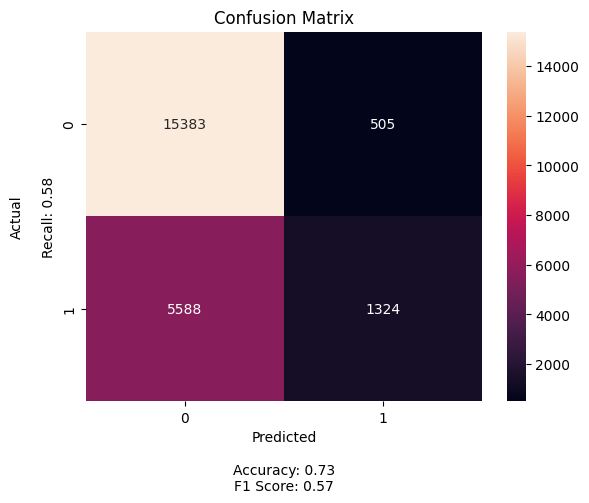

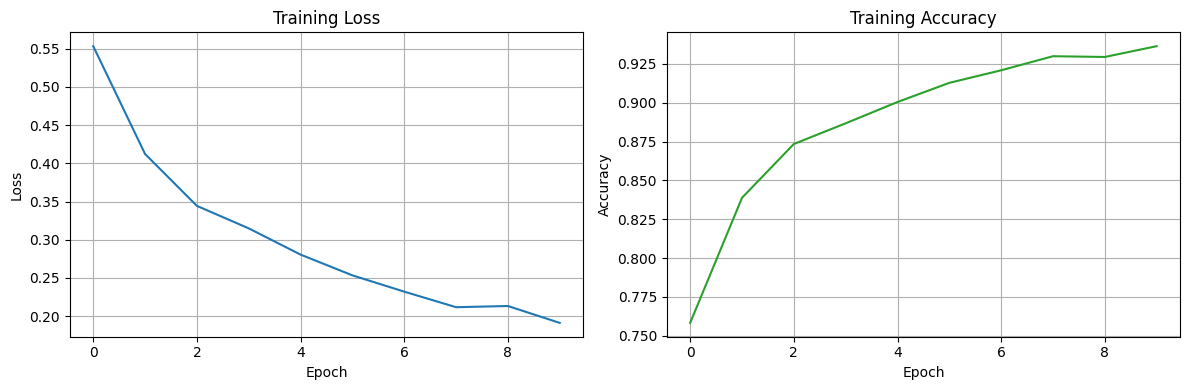

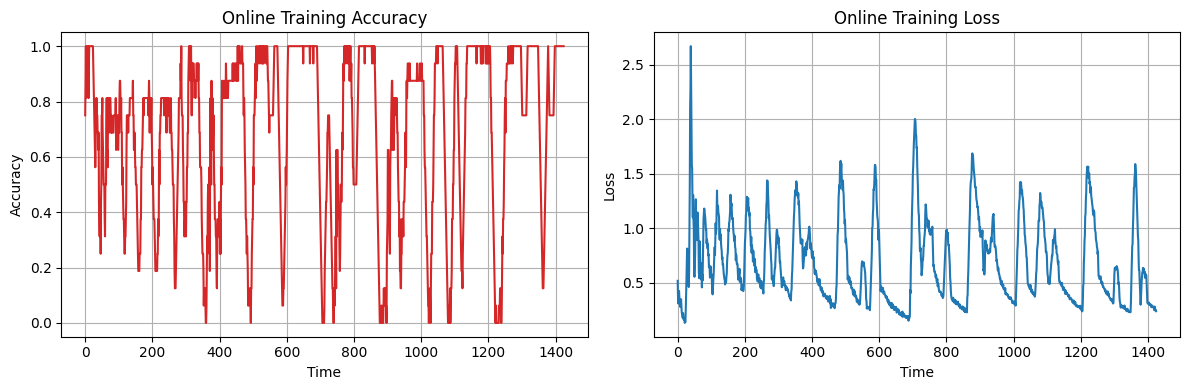

Final Portfolio Value:  -13006.897318969694
Sharpe Ratio:  OrderedDict([('sharperatio', 0.1978793990540935)])
Drawdown Info:  AutoOrderedDict([('len', 1325), ('drawdown', 223.63318684601268), ('moneydown', 23527.45223693845), ('max', AutoOrderedDict([('len', 1325), ('drawdown', 227.3770738770036), ('moneydown', 23921.32992810056)]))])
Trade Analysis:  AutoOrderedDict([('total', AutoOrderedDict([('total', 5), ('open', 1), ('closed', 4)])), ('streak', AutoOrderedDict([('won', AutoOrderedDict([('current', 0), ('longest', 0)])), ('lost', AutoOrderedDict([('current', 4), ('longest', 4)]))])), ('pnl', AutoOrderedDict([('gross', AutoOrderedDict([('total', -3502.8499755859466), ('average', -875.7124938964866)])), ('net', AutoOrderedDict([('total', -3669.5860255127045), ('average', -917.3965063781761)]))])), ('won', AutoOrderedDict([('total', 0), ('pnl', AutoOrderedDict([('total', 0.0), ('average', 0.0), ('max', 0.0)]))])), ('lost', AutoOrderedDict([('total', 4), ('pnl', AutoOrderedDict([('tota

In [5]:
evaluator = Evaluator()
evaluator.analyze_results(y_test, y_preds, history,
                            online_training_acc, online_training_losses)
backtest_results = evaluator.perform_backtesting(
    data, pred_trade_signals)
